In [7]:
#%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
torch.set_printoptions(edgeitems=2, linewidth=75)

In [8]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

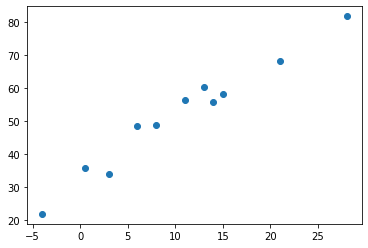

In [10]:
plt.scatter(t_c, t_u)

In [11]:
def model(t_u, w, b):
    return w * t_u + b

In [12]:
def loss_fn(t_p, t_c):
    squared_diffs=(t_p - t_c)**2
    return squared_diffs.mean()

In [16]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p


tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
        21.8000, 48.4000, 60.4000, 68.4000])

In [17]:
loss=loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [18]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f"        z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
        z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [28]:
delta = 0.1

loss_rate_of_change_w =\
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [29]:
loss_rate_of_change_w

tensor(4517.2969)

In [30]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [38]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [39]:
learning_rate * loss_rate_of_change_w

tensor(45.1730)

In [40]:
w

tensor(-44.1730)

In [41]:
t_p = model(t_u, w, b)

In [42]:
t_p

tensor([-1531.0000, -2423.2937, -2524.8916, -3571.7908, -2440.9629,
        -2114.0830, -1451.4886,  -916.9957, -2091.9966, -2622.0720,
        -2975.4558])

In [43]:
loss=loss_fn(t_p,t_c)

In [45]:
loss

tensor(5589439.)

In [46]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [47]:
def dmodel_dw(t_u, w, b):
    return t_u

In [48]:
def dmodel_db(t_u, w, b):
    return 1.0

In [49]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [50]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [53]:
training_loop(30, 0.0001, torch.tensor([1.0, 0.0]), t_u, t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714


tensor([ 0.2323, -0.0226])

In [54]:
t_un=t_u*0.1

In [58]:
training_loop(100000, 0.01, torch.tensor([1.0, 0.0]), t_un, t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 761, Loss 4.958245
Epoch 762, Loss 4.951351
Epoch 763, Loss 4.944479
Epoch 764, Loss 4.937633
Epoch 765, Loss 4.930812
Epoch 766, Loss 4.924009
Epoch 767, Loss 4.917234
Epoch 768, Loss 4.910480
Epoch 769, Loss 4.903749
Epoch 770, Loss 4.897040
Epoch 771, Loss 4.890356
Epoch 772, Loss 4.883692
Epoch 773, Loss 4.877052
Epoch 774, Loss 4.870436
Epoch 775, Loss 4.863839
Epoch 776, Loss 4.857268
Epoch 777, Loss 4.850718
Epoch 778, Loss 4.844189
Epoch 779, Loss 4.837683
Epoch 780, Loss 4.831196
Epoch 781, Loss 4.824737
Epoch 782, Loss 4.818298
Epoch 783, Loss 4.811879
Epoch 784, Loss 4.805481
Epoch 785, Loss 4.799106
Epoch 786, Loss 4.792755
Epoch 787, Loss 4.786422
Epoch 788, Loss 4.780112
Epoch 789, Loss 4.773824
Epoch 790, Loss 4.767558
Epoch 791, Loss 4.761312
Epoch 792, Loss 4.755087
Epoch 793, Loss 4.748885
Epoch 794, Loss 4.742700
Epoch 795, Loss 4.736537
Epoch 796, Loss 4.730397
Epoch 797, Loss 4.724279
Epoch 798, Loss 4.718181
Epoch 799, Loss 4.712101
Epoch 800, Loss 4.706046


Epoch 1549, Loss 3.066937
Epoch 1550, Loss 3.066463
Epoch 1551, Loss 3.065993
Epoch 1552, Loss 3.065524
Epoch 1553, Loss 3.065055
Epoch 1554, Loss 3.064588
Epoch 1555, Loss 3.064123
Epoch 1556, Loss 3.063660
Epoch 1557, Loss 3.063199
Epoch 1558, Loss 3.062738
Epoch 1559, Loss 3.062280
Epoch 1560, Loss 3.061822
Epoch 1561, Loss 3.061367
Epoch 1562, Loss 3.060913
Epoch 1563, Loss 3.060462
Epoch 1564, Loss 3.060011
Epoch 1565, Loss 3.059561
Epoch 1566, Loss 3.059114
Epoch 1567, Loss 3.058668
Epoch 1568, Loss 3.058221
Epoch 1569, Loss 3.057781
Epoch 1570, Loss 3.057338
Epoch 1571, Loss 3.056898
Epoch 1572, Loss 3.056458
Epoch 1573, Loss 3.056019
Epoch 1574, Loss 3.055585
Epoch 1575, Loss 3.055151
Epoch 1576, Loss 3.054717
Epoch 1577, Loss 3.054286
Epoch 1578, Loss 3.053857
Epoch 1579, Loss 3.053427
Epoch 1580, Loss 3.053000
Epoch 1581, Loss 3.052576
Epoch 1582, Loss 3.052152
Epoch 1583, Loss 3.051730
Epoch 1584, Loss 3.051306
Epoch 1585, Loss 3.050888
Epoch 1586, Loss 3.050471
Epoch 1587, 

Epoch 2408, Loss 2.935152
Epoch 2409, Loss 2.935126
Epoch 2410, Loss 2.935100
Epoch 2411, Loss 2.935075
Epoch 2412, Loss 2.935049
Epoch 2413, Loss 2.935024
Epoch 2414, Loss 2.935001
Epoch 2415, Loss 2.934973
Epoch 2416, Loss 2.934949
Epoch 2417, Loss 2.934925
Epoch 2418, Loss 2.934899
Epoch 2419, Loss 2.934876
Epoch 2420, Loss 2.934853
Epoch 2421, Loss 2.934826
Epoch 2422, Loss 2.934802
Epoch 2423, Loss 2.934777
Epoch 2424, Loss 2.934753
Epoch 2425, Loss 2.934730
Epoch 2426, Loss 2.934705
Epoch 2427, Loss 2.934681
Epoch 2428, Loss 2.934658
Epoch 2429, Loss 2.934635
Epoch 2430, Loss 2.934609
Epoch 2431, Loss 2.934585
Epoch 2432, Loss 2.934563
Epoch 2433, Loss 2.934541
Epoch 2434, Loss 2.934516
Epoch 2435, Loss 2.934493
Epoch 2436, Loss 2.934469
Epoch 2437, Loss 2.934446
Epoch 2438, Loss 2.934423
Epoch 2439, Loss 2.934400
Epoch 2440, Loss 2.934377
Epoch 2441, Loss 2.934355
Epoch 2442, Loss 2.934331
Epoch 2443, Loss 2.934309
Epoch 2444, Loss 2.934287
Epoch 2445, Loss 2.934264
Epoch 2446, 

Epoch 3278, Loss 2.928037
Epoch 3279, Loss 2.928034
Epoch 3280, Loss 2.928034
Epoch 3281, Loss 2.928031
Epoch 3282, Loss 2.928032
Epoch 3283, Loss 2.928028
Epoch 3284, Loss 2.928027
Epoch 3285, Loss 2.928026
Epoch 3286, Loss 2.928025
Epoch 3287, Loss 2.928024
Epoch 3288, Loss 2.928022
Epoch 3289, Loss 2.928023
Epoch 3290, Loss 2.928021
Epoch 3291, Loss 2.928019
Epoch 3292, Loss 2.928018
Epoch 3293, Loss 2.928017
Epoch 3294, Loss 2.928015
Epoch 3295, Loss 2.928013
Epoch 3296, Loss 2.928013
Epoch 3297, Loss 2.928011
Epoch 3298, Loss 2.928009
Epoch 3299, Loss 2.928008
Epoch 3300, Loss 2.928006
Epoch 3301, Loss 2.928007
Epoch 3302, Loss 2.928007
Epoch 3303, Loss 2.928004
Epoch 3304, Loss 2.928002
Epoch 3305, Loss 2.928002
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.928000
Epoch 3308, Loss 2.927998
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927995
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927994
Epoch 3313, Loss 2.927991
Epoch 3314, Loss 2.927991
Epoch 3315, Loss 2.927990
Epoch 3316, 

Epoch 4144, Loss 2.927667
Epoch 4145, Loss 2.927666
Epoch 4146, Loss 2.927667
Epoch 4147, Loss 2.927667
Epoch 4148, Loss 2.927667
Epoch 4149, Loss 2.927667
Epoch 4150, Loss 2.927665
Epoch 4151, Loss 2.927666
Epoch 4152, Loss 2.927666
Epoch 4153, Loss 2.927666
Epoch 4154, Loss 2.927666
Epoch 4155, Loss 2.927666
Epoch 4156, Loss 2.927666
Epoch 4157, Loss 2.927666
Epoch 4158, Loss 2.927665
Epoch 4159, Loss 2.927666
Epoch 4160, Loss 2.927665
Epoch 4161, Loss 2.927664
Epoch 4162, Loss 2.927666
Epoch 4163, Loss 2.927665
Epoch 4164, Loss 2.927666
Epoch 4165, Loss 2.927664
Epoch 4166, Loss 2.927665
Epoch 4167, Loss 2.927665
Epoch 4168, Loss 2.927665
Epoch 4169, Loss 2.927666
Epoch 4170, Loss 2.927664
Epoch 4171, Loss 2.927665
Epoch 4172, Loss 2.927666
Epoch 4173, Loss 2.927663
Epoch 4174, Loss 2.927664
Epoch 4175, Loss 2.927664
Epoch 4176, Loss 2.927665
Epoch 4177, Loss 2.927663
Epoch 4178, Loss 2.927664
Epoch 4179, Loss 2.927664
Epoch 4180, Loss 2.927663
Epoch 4181, Loss 2.927664
Epoch 4182, 

Epoch 4862, Loss 2.927645
Epoch 4863, Loss 2.927648
Epoch 4864, Loss 2.927648
Epoch 4865, Loss 2.927647
Epoch 4866, Loss 2.927648
Epoch 4867, Loss 2.927648
Epoch 4868, Loss 2.927648
Epoch 4869, Loss 2.927648
Epoch 4870, Loss 2.927648
Epoch 4871, Loss 2.927648
Epoch 4872, Loss 2.927646
Epoch 4873, Loss 2.927648
Epoch 4874, Loss 2.927649
Epoch 4875, Loss 2.927647
Epoch 4876, Loss 2.927648
Epoch 4877, Loss 2.927647
Epoch 4878, Loss 2.927647
Epoch 4879, Loss 2.927647
Epoch 4880, Loss 2.927648
Epoch 4881, Loss 2.927648
Epoch 4882, Loss 2.927648
Epoch 4883, Loss 2.927648
Epoch 4884, Loss 2.927647
Epoch 4885, Loss 2.927647
Epoch 4886, Loss 2.927649
Epoch 4887, Loss 2.927647
Epoch 4888, Loss 2.927649
Epoch 4889, Loss 2.927648
Epoch 4890, Loss 2.927648
Epoch 4891, Loss 2.927648
Epoch 4892, Loss 2.927647
Epoch 4893, Loss 2.927648
Epoch 4894, Loss 2.927646
Epoch 4895, Loss 2.927648
Epoch 4896, Loss 2.927648
Epoch 4897, Loss 2.927648
Epoch 4898, Loss 2.927647
Epoch 4899, Loss 2.927647
Epoch 4900, 

Epoch 5635, Loss 2.927646
Epoch 5636, Loss 2.927648
Epoch 5637, Loss 2.927646
Epoch 5638, Loss 2.927645
Epoch 5639, Loss 2.927646
Epoch 5640, Loss 2.927647
Epoch 5641, Loss 2.927647
Epoch 5642, Loss 2.927647
Epoch 5643, Loss 2.927646
Epoch 5644, Loss 2.927645
Epoch 5645, Loss 2.927645
Epoch 5646, Loss 2.927647
Epoch 5647, Loss 2.927647
Epoch 5648, Loss 2.927647
Epoch 5649, Loss 2.927646
Epoch 5650, Loss 2.927646
Epoch 5651, Loss 2.927646
Epoch 5652, Loss 2.927645
Epoch 5653, Loss 2.927646
Epoch 5654, Loss 2.927646
Epoch 5655, Loss 2.927646
Epoch 5656, Loss 2.927645
Epoch 5657, Loss 2.927646
Epoch 5658, Loss 2.927645
Epoch 5659, Loss 2.927647
Epoch 5660, Loss 2.927645
Epoch 5661, Loss 2.927646
Epoch 5662, Loss 2.927646
Epoch 5663, Loss 2.927646
Epoch 5664, Loss 2.927646
Epoch 5665, Loss 2.927646
Epoch 5666, Loss 2.927644
Epoch 5667, Loss 2.927646
Epoch 5668, Loss 2.927647
Epoch 5669, Loss 2.927647
Epoch 5670, Loss 2.927646
Epoch 5671, Loss 2.927646
Epoch 5672, Loss 2.927646
Epoch 5673, 

Epoch 6410, Loss 2.927645
Epoch 6411, Loss 2.927645
Epoch 6412, Loss 2.927645
Epoch 6413, Loss 2.927645
Epoch 6414, Loss 2.927645
Epoch 6415, Loss 2.927645
Epoch 6416, Loss 2.927645
Epoch 6417, Loss 2.927645
Epoch 6418, Loss 2.927645
Epoch 6419, Loss 2.927645
Epoch 6420, Loss 2.927645
Epoch 6421, Loss 2.927645
Epoch 6422, Loss 2.927645
Epoch 6423, Loss 2.927645
Epoch 6424, Loss 2.927645
Epoch 6425, Loss 2.927645
Epoch 6426, Loss 2.927645
Epoch 6427, Loss 2.927645
Epoch 6428, Loss 2.927645
Epoch 6429, Loss 2.927645
Epoch 6430, Loss 2.927645
Epoch 6431, Loss 2.927645
Epoch 6432, Loss 2.927645
Epoch 6433, Loss 2.927645
Epoch 6434, Loss 2.927645
Epoch 6435, Loss 2.927645
Epoch 6436, Loss 2.927645
Epoch 6437, Loss 2.927645
Epoch 6438, Loss 2.927645
Epoch 6439, Loss 2.927645
Epoch 6440, Loss 2.927645
Epoch 6441, Loss 2.927645
Epoch 6442, Loss 2.927645
Epoch 6443, Loss 2.927645
Epoch 6444, Loss 2.927645
Epoch 6445, Loss 2.927645
Epoch 6446, Loss 2.927645
Epoch 6447, Loss 2.927645
Epoch 6448, 

Epoch 7054, Loss 2.927645
Epoch 7055, Loss 2.927645
Epoch 7056, Loss 2.927645
Epoch 7057, Loss 2.927645
Epoch 7058, Loss 2.927645
Epoch 7059, Loss 2.927645
Epoch 7060, Loss 2.927645
Epoch 7061, Loss 2.927645
Epoch 7062, Loss 2.927645
Epoch 7063, Loss 2.927645
Epoch 7064, Loss 2.927645
Epoch 7065, Loss 2.927645
Epoch 7066, Loss 2.927645
Epoch 7067, Loss 2.927645
Epoch 7068, Loss 2.927645
Epoch 7069, Loss 2.927645
Epoch 7070, Loss 2.927645
Epoch 7071, Loss 2.927645
Epoch 7072, Loss 2.927645
Epoch 7073, Loss 2.927645
Epoch 7074, Loss 2.927645
Epoch 7075, Loss 2.927645
Epoch 7076, Loss 2.927645
Epoch 7077, Loss 2.927645
Epoch 7078, Loss 2.927645
Epoch 7079, Loss 2.927645
Epoch 7080, Loss 2.927645
Epoch 7081, Loss 2.927645
Epoch 7082, Loss 2.927645
Epoch 7083, Loss 2.927645
Epoch 7084, Loss 2.927645
Epoch 7085, Loss 2.927645
Epoch 7086, Loss 2.927645
Epoch 7087, Loss 2.927645
Epoch 7088, Loss 2.927645
Epoch 7089, Loss 2.927645
Epoch 7090, Loss 2.927645
Epoch 7091, Loss 2.927645
Epoch 7092, 

Epoch 7834, Loss 2.927645
Epoch 7835, Loss 2.927645
Epoch 7836, Loss 2.927645
Epoch 7837, Loss 2.927645
Epoch 7838, Loss 2.927645
Epoch 7839, Loss 2.927645
Epoch 7840, Loss 2.927645
Epoch 7841, Loss 2.927645
Epoch 7842, Loss 2.927645
Epoch 7843, Loss 2.927645
Epoch 7844, Loss 2.927645
Epoch 7845, Loss 2.927645
Epoch 7846, Loss 2.927645
Epoch 7847, Loss 2.927645
Epoch 7848, Loss 2.927645
Epoch 7849, Loss 2.927645
Epoch 7850, Loss 2.927645
Epoch 7851, Loss 2.927645
Epoch 7852, Loss 2.927645
Epoch 7853, Loss 2.927645
Epoch 7854, Loss 2.927645
Epoch 7855, Loss 2.927645
Epoch 7856, Loss 2.927645
Epoch 7857, Loss 2.927645
Epoch 7858, Loss 2.927645
Epoch 7859, Loss 2.927645
Epoch 7860, Loss 2.927645
Epoch 7861, Loss 2.927645
Epoch 7862, Loss 2.927645
Epoch 7863, Loss 2.927645
Epoch 7864, Loss 2.927645
Epoch 7865, Loss 2.927645
Epoch 7866, Loss 2.927645
Epoch 7867, Loss 2.927645
Epoch 7868, Loss 2.927645
Epoch 7869, Loss 2.927645
Epoch 7870, Loss 2.927645
Epoch 7871, Loss 2.927645
Epoch 7872, 

Epoch 8588, Loss 2.927645
Epoch 8589, Loss 2.927645
Epoch 8590, Loss 2.927645
Epoch 8591, Loss 2.927645
Epoch 8592, Loss 2.927645
Epoch 8593, Loss 2.927645
Epoch 8594, Loss 2.927645
Epoch 8595, Loss 2.927645
Epoch 8596, Loss 2.927645
Epoch 8597, Loss 2.927645
Epoch 8598, Loss 2.927645
Epoch 8599, Loss 2.927645
Epoch 8600, Loss 2.927645
Epoch 8601, Loss 2.927645
Epoch 8602, Loss 2.927645
Epoch 8603, Loss 2.927645
Epoch 8604, Loss 2.927645
Epoch 8605, Loss 2.927645
Epoch 8606, Loss 2.927645
Epoch 8607, Loss 2.927645
Epoch 8608, Loss 2.927645
Epoch 8609, Loss 2.927645
Epoch 8610, Loss 2.927645
Epoch 8611, Loss 2.927645
Epoch 8612, Loss 2.927645
Epoch 8613, Loss 2.927645
Epoch 8614, Loss 2.927645
Epoch 8615, Loss 2.927645
Epoch 8616, Loss 2.927645
Epoch 8617, Loss 2.927645
Epoch 8618, Loss 2.927645
Epoch 8619, Loss 2.927645
Epoch 8620, Loss 2.927645
Epoch 8621, Loss 2.927645
Epoch 8622, Loss 2.927645
Epoch 8623, Loss 2.927645
Epoch 8624, Loss 2.927645
Epoch 8625, Loss 2.927645
Epoch 8626, 

Epoch 9367, Loss 2.927645
Epoch 9368, Loss 2.927645
Epoch 9369, Loss 2.927645
Epoch 9370, Loss 2.927645
Epoch 9371, Loss 2.927645
Epoch 9372, Loss 2.927645
Epoch 9373, Loss 2.927645
Epoch 9374, Loss 2.927645
Epoch 9375, Loss 2.927645
Epoch 9376, Loss 2.927645
Epoch 9377, Loss 2.927645
Epoch 9378, Loss 2.927645
Epoch 9379, Loss 2.927645
Epoch 9380, Loss 2.927645
Epoch 9381, Loss 2.927645
Epoch 9382, Loss 2.927645
Epoch 9383, Loss 2.927645
Epoch 9384, Loss 2.927645
Epoch 9385, Loss 2.927645
Epoch 9386, Loss 2.927645
Epoch 9387, Loss 2.927645
Epoch 9388, Loss 2.927645
Epoch 9389, Loss 2.927645
Epoch 9390, Loss 2.927645
Epoch 9391, Loss 2.927645
Epoch 9392, Loss 2.927645
Epoch 9393, Loss 2.927645
Epoch 9394, Loss 2.927645
Epoch 9395, Loss 2.927645
Epoch 9396, Loss 2.927645
Epoch 9397, Loss 2.927645
Epoch 9398, Loss 2.927645
Epoch 9399, Loss 2.927645
Epoch 9400, Loss 2.927645
Epoch 9401, Loss 2.927645
Epoch 9402, Loss 2.927645
Epoch 9403, Loss 2.927645
Epoch 9404, Loss 2.927645
Epoch 9405, 

Epoch 10076, Loss 2.927645
Epoch 10077, Loss 2.927645
Epoch 10078, Loss 2.927645
Epoch 10079, Loss 2.927645
Epoch 10080, Loss 2.927645
Epoch 10081, Loss 2.927645
Epoch 10082, Loss 2.927645
Epoch 10083, Loss 2.927645
Epoch 10084, Loss 2.927645
Epoch 10085, Loss 2.927645
Epoch 10086, Loss 2.927645
Epoch 10087, Loss 2.927645
Epoch 10088, Loss 2.927645
Epoch 10089, Loss 2.927645
Epoch 10090, Loss 2.927645
Epoch 10091, Loss 2.927645
Epoch 10092, Loss 2.927645
Epoch 10093, Loss 2.927645
Epoch 10094, Loss 2.927645
Epoch 10095, Loss 2.927645
Epoch 10096, Loss 2.927645
Epoch 10097, Loss 2.927645
Epoch 10098, Loss 2.927645
Epoch 10099, Loss 2.927645
Epoch 10100, Loss 2.927645
Epoch 10101, Loss 2.927645
Epoch 10102, Loss 2.927645
Epoch 10103, Loss 2.927645
Epoch 10104, Loss 2.927645
Epoch 10105, Loss 2.927645
Epoch 10106, Loss 2.927645
Epoch 10107, Loss 2.927645
Epoch 10108, Loss 2.927645
Epoch 10109, Loss 2.927645
Epoch 10110, Loss 2.927645
Epoch 10111, Loss 2.927645
Epoch 10112, Loss 2.927645
E

Epoch 10816, Loss 2.927645
Epoch 10817, Loss 2.927645
Epoch 10818, Loss 2.927645
Epoch 10819, Loss 2.927645
Epoch 10820, Loss 2.927645
Epoch 10821, Loss 2.927645
Epoch 10822, Loss 2.927645
Epoch 10823, Loss 2.927645
Epoch 10824, Loss 2.927645
Epoch 10825, Loss 2.927645
Epoch 10826, Loss 2.927645
Epoch 10827, Loss 2.927645
Epoch 10828, Loss 2.927645
Epoch 10829, Loss 2.927645
Epoch 10830, Loss 2.927645
Epoch 10831, Loss 2.927645
Epoch 10832, Loss 2.927645
Epoch 10833, Loss 2.927645
Epoch 10834, Loss 2.927645
Epoch 10835, Loss 2.927645
Epoch 10836, Loss 2.927645
Epoch 10837, Loss 2.927645
Epoch 10838, Loss 2.927645
Epoch 10839, Loss 2.927645
Epoch 10840, Loss 2.927645
Epoch 10841, Loss 2.927645
Epoch 10842, Loss 2.927645
Epoch 10843, Loss 2.927645
Epoch 10844, Loss 2.927645
Epoch 10845, Loss 2.927645
Epoch 10846, Loss 2.927645
Epoch 10847, Loss 2.927645
Epoch 10848, Loss 2.927645
Epoch 10849, Loss 2.927645
Epoch 10850, Loss 2.927645
Epoch 10851, Loss 2.927645
Epoch 10852, Loss 2.927645
E

Epoch 11540, Loss 2.927645
Epoch 11541, Loss 2.927645
Epoch 11542, Loss 2.927645
Epoch 11543, Loss 2.927645
Epoch 11544, Loss 2.927645
Epoch 11545, Loss 2.927645
Epoch 11546, Loss 2.927645
Epoch 11547, Loss 2.927645
Epoch 11548, Loss 2.927645
Epoch 11549, Loss 2.927645
Epoch 11550, Loss 2.927645
Epoch 11551, Loss 2.927645
Epoch 11552, Loss 2.927645
Epoch 11553, Loss 2.927645
Epoch 11554, Loss 2.927645
Epoch 11555, Loss 2.927645
Epoch 11556, Loss 2.927645
Epoch 11557, Loss 2.927645
Epoch 11558, Loss 2.927645
Epoch 11559, Loss 2.927645
Epoch 11560, Loss 2.927645
Epoch 11561, Loss 2.927645
Epoch 11562, Loss 2.927645
Epoch 11563, Loss 2.927645
Epoch 11564, Loss 2.927645
Epoch 11565, Loss 2.927645
Epoch 11566, Loss 2.927645
Epoch 11567, Loss 2.927645
Epoch 11568, Loss 2.927645
Epoch 11569, Loss 2.927645
Epoch 11570, Loss 2.927645
Epoch 11571, Loss 2.927645
Epoch 11572, Loss 2.927645
Epoch 11573, Loss 2.927645
Epoch 11574, Loss 2.927645
Epoch 11575, Loss 2.927645
Epoch 11576, Loss 2.927645
E

Epoch 12239, Loss 2.927645
Epoch 12240, Loss 2.927645
Epoch 12241, Loss 2.927645
Epoch 12242, Loss 2.927645
Epoch 12243, Loss 2.927645
Epoch 12244, Loss 2.927645
Epoch 12245, Loss 2.927645
Epoch 12246, Loss 2.927645
Epoch 12247, Loss 2.927645
Epoch 12248, Loss 2.927645
Epoch 12249, Loss 2.927645
Epoch 12250, Loss 2.927645
Epoch 12251, Loss 2.927645
Epoch 12252, Loss 2.927645
Epoch 12253, Loss 2.927645
Epoch 12254, Loss 2.927645
Epoch 12255, Loss 2.927645
Epoch 12256, Loss 2.927645
Epoch 12257, Loss 2.927645
Epoch 12258, Loss 2.927645
Epoch 12259, Loss 2.927645
Epoch 12260, Loss 2.927645
Epoch 12261, Loss 2.927645
Epoch 12262, Loss 2.927645
Epoch 12263, Loss 2.927645
Epoch 12264, Loss 2.927645
Epoch 12265, Loss 2.927645
Epoch 12266, Loss 2.927645
Epoch 12267, Loss 2.927645
Epoch 12268, Loss 2.927645
Epoch 12269, Loss 2.927645
Epoch 12270, Loss 2.927645
Epoch 12271, Loss 2.927645
Epoch 12272, Loss 2.927645
Epoch 12273, Loss 2.927645
Epoch 12274, Loss 2.927645
Epoch 12275, Loss 2.927645
E

Epoch 12976, Loss 2.927645
Epoch 12977, Loss 2.927645
Epoch 12978, Loss 2.927645
Epoch 12979, Loss 2.927645
Epoch 12980, Loss 2.927645
Epoch 12981, Loss 2.927645
Epoch 12982, Loss 2.927645
Epoch 12983, Loss 2.927645
Epoch 12984, Loss 2.927645
Epoch 12985, Loss 2.927645
Epoch 12986, Loss 2.927645
Epoch 12987, Loss 2.927645
Epoch 12988, Loss 2.927645
Epoch 12989, Loss 2.927645
Epoch 12990, Loss 2.927645
Epoch 12991, Loss 2.927645
Epoch 12992, Loss 2.927645
Epoch 12993, Loss 2.927645
Epoch 12994, Loss 2.927645
Epoch 12995, Loss 2.927645
Epoch 12996, Loss 2.927645
Epoch 12997, Loss 2.927645
Epoch 12998, Loss 2.927645
Epoch 12999, Loss 2.927645
Epoch 13000, Loss 2.927645
Epoch 13001, Loss 2.927645
Epoch 13002, Loss 2.927645
Epoch 13003, Loss 2.927645
Epoch 13004, Loss 2.927645
Epoch 13005, Loss 2.927645
Epoch 13006, Loss 2.927645
Epoch 13007, Loss 2.927645
Epoch 13008, Loss 2.927645
Epoch 13009, Loss 2.927645
Epoch 13010, Loss 2.927645
Epoch 13011, Loss 2.927645
Epoch 13012, Loss 2.927645
E

Epoch 13715, Loss 2.927645
Epoch 13716, Loss 2.927645
Epoch 13717, Loss 2.927645
Epoch 13718, Loss 2.927645
Epoch 13719, Loss 2.927645
Epoch 13720, Loss 2.927645
Epoch 13721, Loss 2.927645
Epoch 13722, Loss 2.927645
Epoch 13723, Loss 2.927645
Epoch 13724, Loss 2.927645
Epoch 13725, Loss 2.927645
Epoch 13726, Loss 2.927645
Epoch 13727, Loss 2.927645
Epoch 13728, Loss 2.927645
Epoch 13729, Loss 2.927645
Epoch 13730, Loss 2.927645
Epoch 13731, Loss 2.927645
Epoch 13732, Loss 2.927645
Epoch 13733, Loss 2.927645
Epoch 13734, Loss 2.927645
Epoch 13735, Loss 2.927645
Epoch 13736, Loss 2.927645
Epoch 13737, Loss 2.927645
Epoch 13738, Loss 2.927645
Epoch 13739, Loss 2.927645
Epoch 13740, Loss 2.927645
Epoch 13741, Loss 2.927645
Epoch 13742, Loss 2.927645
Epoch 13743, Loss 2.927645
Epoch 13744, Loss 2.927645
Epoch 13745, Loss 2.927645
Epoch 13746, Loss 2.927645
Epoch 13747, Loss 2.927645
Epoch 13748, Loss 2.927645
Epoch 13749, Loss 2.927645
Epoch 13750, Loss 2.927645
Epoch 13751, Loss 2.927645
E

Epoch 14428, Loss 2.927645
Epoch 14429, Loss 2.927645
Epoch 14430, Loss 2.927645
Epoch 14431, Loss 2.927645
Epoch 14432, Loss 2.927645
Epoch 14433, Loss 2.927645
Epoch 14434, Loss 2.927645
Epoch 14435, Loss 2.927645
Epoch 14436, Loss 2.927645
Epoch 14437, Loss 2.927645
Epoch 14438, Loss 2.927645
Epoch 14439, Loss 2.927645
Epoch 14440, Loss 2.927645
Epoch 14441, Loss 2.927645
Epoch 14442, Loss 2.927645
Epoch 14443, Loss 2.927645
Epoch 14444, Loss 2.927645
Epoch 14445, Loss 2.927645
Epoch 14446, Loss 2.927645
Epoch 14447, Loss 2.927645
Epoch 14448, Loss 2.927645
Epoch 14449, Loss 2.927645
Epoch 14450, Loss 2.927645
Epoch 14451, Loss 2.927645
Epoch 14452, Loss 2.927645
Epoch 14453, Loss 2.927645
Epoch 14454, Loss 2.927645
Epoch 14455, Loss 2.927645
Epoch 14456, Loss 2.927645
Epoch 14457, Loss 2.927645
Epoch 14458, Loss 2.927645
Epoch 14459, Loss 2.927645
Epoch 14460, Loss 2.927645
Epoch 14461, Loss 2.927645
Epoch 14462, Loss 2.927645
Epoch 14463, Loss 2.927645
Epoch 14464, Loss 2.927645
E

Epoch 15123, Loss 2.927645
Epoch 15124, Loss 2.927645
Epoch 15125, Loss 2.927645
Epoch 15126, Loss 2.927645
Epoch 15127, Loss 2.927645
Epoch 15128, Loss 2.927645
Epoch 15129, Loss 2.927645
Epoch 15130, Loss 2.927645
Epoch 15131, Loss 2.927645
Epoch 15132, Loss 2.927645
Epoch 15133, Loss 2.927645
Epoch 15134, Loss 2.927645
Epoch 15135, Loss 2.927645
Epoch 15136, Loss 2.927645
Epoch 15137, Loss 2.927645
Epoch 15138, Loss 2.927645
Epoch 15139, Loss 2.927645
Epoch 15140, Loss 2.927645
Epoch 15141, Loss 2.927645
Epoch 15142, Loss 2.927645
Epoch 15143, Loss 2.927645
Epoch 15144, Loss 2.927645
Epoch 15145, Loss 2.927645
Epoch 15146, Loss 2.927645
Epoch 15147, Loss 2.927645
Epoch 15148, Loss 2.927645
Epoch 15149, Loss 2.927645
Epoch 15150, Loss 2.927645
Epoch 15151, Loss 2.927645
Epoch 15152, Loss 2.927645
Epoch 15153, Loss 2.927645
Epoch 15154, Loss 2.927645
Epoch 15155, Loss 2.927645
Epoch 15156, Loss 2.927645
Epoch 15157, Loss 2.927645
Epoch 15158, Loss 2.927645
Epoch 15159, Loss 2.927645
E

Epoch 15853, Loss 2.927645
Epoch 15854, Loss 2.927645
Epoch 15855, Loss 2.927645
Epoch 15856, Loss 2.927645
Epoch 15857, Loss 2.927645
Epoch 15858, Loss 2.927645
Epoch 15859, Loss 2.927645
Epoch 15860, Loss 2.927645
Epoch 15861, Loss 2.927645
Epoch 15862, Loss 2.927645
Epoch 15863, Loss 2.927645
Epoch 15864, Loss 2.927645
Epoch 15865, Loss 2.927645
Epoch 15866, Loss 2.927645
Epoch 15867, Loss 2.927645
Epoch 15868, Loss 2.927645
Epoch 15869, Loss 2.927645
Epoch 15870, Loss 2.927645
Epoch 15871, Loss 2.927645
Epoch 15872, Loss 2.927645
Epoch 15873, Loss 2.927645
Epoch 15874, Loss 2.927645
Epoch 15875, Loss 2.927645
Epoch 15876, Loss 2.927645
Epoch 15877, Loss 2.927645
Epoch 15878, Loss 2.927645
Epoch 15879, Loss 2.927645
Epoch 15880, Loss 2.927645
Epoch 15881, Loss 2.927645
Epoch 15882, Loss 2.927645
Epoch 15883, Loss 2.927645
Epoch 15884, Loss 2.927645
Epoch 15885, Loss 2.927645
Epoch 15886, Loss 2.927645
Epoch 15887, Loss 2.927645
Epoch 15888, Loss 2.927645
Epoch 15889, Loss 2.927645
E

Epoch 16565, Loss 2.927645
Epoch 16566, Loss 2.927645
Epoch 16567, Loss 2.927645
Epoch 16568, Loss 2.927645
Epoch 16569, Loss 2.927645
Epoch 16570, Loss 2.927645
Epoch 16571, Loss 2.927645
Epoch 16572, Loss 2.927645
Epoch 16573, Loss 2.927645
Epoch 16574, Loss 2.927645
Epoch 16575, Loss 2.927645
Epoch 16576, Loss 2.927645
Epoch 16577, Loss 2.927645
Epoch 16578, Loss 2.927645
Epoch 16579, Loss 2.927645
Epoch 16580, Loss 2.927645
Epoch 16581, Loss 2.927645
Epoch 16582, Loss 2.927645
Epoch 16583, Loss 2.927645
Epoch 16584, Loss 2.927645
Epoch 16585, Loss 2.927645
Epoch 16586, Loss 2.927645
Epoch 16587, Loss 2.927645
Epoch 16588, Loss 2.927645
Epoch 16589, Loss 2.927645
Epoch 16590, Loss 2.927645
Epoch 16591, Loss 2.927645
Epoch 16592, Loss 2.927645
Epoch 16593, Loss 2.927645
Epoch 16594, Loss 2.927645
Epoch 16595, Loss 2.927645
Epoch 16596, Loss 2.927645
Epoch 16597, Loss 2.927645
Epoch 16598, Loss 2.927645
Epoch 16599, Loss 2.927645
Epoch 16600, Loss 2.927645
Epoch 16601, Loss 2.927645
E

Epoch 17330, Loss 2.927645
Epoch 17331, Loss 2.927645
Epoch 17332, Loss 2.927645
Epoch 17333, Loss 2.927645
Epoch 17334, Loss 2.927645
Epoch 17335, Loss 2.927645
Epoch 17336, Loss 2.927645
Epoch 17337, Loss 2.927645
Epoch 17338, Loss 2.927645
Epoch 17339, Loss 2.927645
Epoch 17340, Loss 2.927645
Epoch 17341, Loss 2.927645
Epoch 17342, Loss 2.927645
Epoch 17343, Loss 2.927645
Epoch 17344, Loss 2.927645
Epoch 17345, Loss 2.927645
Epoch 17346, Loss 2.927645
Epoch 17347, Loss 2.927645
Epoch 17348, Loss 2.927645
Epoch 17349, Loss 2.927645
Epoch 17350, Loss 2.927645
Epoch 17351, Loss 2.927645
Epoch 17352, Loss 2.927645
Epoch 17353, Loss 2.927645
Epoch 17354, Loss 2.927645
Epoch 17355, Loss 2.927645
Epoch 17356, Loss 2.927645
Epoch 17357, Loss 2.927645
Epoch 17358, Loss 2.927645
Epoch 17359, Loss 2.927645
Epoch 17360, Loss 2.927645
Epoch 17361, Loss 2.927645
Epoch 17362, Loss 2.927645
Epoch 17363, Loss 2.927645
Epoch 17364, Loss 2.927645
Epoch 17365, Loss 2.927645
Epoch 17366, Loss 2.927645
E

Epoch 18090, Loss 2.927645
Epoch 18091, Loss 2.927645
Epoch 18092, Loss 2.927645
Epoch 18093, Loss 2.927645
Epoch 18094, Loss 2.927645
Epoch 18095, Loss 2.927645
Epoch 18096, Loss 2.927645
Epoch 18097, Loss 2.927645
Epoch 18098, Loss 2.927645
Epoch 18099, Loss 2.927645
Epoch 18100, Loss 2.927645
Epoch 18101, Loss 2.927645
Epoch 18102, Loss 2.927645
Epoch 18103, Loss 2.927645
Epoch 18104, Loss 2.927645
Epoch 18105, Loss 2.927645
Epoch 18106, Loss 2.927645
Epoch 18107, Loss 2.927645
Epoch 18108, Loss 2.927645
Epoch 18109, Loss 2.927645
Epoch 18110, Loss 2.927645
Epoch 18111, Loss 2.927645
Epoch 18112, Loss 2.927645
Epoch 18113, Loss 2.927645
Epoch 18114, Loss 2.927645
Epoch 18115, Loss 2.927645
Epoch 18116, Loss 2.927645
Epoch 18117, Loss 2.927645
Epoch 18118, Loss 2.927645
Epoch 18119, Loss 2.927645
Epoch 18120, Loss 2.927645
Epoch 18121, Loss 2.927645
Epoch 18122, Loss 2.927645
Epoch 18123, Loss 2.927645
Epoch 18124, Loss 2.927645
Epoch 18125, Loss 2.927645
Epoch 18126, Loss 2.927645
E

Epoch 18810, Loss 2.927645
Epoch 18811, Loss 2.927645
Epoch 18812, Loss 2.927645
Epoch 18813, Loss 2.927645
Epoch 18814, Loss 2.927645
Epoch 18815, Loss 2.927645
Epoch 18816, Loss 2.927645
Epoch 18817, Loss 2.927645
Epoch 18818, Loss 2.927645
Epoch 18819, Loss 2.927645
Epoch 18820, Loss 2.927645
Epoch 18821, Loss 2.927645
Epoch 18822, Loss 2.927645
Epoch 18823, Loss 2.927645
Epoch 18824, Loss 2.927645
Epoch 18825, Loss 2.927645
Epoch 18826, Loss 2.927645
Epoch 18827, Loss 2.927645
Epoch 18828, Loss 2.927645
Epoch 18829, Loss 2.927645
Epoch 18830, Loss 2.927645
Epoch 18831, Loss 2.927645
Epoch 18832, Loss 2.927645
Epoch 18833, Loss 2.927645
Epoch 18834, Loss 2.927645
Epoch 18835, Loss 2.927645
Epoch 18836, Loss 2.927645
Epoch 18837, Loss 2.927645
Epoch 18838, Loss 2.927645
Epoch 18839, Loss 2.927645
Epoch 18840, Loss 2.927645
Epoch 18841, Loss 2.927645
Epoch 18842, Loss 2.927645
Epoch 18843, Loss 2.927645
Epoch 18844, Loss 2.927645
Epoch 18845, Loss 2.927645
Epoch 18846, Loss 2.927645
E

Epoch 19488, Loss 2.927645
Epoch 19489, Loss 2.927645
Epoch 19490, Loss 2.927645
Epoch 19491, Loss 2.927645
Epoch 19492, Loss 2.927645
Epoch 19493, Loss 2.927645
Epoch 19494, Loss 2.927645
Epoch 19495, Loss 2.927645
Epoch 19496, Loss 2.927645
Epoch 19497, Loss 2.927645
Epoch 19498, Loss 2.927645
Epoch 19499, Loss 2.927645
Epoch 19500, Loss 2.927645
Epoch 19501, Loss 2.927645
Epoch 19502, Loss 2.927645
Epoch 19503, Loss 2.927645
Epoch 19504, Loss 2.927645
Epoch 19505, Loss 2.927645
Epoch 19506, Loss 2.927645
Epoch 19507, Loss 2.927645
Epoch 19508, Loss 2.927645
Epoch 19509, Loss 2.927645
Epoch 19510, Loss 2.927645
Epoch 19511, Loss 2.927645
Epoch 19512, Loss 2.927645
Epoch 19513, Loss 2.927645
Epoch 19514, Loss 2.927645
Epoch 19515, Loss 2.927645
Epoch 19516, Loss 2.927645
Epoch 19517, Loss 2.927645
Epoch 19518, Loss 2.927645
Epoch 19519, Loss 2.927645
Epoch 19520, Loss 2.927645
Epoch 19521, Loss 2.927645
Epoch 19522, Loss 2.927645
Epoch 19523, Loss 2.927645
Epoch 19524, Loss 2.927645
E

Epoch 20149, Loss 2.927645
Epoch 20150, Loss 2.927645
Epoch 20151, Loss 2.927645
Epoch 20152, Loss 2.927645
Epoch 20153, Loss 2.927645
Epoch 20154, Loss 2.927645
Epoch 20155, Loss 2.927645
Epoch 20156, Loss 2.927645
Epoch 20157, Loss 2.927645
Epoch 20158, Loss 2.927645
Epoch 20159, Loss 2.927645
Epoch 20160, Loss 2.927645
Epoch 20161, Loss 2.927645
Epoch 20162, Loss 2.927645
Epoch 20163, Loss 2.927645
Epoch 20164, Loss 2.927645
Epoch 20165, Loss 2.927645
Epoch 20166, Loss 2.927645
Epoch 20167, Loss 2.927645
Epoch 20168, Loss 2.927645
Epoch 20169, Loss 2.927645
Epoch 20170, Loss 2.927645
Epoch 20171, Loss 2.927645
Epoch 20172, Loss 2.927645
Epoch 20173, Loss 2.927645
Epoch 20174, Loss 2.927645
Epoch 20175, Loss 2.927645
Epoch 20176, Loss 2.927645
Epoch 20177, Loss 2.927645
Epoch 20178, Loss 2.927645
Epoch 20179, Loss 2.927645
Epoch 20180, Loss 2.927645
Epoch 20181, Loss 2.927645
Epoch 20182, Loss 2.927645
Epoch 20183, Loss 2.927645
Epoch 20184, Loss 2.927645
Epoch 20185, Loss 2.927645
E

Epoch 20828, Loss 2.927645
Epoch 20829, Loss 2.927645
Epoch 20830, Loss 2.927645
Epoch 20831, Loss 2.927645
Epoch 20832, Loss 2.927645
Epoch 20833, Loss 2.927645
Epoch 20834, Loss 2.927645
Epoch 20835, Loss 2.927645
Epoch 20836, Loss 2.927645
Epoch 20837, Loss 2.927645
Epoch 20838, Loss 2.927645
Epoch 20839, Loss 2.927645
Epoch 20840, Loss 2.927645
Epoch 20841, Loss 2.927645
Epoch 20842, Loss 2.927645
Epoch 20843, Loss 2.927645
Epoch 20844, Loss 2.927645
Epoch 20845, Loss 2.927645
Epoch 20846, Loss 2.927645
Epoch 20847, Loss 2.927645
Epoch 20848, Loss 2.927645
Epoch 20849, Loss 2.927645
Epoch 20850, Loss 2.927645
Epoch 20851, Loss 2.927645
Epoch 20852, Loss 2.927645
Epoch 20853, Loss 2.927645
Epoch 20854, Loss 2.927645
Epoch 20855, Loss 2.927645
Epoch 20856, Loss 2.927645
Epoch 20857, Loss 2.927645
Epoch 20858, Loss 2.927645
Epoch 20859, Loss 2.927645
Epoch 20860, Loss 2.927645
Epoch 20861, Loss 2.927645
Epoch 20862, Loss 2.927645
Epoch 20863, Loss 2.927645
Epoch 20864, Loss 2.927645
E

Epoch 21484, Loss 2.927645
Epoch 21485, Loss 2.927645
Epoch 21486, Loss 2.927645
Epoch 21487, Loss 2.927645
Epoch 21488, Loss 2.927645
Epoch 21489, Loss 2.927645
Epoch 21490, Loss 2.927645
Epoch 21491, Loss 2.927645
Epoch 21492, Loss 2.927645
Epoch 21493, Loss 2.927645
Epoch 21494, Loss 2.927645
Epoch 21495, Loss 2.927645
Epoch 21496, Loss 2.927645
Epoch 21497, Loss 2.927645
Epoch 21498, Loss 2.927645
Epoch 21499, Loss 2.927645
Epoch 21500, Loss 2.927645
Epoch 21501, Loss 2.927645
Epoch 21502, Loss 2.927645
Epoch 21503, Loss 2.927645
Epoch 21504, Loss 2.927645
Epoch 21505, Loss 2.927645
Epoch 21506, Loss 2.927645
Epoch 21507, Loss 2.927645
Epoch 21508, Loss 2.927645
Epoch 21509, Loss 2.927645
Epoch 21510, Loss 2.927645
Epoch 21511, Loss 2.927645
Epoch 21512, Loss 2.927645
Epoch 21513, Loss 2.927645
Epoch 21514, Loss 2.927645
Epoch 21515, Loss 2.927645
Epoch 21516, Loss 2.927645
Epoch 21517, Loss 2.927645
Epoch 21518, Loss 2.927645
Epoch 21519, Loss 2.927645
Epoch 21520, Loss 2.927645
E

Epoch 22232, Loss 2.927645
Epoch 22233, Loss 2.927645
Epoch 22234, Loss 2.927645
Epoch 22235, Loss 2.927645
Epoch 22236, Loss 2.927645
Epoch 22237, Loss 2.927645
Epoch 22238, Loss 2.927645
Epoch 22239, Loss 2.927645
Epoch 22240, Loss 2.927645
Epoch 22241, Loss 2.927645
Epoch 22242, Loss 2.927645
Epoch 22243, Loss 2.927645
Epoch 22244, Loss 2.927645
Epoch 22245, Loss 2.927645
Epoch 22246, Loss 2.927645
Epoch 22247, Loss 2.927645
Epoch 22248, Loss 2.927645
Epoch 22249, Loss 2.927645
Epoch 22250, Loss 2.927645
Epoch 22251, Loss 2.927645
Epoch 22252, Loss 2.927645
Epoch 22253, Loss 2.927645
Epoch 22254, Loss 2.927645
Epoch 22255, Loss 2.927645
Epoch 22256, Loss 2.927645
Epoch 22257, Loss 2.927645
Epoch 22258, Loss 2.927645
Epoch 22259, Loss 2.927645
Epoch 22260, Loss 2.927645
Epoch 22261, Loss 2.927645
Epoch 22262, Loss 2.927645
Epoch 22263, Loss 2.927645
Epoch 22264, Loss 2.927645
Epoch 22265, Loss 2.927645
Epoch 22266, Loss 2.927645
Epoch 22267, Loss 2.927645
Epoch 22268, Loss 2.927645
E

Epoch 22990, Loss 2.927645
Epoch 22991, Loss 2.927645
Epoch 22992, Loss 2.927645
Epoch 22993, Loss 2.927645
Epoch 22994, Loss 2.927645
Epoch 22995, Loss 2.927645
Epoch 22996, Loss 2.927645
Epoch 22997, Loss 2.927645
Epoch 22998, Loss 2.927645
Epoch 22999, Loss 2.927645
Epoch 23000, Loss 2.927645
Epoch 23001, Loss 2.927645
Epoch 23002, Loss 2.927645
Epoch 23003, Loss 2.927645
Epoch 23004, Loss 2.927645
Epoch 23005, Loss 2.927645
Epoch 23006, Loss 2.927645
Epoch 23007, Loss 2.927645
Epoch 23008, Loss 2.927645
Epoch 23009, Loss 2.927645
Epoch 23010, Loss 2.927645
Epoch 23011, Loss 2.927645
Epoch 23012, Loss 2.927645
Epoch 23013, Loss 2.927645
Epoch 23014, Loss 2.927645
Epoch 23015, Loss 2.927645
Epoch 23016, Loss 2.927645
Epoch 23017, Loss 2.927645
Epoch 23018, Loss 2.927645
Epoch 23019, Loss 2.927645
Epoch 23020, Loss 2.927645
Epoch 23021, Loss 2.927645
Epoch 23022, Loss 2.927645
Epoch 23023, Loss 2.927645
Epoch 23024, Loss 2.927645
Epoch 23025, Loss 2.927645
Epoch 23026, Loss 2.927645
E

Epoch 23745, Loss 2.927645
Epoch 23746, Loss 2.927645
Epoch 23747, Loss 2.927645
Epoch 23748, Loss 2.927645
Epoch 23749, Loss 2.927645
Epoch 23750, Loss 2.927645
Epoch 23751, Loss 2.927645
Epoch 23752, Loss 2.927645
Epoch 23753, Loss 2.927645
Epoch 23754, Loss 2.927645
Epoch 23755, Loss 2.927645
Epoch 23756, Loss 2.927645
Epoch 23757, Loss 2.927645
Epoch 23758, Loss 2.927645
Epoch 23759, Loss 2.927645
Epoch 23760, Loss 2.927645
Epoch 23761, Loss 2.927645
Epoch 23762, Loss 2.927645
Epoch 23763, Loss 2.927645
Epoch 23764, Loss 2.927645
Epoch 23765, Loss 2.927645
Epoch 23766, Loss 2.927645
Epoch 23767, Loss 2.927645
Epoch 23768, Loss 2.927645
Epoch 23769, Loss 2.927645
Epoch 23770, Loss 2.927645
Epoch 23771, Loss 2.927645
Epoch 23772, Loss 2.927645
Epoch 23773, Loss 2.927645
Epoch 23774, Loss 2.927645
Epoch 23775, Loss 2.927645
Epoch 23776, Loss 2.927645
Epoch 23777, Loss 2.927645
Epoch 23778, Loss 2.927645
Epoch 23779, Loss 2.927645
Epoch 23780, Loss 2.927645
Epoch 23781, Loss 2.927645
E

Epoch 24411, Loss 2.927645
Epoch 24412, Loss 2.927645
Epoch 24413, Loss 2.927645
Epoch 24414, Loss 2.927645
Epoch 24415, Loss 2.927645
Epoch 24416, Loss 2.927645
Epoch 24417, Loss 2.927645
Epoch 24418, Loss 2.927645
Epoch 24419, Loss 2.927645
Epoch 24420, Loss 2.927645
Epoch 24421, Loss 2.927645
Epoch 24422, Loss 2.927645
Epoch 24423, Loss 2.927645
Epoch 24424, Loss 2.927645
Epoch 24425, Loss 2.927645
Epoch 24426, Loss 2.927645
Epoch 24427, Loss 2.927645
Epoch 24428, Loss 2.927645
Epoch 24429, Loss 2.927645
Epoch 24430, Loss 2.927645
Epoch 24431, Loss 2.927645
Epoch 24432, Loss 2.927645
Epoch 24433, Loss 2.927645
Epoch 24434, Loss 2.927645
Epoch 24435, Loss 2.927645
Epoch 24436, Loss 2.927645
Epoch 24437, Loss 2.927645
Epoch 24438, Loss 2.927645
Epoch 24439, Loss 2.927645
Epoch 24440, Loss 2.927645
Epoch 24441, Loss 2.927645
Epoch 24442, Loss 2.927645
Epoch 24443, Loss 2.927645
Epoch 24444, Loss 2.927645
Epoch 24445, Loss 2.927645
Epoch 24446, Loss 2.927645
Epoch 24447, Loss 2.927645
E

Epoch 25077, Loss 2.927645
Epoch 25078, Loss 2.927645
Epoch 25079, Loss 2.927645
Epoch 25080, Loss 2.927645
Epoch 25081, Loss 2.927645
Epoch 25082, Loss 2.927645
Epoch 25083, Loss 2.927645
Epoch 25084, Loss 2.927645
Epoch 25085, Loss 2.927645
Epoch 25086, Loss 2.927645
Epoch 25087, Loss 2.927645
Epoch 25088, Loss 2.927645
Epoch 25089, Loss 2.927645
Epoch 25090, Loss 2.927645
Epoch 25091, Loss 2.927645
Epoch 25092, Loss 2.927645
Epoch 25093, Loss 2.927645
Epoch 25094, Loss 2.927645
Epoch 25095, Loss 2.927645
Epoch 25096, Loss 2.927645
Epoch 25097, Loss 2.927645
Epoch 25098, Loss 2.927645
Epoch 25099, Loss 2.927645
Epoch 25100, Loss 2.927645
Epoch 25101, Loss 2.927645
Epoch 25102, Loss 2.927645
Epoch 25103, Loss 2.927645
Epoch 25104, Loss 2.927645
Epoch 25105, Loss 2.927645
Epoch 25106, Loss 2.927645
Epoch 25107, Loss 2.927645
Epoch 25108, Loss 2.927645
Epoch 25109, Loss 2.927645
Epoch 25110, Loss 2.927645
Epoch 25111, Loss 2.927645
Epoch 25112, Loss 2.927645
Epoch 25113, Loss 2.927645
E

Epoch 25722, Loss 2.927645
Epoch 25723, Loss 2.927645
Epoch 25724, Loss 2.927645
Epoch 25725, Loss 2.927645
Epoch 25726, Loss 2.927645
Epoch 25727, Loss 2.927645
Epoch 25728, Loss 2.927645
Epoch 25729, Loss 2.927645
Epoch 25730, Loss 2.927645
Epoch 25731, Loss 2.927645
Epoch 25732, Loss 2.927645
Epoch 25733, Loss 2.927645
Epoch 25734, Loss 2.927645
Epoch 25735, Loss 2.927645
Epoch 25736, Loss 2.927645
Epoch 25737, Loss 2.927645
Epoch 25738, Loss 2.927645
Epoch 25739, Loss 2.927645
Epoch 25740, Loss 2.927645
Epoch 25741, Loss 2.927645
Epoch 25742, Loss 2.927645
Epoch 25743, Loss 2.927645
Epoch 25744, Loss 2.927645
Epoch 25745, Loss 2.927645
Epoch 25746, Loss 2.927645
Epoch 25747, Loss 2.927645
Epoch 25748, Loss 2.927645
Epoch 25749, Loss 2.927645
Epoch 25750, Loss 2.927645
Epoch 25751, Loss 2.927645
Epoch 25752, Loss 2.927645
Epoch 25753, Loss 2.927645
Epoch 25754, Loss 2.927645
Epoch 25755, Loss 2.927645
Epoch 25756, Loss 2.927645
Epoch 25757, Loss 2.927645
Epoch 25758, Loss 2.927645
E

Epoch 26394, Loss 2.927645
Epoch 26395, Loss 2.927645
Epoch 26396, Loss 2.927645
Epoch 26397, Loss 2.927645
Epoch 26398, Loss 2.927645
Epoch 26399, Loss 2.927645
Epoch 26400, Loss 2.927645
Epoch 26401, Loss 2.927645
Epoch 26402, Loss 2.927645
Epoch 26403, Loss 2.927645
Epoch 26404, Loss 2.927645
Epoch 26405, Loss 2.927645
Epoch 26406, Loss 2.927645
Epoch 26407, Loss 2.927645
Epoch 26408, Loss 2.927645
Epoch 26409, Loss 2.927645
Epoch 26410, Loss 2.927645
Epoch 26411, Loss 2.927645
Epoch 26412, Loss 2.927645
Epoch 26413, Loss 2.927645
Epoch 26414, Loss 2.927645
Epoch 26415, Loss 2.927645
Epoch 26416, Loss 2.927645
Epoch 26417, Loss 2.927645
Epoch 26418, Loss 2.927645
Epoch 26419, Loss 2.927645
Epoch 26420, Loss 2.927645
Epoch 26421, Loss 2.927645
Epoch 26422, Loss 2.927645
Epoch 26423, Loss 2.927645
Epoch 26424, Loss 2.927645
Epoch 26425, Loss 2.927645
Epoch 26426, Loss 2.927645
Epoch 26427, Loss 2.927645
Epoch 26428, Loss 2.927645
Epoch 26429, Loss 2.927645
Epoch 26430, Loss 2.927645
E

Epoch 27065, Loss 2.927645
Epoch 27066, Loss 2.927645
Epoch 27067, Loss 2.927645
Epoch 27068, Loss 2.927645
Epoch 27069, Loss 2.927645
Epoch 27070, Loss 2.927645
Epoch 27071, Loss 2.927645
Epoch 27072, Loss 2.927645
Epoch 27073, Loss 2.927645
Epoch 27074, Loss 2.927645
Epoch 27075, Loss 2.927645
Epoch 27076, Loss 2.927645
Epoch 27077, Loss 2.927645
Epoch 27078, Loss 2.927645
Epoch 27079, Loss 2.927645
Epoch 27080, Loss 2.927645
Epoch 27081, Loss 2.927645
Epoch 27082, Loss 2.927645
Epoch 27083, Loss 2.927645
Epoch 27084, Loss 2.927645
Epoch 27085, Loss 2.927645
Epoch 27086, Loss 2.927645
Epoch 27087, Loss 2.927645
Epoch 27088, Loss 2.927645
Epoch 27089, Loss 2.927645
Epoch 27090, Loss 2.927645
Epoch 27091, Loss 2.927645
Epoch 27092, Loss 2.927645
Epoch 27093, Loss 2.927645
Epoch 27094, Loss 2.927645
Epoch 27095, Loss 2.927645
Epoch 27096, Loss 2.927645
Epoch 27097, Loss 2.927645
Epoch 27098, Loss 2.927645
Epoch 27099, Loss 2.927645
Epoch 27100, Loss 2.927645
Epoch 27101, Loss 2.927645
E

Epoch 27854, Loss 2.927645
Epoch 27855, Loss 2.927645
Epoch 27856, Loss 2.927645
Epoch 27857, Loss 2.927645
Epoch 27858, Loss 2.927645
Epoch 27859, Loss 2.927645
Epoch 27860, Loss 2.927645
Epoch 27861, Loss 2.927645
Epoch 27862, Loss 2.927645
Epoch 27863, Loss 2.927645
Epoch 27864, Loss 2.927645
Epoch 27865, Loss 2.927645
Epoch 27866, Loss 2.927645
Epoch 27867, Loss 2.927645
Epoch 27868, Loss 2.927645
Epoch 27869, Loss 2.927645
Epoch 27870, Loss 2.927645
Epoch 27871, Loss 2.927645
Epoch 27872, Loss 2.927645
Epoch 27873, Loss 2.927645
Epoch 27874, Loss 2.927645
Epoch 27875, Loss 2.927645
Epoch 27876, Loss 2.927645
Epoch 27877, Loss 2.927645
Epoch 27878, Loss 2.927645
Epoch 27879, Loss 2.927645
Epoch 27880, Loss 2.927645
Epoch 27881, Loss 2.927645
Epoch 27882, Loss 2.927645
Epoch 27883, Loss 2.927645
Epoch 27884, Loss 2.927645
Epoch 27885, Loss 2.927645
Epoch 27886, Loss 2.927645
Epoch 27887, Loss 2.927645
Epoch 27888, Loss 2.927645
Epoch 27889, Loss 2.927645
Epoch 27890, Loss 2.927645
E

Epoch 28669, Loss 2.927645
Epoch 28670, Loss 2.927645
Epoch 28671, Loss 2.927645
Epoch 28672, Loss 2.927645
Epoch 28673, Loss 2.927645
Epoch 28674, Loss 2.927645
Epoch 28675, Loss 2.927645
Epoch 28676, Loss 2.927645
Epoch 28677, Loss 2.927645
Epoch 28678, Loss 2.927645
Epoch 28679, Loss 2.927645
Epoch 28680, Loss 2.927645
Epoch 28681, Loss 2.927645
Epoch 28682, Loss 2.927645
Epoch 28683, Loss 2.927645
Epoch 28684, Loss 2.927645
Epoch 28685, Loss 2.927645
Epoch 28686, Loss 2.927645
Epoch 28687, Loss 2.927645
Epoch 28688, Loss 2.927645
Epoch 28689, Loss 2.927645
Epoch 28690, Loss 2.927645
Epoch 28691, Loss 2.927645
Epoch 28692, Loss 2.927645
Epoch 28693, Loss 2.927645
Epoch 28694, Loss 2.927645
Epoch 28695, Loss 2.927645
Epoch 28696, Loss 2.927645
Epoch 28697, Loss 2.927645
Epoch 28698, Loss 2.927645
Epoch 28699, Loss 2.927645
Epoch 28700, Loss 2.927645
Epoch 28701, Loss 2.927645
Epoch 28702, Loss 2.927645
Epoch 28703, Loss 2.927645
Epoch 28704, Loss 2.927645
Epoch 28705, Loss 2.927645
E

Epoch 29387, Loss 2.927645
Epoch 29388, Loss 2.927645
Epoch 29389, Loss 2.927645
Epoch 29390, Loss 2.927645
Epoch 29391, Loss 2.927645
Epoch 29392, Loss 2.927645
Epoch 29393, Loss 2.927645
Epoch 29394, Loss 2.927645
Epoch 29395, Loss 2.927645
Epoch 29396, Loss 2.927645
Epoch 29397, Loss 2.927645
Epoch 29398, Loss 2.927645
Epoch 29399, Loss 2.927645
Epoch 29400, Loss 2.927645
Epoch 29401, Loss 2.927645
Epoch 29402, Loss 2.927645
Epoch 29403, Loss 2.927645
Epoch 29404, Loss 2.927645
Epoch 29405, Loss 2.927645
Epoch 29406, Loss 2.927645
Epoch 29407, Loss 2.927645
Epoch 29408, Loss 2.927645
Epoch 29409, Loss 2.927645
Epoch 29410, Loss 2.927645
Epoch 29411, Loss 2.927645
Epoch 29412, Loss 2.927645
Epoch 29413, Loss 2.927645
Epoch 29414, Loss 2.927645
Epoch 29415, Loss 2.927645
Epoch 29416, Loss 2.927645
Epoch 29417, Loss 2.927645
Epoch 29418, Loss 2.927645
Epoch 29419, Loss 2.927645
Epoch 29420, Loss 2.927645
Epoch 29421, Loss 2.927645
Epoch 29422, Loss 2.927645
Epoch 29423, Loss 2.927645
E

Epoch 30132, Loss 2.927645
Epoch 30133, Loss 2.927645
Epoch 30134, Loss 2.927645
Epoch 30135, Loss 2.927645
Epoch 30136, Loss 2.927645
Epoch 30137, Loss 2.927645
Epoch 30138, Loss 2.927645
Epoch 30139, Loss 2.927645
Epoch 30140, Loss 2.927645
Epoch 30141, Loss 2.927645
Epoch 30142, Loss 2.927645
Epoch 30143, Loss 2.927645
Epoch 30144, Loss 2.927645
Epoch 30145, Loss 2.927645
Epoch 30146, Loss 2.927645
Epoch 30147, Loss 2.927645
Epoch 30148, Loss 2.927645
Epoch 30149, Loss 2.927645
Epoch 30150, Loss 2.927645
Epoch 30151, Loss 2.927645
Epoch 30152, Loss 2.927645
Epoch 30153, Loss 2.927645
Epoch 30154, Loss 2.927645
Epoch 30155, Loss 2.927645
Epoch 30156, Loss 2.927645
Epoch 30157, Loss 2.927645
Epoch 30158, Loss 2.927645
Epoch 30159, Loss 2.927645
Epoch 30160, Loss 2.927645
Epoch 30161, Loss 2.927645
Epoch 30162, Loss 2.927645
Epoch 30163, Loss 2.927645
Epoch 30164, Loss 2.927645
Epoch 30165, Loss 2.927645
Epoch 30166, Loss 2.927645
Epoch 30167, Loss 2.927645
Epoch 30168, Loss 2.927645
E

Epoch 30870, Loss 2.927645
Epoch 30871, Loss 2.927645
Epoch 30872, Loss 2.927645
Epoch 30873, Loss 2.927645
Epoch 30874, Loss 2.927645
Epoch 30875, Loss 2.927645
Epoch 30876, Loss 2.927645
Epoch 30877, Loss 2.927645
Epoch 30878, Loss 2.927645
Epoch 30879, Loss 2.927645
Epoch 30880, Loss 2.927645
Epoch 30881, Loss 2.927645
Epoch 30882, Loss 2.927645
Epoch 30883, Loss 2.927645
Epoch 30884, Loss 2.927645
Epoch 30885, Loss 2.927645
Epoch 30886, Loss 2.927645
Epoch 30887, Loss 2.927645
Epoch 30888, Loss 2.927645
Epoch 30889, Loss 2.927645
Epoch 30890, Loss 2.927645
Epoch 30891, Loss 2.927645
Epoch 30892, Loss 2.927645
Epoch 30893, Loss 2.927645
Epoch 30894, Loss 2.927645
Epoch 30895, Loss 2.927645
Epoch 30896, Loss 2.927645
Epoch 30897, Loss 2.927645
Epoch 30898, Loss 2.927645
Epoch 30899, Loss 2.927645
Epoch 30900, Loss 2.927645
Epoch 30901, Loss 2.927645
Epoch 30902, Loss 2.927645
Epoch 30903, Loss 2.927645
Epoch 30904, Loss 2.927645
Epoch 30905, Loss 2.927645
Epoch 30906, Loss 2.927645
E

Epoch 31591, Loss 2.927645
Epoch 31592, Loss 2.927645
Epoch 31593, Loss 2.927645
Epoch 31594, Loss 2.927645
Epoch 31595, Loss 2.927645
Epoch 31596, Loss 2.927645
Epoch 31597, Loss 2.927645
Epoch 31598, Loss 2.927645
Epoch 31599, Loss 2.927645
Epoch 31600, Loss 2.927645
Epoch 31601, Loss 2.927645
Epoch 31602, Loss 2.927645
Epoch 31603, Loss 2.927645
Epoch 31604, Loss 2.927645
Epoch 31605, Loss 2.927645
Epoch 31606, Loss 2.927645
Epoch 31607, Loss 2.927645
Epoch 31608, Loss 2.927645
Epoch 31609, Loss 2.927645
Epoch 31610, Loss 2.927645
Epoch 31611, Loss 2.927645
Epoch 31612, Loss 2.927645
Epoch 31613, Loss 2.927645
Epoch 31614, Loss 2.927645
Epoch 31615, Loss 2.927645
Epoch 31616, Loss 2.927645
Epoch 31617, Loss 2.927645
Epoch 31618, Loss 2.927645
Epoch 31619, Loss 2.927645
Epoch 31620, Loss 2.927645
Epoch 31621, Loss 2.927645
Epoch 31622, Loss 2.927645
Epoch 31623, Loss 2.927645
Epoch 31624, Loss 2.927645
Epoch 31625, Loss 2.927645
Epoch 31626, Loss 2.927645
Epoch 31627, Loss 2.927645
E

Epoch 32299, Loss 2.927645
Epoch 32300, Loss 2.927645
Epoch 32301, Loss 2.927645
Epoch 32302, Loss 2.927645
Epoch 32303, Loss 2.927645
Epoch 32304, Loss 2.927645
Epoch 32305, Loss 2.927645
Epoch 32306, Loss 2.927645
Epoch 32307, Loss 2.927645
Epoch 32308, Loss 2.927645
Epoch 32309, Loss 2.927645
Epoch 32310, Loss 2.927645
Epoch 32311, Loss 2.927645
Epoch 32312, Loss 2.927645
Epoch 32313, Loss 2.927645
Epoch 32314, Loss 2.927645
Epoch 32315, Loss 2.927645
Epoch 32316, Loss 2.927645
Epoch 32317, Loss 2.927645
Epoch 32318, Loss 2.927645
Epoch 32319, Loss 2.927645
Epoch 32320, Loss 2.927645
Epoch 32321, Loss 2.927645
Epoch 32322, Loss 2.927645
Epoch 32323, Loss 2.927645
Epoch 32324, Loss 2.927645
Epoch 32325, Loss 2.927645
Epoch 32326, Loss 2.927645
Epoch 32327, Loss 2.927645
Epoch 32328, Loss 2.927645
Epoch 32329, Loss 2.927645
Epoch 32330, Loss 2.927645
Epoch 32331, Loss 2.927645
Epoch 32332, Loss 2.927645
Epoch 32333, Loss 2.927645
Epoch 32334, Loss 2.927645
Epoch 32335, Loss 2.927645
E

Epoch 32989, Loss 2.927645
Epoch 32990, Loss 2.927645
Epoch 32991, Loss 2.927645
Epoch 32992, Loss 2.927645
Epoch 32993, Loss 2.927645
Epoch 32994, Loss 2.927645
Epoch 32995, Loss 2.927645
Epoch 32996, Loss 2.927645
Epoch 32997, Loss 2.927645
Epoch 32998, Loss 2.927645
Epoch 32999, Loss 2.927645
Epoch 33000, Loss 2.927645
Epoch 33001, Loss 2.927645
Epoch 33002, Loss 2.927645
Epoch 33003, Loss 2.927645
Epoch 33004, Loss 2.927645
Epoch 33005, Loss 2.927645
Epoch 33006, Loss 2.927645
Epoch 33007, Loss 2.927645
Epoch 33008, Loss 2.927645
Epoch 33009, Loss 2.927645
Epoch 33010, Loss 2.927645
Epoch 33011, Loss 2.927645
Epoch 33012, Loss 2.927645
Epoch 33013, Loss 2.927645
Epoch 33014, Loss 2.927645
Epoch 33015, Loss 2.927645
Epoch 33016, Loss 2.927645
Epoch 33017, Loss 2.927645
Epoch 33018, Loss 2.927645
Epoch 33019, Loss 2.927645
Epoch 33020, Loss 2.927645
Epoch 33021, Loss 2.927645
Epoch 33022, Loss 2.927645
Epoch 33023, Loss 2.927645
Epoch 33024, Loss 2.927645
Epoch 33025, Loss 2.927645
E

Epoch 33674, Loss 2.927645
Epoch 33675, Loss 2.927645
Epoch 33676, Loss 2.927645
Epoch 33677, Loss 2.927645
Epoch 33678, Loss 2.927645
Epoch 33679, Loss 2.927645
Epoch 33680, Loss 2.927645
Epoch 33681, Loss 2.927645
Epoch 33682, Loss 2.927645
Epoch 33683, Loss 2.927645
Epoch 33684, Loss 2.927645
Epoch 33685, Loss 2.927645
Epoch 33686, Loss 2.927645
Epoch 33687, Loss 2.927645
Epoch 33688, Loss 2.927645
Epoch 33689, Loss 2.927645
Epoch 33690, Loss 2.927645
Epoch 33691, Loss 2.927645
Epoch 33692, Loss 2.927645
Epoch 33693, Loss 2.927645
Epoch 33694, Loss 2.927645
Epoch 33695, Loss 2.927645
Epoch 33696, Loss 2.927645
Epoch 33697, Loss 2.927645
Epoch 33698, Loss 2.927645
Epoch 33699, Loss 2.927645
Epoch 33700, Loss 2.927645
Epoch 33701, Loss 2.927645
Epoch 33702, Loss 2.927645
Epoch 33703, Loss 2.927645
Epoch 33704, Loss 2.927645
Epoch 33705, Loss 2.927645
Epoch 33706, Loss 2.927645
Epoch 33707, Loss 2.927645
Epoch 33708, Loss 2.927645
Epoch 33709, Loss 2.927645
Epoch 33710, Loss 2.927645
E

Epoch 34428, Loss 2.927645
Epoch 34429, Loss 2.927645
Epoch 34430, Loss 2.927645
Epoch 34431, Loss 2.927645
Epoch 34432, Loss 2.927645
Epoch 34433, Loss 2.927645
Epoch 34434, Loss 2.927645
Epoch 34435, Loss 2.927645
Epoch 34436, Loss 2.927645
Epoch 34437, Loss 2.927645
Epoch 34438, Loss 2.927645
Epoch 34439, Loss 2.927645
Epoch 34440, Loss 2.927645
Epoch 34441, Loss 2.927645
Epoch 34442, Loss 2.927645
Epoch 34443, Loss 2.927645
Epoch 34444, Loss 2.927645
Epoch 34445, Loss 2.927645
Epoch 34446, Loss 2.927645
Epoch 34447, Loss 2.927645
Epoch 34448, Loss 2.927645
Epoch 34449, Loss 2.927645
Epoch 34450, Loss 2.927645
Epoch 34451, Loss 2.927645
Epoch 34452, Loss 2.927645
Epoch 34453, Loss 2.927645
Epoch 34454, Loss 2.927645
Epoch 34455, Loss 2.927645
Epoch 34456, Loss 2.927645
Epoch 34457, Loss 2.927645
Epoch 34458, Loss 2.927645
Epoch 34459, Loss 2.927645
Epoch 34460, Loss 2.927645
Epoch 34461, Loss 2.927645
Epoch 34462, Loss 2.927645
Epoch 34463, Loss 2.927645
Epoch 34464, Loss 2.927645
E

Epoch 35163, Loss 2.927645
Epoch 35164, Loss 2.927645
Epoch 35165, Loss 2.927645
Epoch 35166, Loss 2.927645
Epoch 35167, Loss 2.927645
Epoch 35168, Loss 2.927645
Epoch 35169, Loss 2.927645
Epoch 35170, Loss 2.927645
Epoch 35171, Loss 2.927645
Epoch 35172, Loss 2.927645
Epoch 35173, Loss 2.927645
Epoch 35174, Loss 2.927645
Epoch 35175, Loss 2.927645
Epoch 35176, Loss 2.927645
Epoch 35177, Loss 2.927645
Epoch 35178, Loss 2.927645
Epoch 35179, Loss 2.927645
Epoch 35180, Loss 2.927645
Epoch 35181, Loss 2.927645
Epoch 35182, Loss 2.927645
Epoch 35183, Loss 2.927645
Epoch 35184, Loss 2.927645
Epoch 35185, Loss 2.927645
Epoch 35186, Loss 2.927645
Epoch 35187, Loss 2.927645
Epoch 35188, Loss 2.927645
Epoch 35189, Loss 2.927645
Epoch 35190, Loss 2.927645
Epoch 35191, Loss 2.927645
Epoch 35192, Loss 2.927645
Epoch 35193, Loss 2.927645
Epoch 35194, Loss 2.927645
Epoch 35195, Loss 2.927645
Epoch 35196, Loss 2.927645
Epoch 35197, Loss 2.927645
Epoch 35198, Loss 2.927645
Epoch 35199, Loss 2.927645
E

Epoch 35898, Loss 2.927645
Epoch 35899, Loss 2.927645
Epoch 35900, Loss 2.927645
Epoch 35901, Loss 2.927645
Epoch 35902, Loss 2.927645
Epoch 35903, Loss 2.927645
Epoch 35904, Loss 2.927645
Epoch 35905, Loss 2.927645
Epoch 35906, Loss 2.927645
Epoch 35907, Loss 2.927645
Epoch 35908, Loss 2.927645
Epoch 35909, Loss 2.927645
Epoch 35910, Loss 2.927645
Epoch 35911, Loss 2.927645
Epoch 35912, Loss 2.927645
Epoch 35913, Loss 2.927645
Epoch 35914, Loss 2.927645
Epoch 35915, Loss 2.927645
Epoch 35916, Loss 2.927645
Epoch 35917, Loss 2.927645
Epoch 35918, Loss 2.927645
Epoch 35919, Loss 2.927645
Epoch 35920, Loss 2.927645
Epoch 35921, Loss 2.927645
Epoch 35922, Loss 2.927645
Epoch 35923, Loss 2.927645
Epoch 35924, Loss 2.927645
Epoch 35925, Loss 2.927645
Epoch 35926, Loss 2.927645
Epoch 35927, Loss 2.927645
Epoch 35928, Loss 2.927645
Epoch 35929, Loss 2.927645
Epoch 35930, Loss 2.927645
Epoch 35931, Loss 2.927645
Epoch 35932, Loss 2.927645
Epoch 35933, Loss 2.927645
Epoch 35934, Loss 2.927645
E

Epoch 36583, Loss 2.927645
Epoch 36584, Loss 2.927645
Epoch 36585, Loss 2.927645
Epoch 36586, Loss 2.927645
Epoch 36587, Loss 2.927645
Epoch 36588, Loss 2.927645
Epoch 36589, Loss 2.927645
Epoch 36590, Loss 2.927645
Epoch 36591, Loss 2.927645
Epoch 36592, Loss 2.927645
Epoch 36593, Loss 2.927645
Epoch 36594, Loss 2.927645
Epoch 36595, Loss 2.927645
Epoch 36596, Loss 2.927645
Epoch 36597, Loss 2.927645
Epoch 36598, Loss 2.927645
Epoch 36599, Loss 2.927645
Epoch 36600, Loss 2.927645
Epoch 36601, Loss 2.927645
Epoch 36602, Loss 2.927645
Epoch 36603, Loss 2.927645
Epoch 36604, Loss 2.927645
Epoch 36605, Loss 2.927645
Epoch 36606, Loss 2.927645
Epoch 36607, Loss 2.927645
Epoch 36608, Loss 2.927645
Epoch 36609, Loss 2.927645
Epoch 36610, Loss 2.927645
Epoch 36611, Loss 2.927645
Epoch 36612, Loss 2.927645
Epoch 36613, Loss 2.927645
Epoch 36614, Loss 2.927645
Epoch 36615, Loss 2.927645
Epoch 36616, Loss 2.927645
Epoch 36617, Loss 2.927645
Epoch 36618, Loss 2.927645
Epoch 36619, Loss 2.927645
E

Epoch 37265, Loss 2.927645
Epoch 37266, Loss 2.927645
Epoch 37267, Loss 2.927645
Epoch 37268, Loss 2.927645
Epoch 37269, Loss 2.927645
Epoch 37270, Loss 2.927645
Epoch 37271, Loss 2.927645
Epoch 37272, Loss 2.927645
Epoch 37273, Loss 2.927645
Epoch 37274, Loss 2.927645
Epoch 37275, Loss 2.927645
Epoch 37276, Loss 2.927645
Epoch 37277, Loss 2.927645
Epoch 37278, Loss 2.927645
Epoch 37279, Loss 2.927645
Epoch 37280, Loss 2.927645
Epoch 37281, Loss 2.927645
Epoch 37282, Loss 2.927645
Epoch 37283, Loss 2.927645
Epoch 37284, Loss 2.927645
Epoch 37285, Loss 2.927645
Epoch 37286, Loss 2.927645
Epoch 37287, Loss 2.927645
Epoch 37288, Loss 2.927645
Epoch 37289, Loss 2.927645
Epoch 37290, Loss 2.927645
Epoch 37291, Loss 2.927645
Epoch 37292, Loss 2.927645
Epoch 37293, Loss 2.927645
Epoch 37294, Loss 2.927645
Epoch 37295, Loss 2.927645
Epoch 37296, Loss 2.927645
Epoch 37297, Loss 2.927645
Epoch 37298, Loss 2.927645
Epoch 37299, Loss 2.927645
Epoch 37300, Loss 2.927645
Epoch 37301, Loss 2.927645
E

Epoch 38069, Loss 2.927645
Epoch 38070, Loss 2.927645
Epoch 38071, Loss 2.927645
Epoch 38072, Loss 2.927645
Epoch 38073, Loss 2.927645
Epoch 38074, Loss 2.927645
Epoch 38075, Loss 2.927645
Epoch 38076, Loss 2.927645
Epoch 38077, Loss 2.927645
Epoch 38078, Loss 2.927645
Epoch 38079, Loss 2.927645
Epoch 38080, Loss 2.927645
Epoch 38081, Loss 2.927645
Epoch 38082, Loss 2.927645
Epoch 38083, Loss 2.927645
Epoch 38084, Loss 2.927645
Epoch 38085, Loss 2.927645
Epoch 38086, Loss 2.927645
Epoch 38087, Loss 2.927645
Epoch 38088, Loss 2.927645
Epoch 38089, Loss 2.927645
Epoch 38090, Loss 2.927645
Epoch 38091, Loss 2.927645
Epoch 38092, Loss 2.927645
Epoch 38093, Loss 2.927645
Epoch 38094, Loss 2.927645
Epoch 38095, Loss 2.927645
Epoch 38096, Loss 2.927645
Epoch 38097, Loss 2.927645
Epoch 38098, Loss 2.927645
Epoch 38099, Loss 2.927645
Epoch 38100, Loss 2.927645
Epoch 38101, Loss 2.927645
Epoch 38102, Loss 2.927645
Epoch 38103, Loss 2.927645
Epoch 38104, Loss 2.927645
Epoch 38105, Loss 2.927645
E

Epoch 38891, Loss 2.927645
Epoch 38892, Loss 2.927645
Epoch 38893, Loss 2.927645
Epoch 38894, Loss 2.927645
Epoch 38895, Loss 2.927645
Epoch 38896, Loss 2.927645
Epoch 38897, Loss 2.927645
Epoch 38898, Loss 2.927645
Epoch 38899, Loss 2.927645
Epoch 38900, Loss 2.927645
Epoch 38901, Loss 2.927645
Epoch 38902, Loss 2.927645
Epoch 38903, Loss 2.927645
Epoch 38904, Loss 2.927645
Epoch 38905, Loss 2.927645
Epoch 38906, Loss 2.927645
Epoch 38907, Loss 2.927645
Epoch 38908, Loss 2.927645
Epoch 38909, Loss 2.927645
Epoch 38910, Loss 2.927645
Epoch 38911, Loss 2.927645
Epoch 38912, Loss 2.927645
Epoch 38913, Loss 2.927645
Epoch 38914, Loss 2.927645
Epoch 38915, Loss 2.927645
Epoch 38916, Loss 2.927645
Epoch 38917, Loss 2.927645
Epoch 38918, Loss 2.927645
Epoch 38919, Loss 2.927645
Epoch 38920, Loss 2.927645
Epoch 38921, Loss 2.927645
Epoch 38922, Loss 2.927645
Epoch 38923, Loss 2.927645
Epoch 38924, Loss 2.927645
Epoch 38925, Loss 2.927645
Epoch 38926, Loss 2.927645
Epoch 38927, Loss 2.927645
E

Epoch 39699, Loss 2.927645
Epoch 39700, Loss 2.927645
Epoch 39701, Loss 2.927645
Epoch 39702, Loss 2.927645
Epoch 39703, Loss 2.927645
Epoch 39704, Loss 2.927645
Epoch 39705, Loss 2.927645
Epoch 39706, Loss 2.927645
Epoch 39707, Loss 2.927645
Epoch 39708, Loss 2.927645
Epoch 39709, Loss 2.927645
Epoch 39710, Loss 2.927645
Epoch 39711, Loss 2.927645
Epoch 39712, Loss 2.927645
Epoch 39713, Loss 2.927645
Epoch 39714, Loss 2.927645
Epoch 39715, Loss 2.927645
Epoch 39716, Loss 2.927645
Epoch 39717, Loss 2.927645
Epoch 39718, Loss 2.927645
Epoch 39719, Loss 2.927645
Epoch 39720, Loss 2.927645
Epoch 39721, Loss 2.927645
Epoch 39722, Loss 2.927645
Epoch 39723, Loss 2.927645
Epoch 39724, Loss 2.927645
Epoch 39725, Loss 2.927645
Epoch 39726, Loss 2.927645
Epoch 39727, Loss 2.927645
Epoch 39728, Loss 2.927645
Epoch 39729, Loss 2.927645
Epoch 39730, Loss 2.927645
Epoch 39731, Loss 2.927645
Epoch 39732, Loss 2.927645
Epoch 39733, Loss 2.927645
Epoch 39734, Loss 2.927645
Epoch 39735, Loss 2.927645
E

Epoch 40531, Loss 2.927645
Epoch 40532, Loss 2.927645
Epoch 40533, Loss 2.927645
Epoch 40534, Loss 2.927645
Epoch 40535, Loss 2.927645
Epoch 40536, Loss 2.927645
Epoch 40537, Loss 2.927645
Epoch 40538, Loss 2.927645
Epoch 40539, Loss 2.927645
Epoch 40540, Loss 2.927645
Epoch 40541, Loss 2.927645
Epoch 40542, Loss 2.927645
Epoch 40543, Loss 2.927645
Epoch 40544, Loss 2.927645
Epoch 40545, Loss 2.927645
Epoch 40546, Loss 2.927645
Epoch 40547, Loss 2.927645
Epoch 40548, Loss 2.927645
Epoch 40549, Loss 2.927645
Epoch 40550, Loss 2.927645
Epoch 40551, Loss 2.927645
Epoch 40552, Loss 2.927645
Epoch 40553, Loss 2.927645
Epoch 40554, Loss 2.927645
Epoch 40555, Loss 2.927645
Epoch 40556, Loss 2.927645
Epoch 40557, Loss 2.927645
Epoch 40558, Loss 2.927645
Epoch 40559, Loss 2.927645
Epoch 40560, Loss 2.927645
Epoch 40561, Loss 2.927645
Epoch 40562, Loss 2.927645
Epoch 40563, Loss 2.927645
Epoch 40564, Loss 2.927645
Epoch 40565, Loss 2.927645
Epoch 40566, Loss 2.927645
Epoch 40567, Loss 2.927645
E

Epoch 41352, Loss 2.927645
Epoch 41353, Loss 2.927645
Epoch 41354, Loss 2.927645
Epoch 41355, Loss 2.927645
Epoch 41356, Loss 2.927645
Epoch 41357, Loss 2.927645
Epoch 41358, Loss 2.927645
Epoch 41359, Loss 2.927645
Epoch 41360, Loss 2.927645
Epoch 41361, Loss 2.927645
Epoch 41362, Loss 2.927645
Epoch 41363, Loss 2.927645
Epoch 41364, Loss 2.927645
Epoch 41365, Loss 2.927645
Epoch 41366, Loss 2.927645
Epoch 41367, Loss 2.927645
Epoch 41368, Loss 2.927645
Epoch 41369, Loss 2.927645
Epoch 41370, Loss 2.927645
Epoch 41371, Loss 2.927645
Epoch 41372, Loss 2.927645
Epoch 41373, Loss 2.927645
Epoch 41374, Loss 2.927645
Epoch 41375, Loss 2.927645
Epoch 41376, Loss 2.927645
Epoch 41377, Loss 2.927645
Epoch 41378, Loss 2.927645
Epoch 41379, Loss 2.927645
Epoch 41380, Loss 2.927645
Epoch 41381, Loss 2.927645
Epoch 41382, Loss 2.927645
Epoch 41383, Loss 2.927645
Epoch 41384, Loss 2.927645
Epoch 41385, Loss 2.927645
Epoch 41386, Loss 2.927645
Epoch 41387, Loss 2.927645
Epoch 41388, Loss 2.927645
E

Epoch 42181, Loss 2.927645
Epoch 42182, Loss 2.927645
Epoch 42183, Loss 2.927645
Epoch 42184, Loss 2.927645
Epoch 42185, Loss 2.927645
Epoch 42186, Loss 2.927645
Epoch 42187, Loss 2.927645
Epoch 42188, Loss 2.927645
Epoch 42189, Loss 2.927645
Epoch 42190, Loss 2.927645
Epoch 42191, Loss 2.927645
Epoch 42192, Loss 2.927645
Epoch 42193, Loss 2.927645
Epoch 42194, Loss 2.927645
Epoch 42195, Loss 2.927645
Epoch 42196, Loss 2.927645
Epoch 42197, Loss 2.927645
Epoch 42198, Loss 2.927645
Epoch 42199, Loss 2.927645
Epoch 42200, Loss 2.927645
Epoch 42201, Loss 2.927645
Epoch 42202, Loss 2.927645
Epoch 42203, Loss 2.927645
Epoch 42204, Loss 2.927645
Epoch 42205, Loss 2.927645
Epoch 42206, Loss 2.927645
Epoch 42207, Loss 2.927645
Epoch 42208, Loss 2.927645
Epoch 42209, Loss 2.927645
Epoch 42210, Loss 2.927645
Epoch 42211, Loss 2.927645
Epoch 42212, Loss 2.927645
Epoch 42213, Loss 2.927645
Epoch 42214, Loss 2.927645
Epoch 42215, Loss 2.927645
Epoch 42216, Loss 2.927645
Epoch 42217, Loss 2.927645
E

Epoch 43005, Loss 2.927645
Epoch 43006, Loss 2.927645
Epoch 43007, Loss 2.927645
Epoch 43008, Loss 2.927645
Epoch 43009, Loss 2.927645
Epoch 43010, Loss 2.927645
Epoch 43011, Loss 2.927645
Epoch 43012, Loss 2.927645
Epoch 43013, Loss 2.927645
Epoch 43014, Loss 2.927645
Epoch 43015, Loss 2.927645
Epoch 43016, Loss 2.927645
Epoch 43017, Loss 2.927645
Epoch 43018, Loss 2.927645
Epoch 43019, Loss 2.927645
Epoch 43020, Loss 2.927645
Epoch 43021, Loss 2.927645
Epoch 43022, Loss 2.927645
Epoch 43023, Loss 2.927645
Epoch 43024, Loss 2.927645
Epoch 43025, Loss 2.927645
Epoch 43026, Loss 2.927645
Epoch 43027, Loss 2.927645
Epoch 43028, Loss 2.927645
Epoch 43029, Loss 2.927645
Epoch 43030, Loss 2.927645
Epoch 43031, Loss 2.927645
Epoch 43032, Loss 2.927645
Epoch 43033, Loss 2.927645
Epoch 43034, Loss 2.927645
Epoch 43035, Loss 2.927645
Epoch 43036, Loss 2.927645
Epoch 43037, Loss 2.927645
Epoch 43038, Loss 2.927645
Epoch 43039, Loss 2.927645
Epoch 43040, Loss 2.927645
Epoch 43041, Loss 2.927645
E

Epoch 43746, Loss 2.927645
Epoch 43747, Loss 2.927645
Epoch 43748, Loss 2.927645
Epoch 43749, Loss 2.927645
Epoch 43750, Loss 2.927645
Epoch 43751, Loss 2.927645
Epoch 43752, Loss 2.927645
Epoch 43753, Loss 2.927645
Epoch 43754, Loss 2.927645
Epoch 43755, Loss 2.927645
Epoch 43756, Loss 2.927645
Epoch 43757, Loss 2.927645
Epoch 43758, Loss 2.927645
Epoch 43759, Loss 2.927645
Epoch 43760, Loss 2.927645
Epoch 43761, Loss 2.927645
Epoch 43762, Loss 2.927645
Epoch 43763, Loss 2.927645
Epoch 43764, Loss 2.927645
Epoch 43765, Loss 2.927645
Epoch 43766, Loss 2.927645
Epoch 43767, Loss 2.927645
Epoch 43768, Loss 2.927645
Epoch 43769, Loss 2.927645
Epoch 43770, Loss 2.927645
Epoch 43771, Loss 2.927645
Epoch 43772, Loss 2.927645
Epoch 43773, Loss 2.927645
Epoch 43774, Loss 2.927645
Epoch 43775, Loss 2.927645
Epoch 43776, Loss 2.927645
Epoch 43777, Loss 2.927645
Epoch 43778, Loss 2.927645
Epoch 43779, Loss 2.927645
Epoch 43780, Loss 2.927645
Epoch 43781, Loss 2.927645
Epoch 43782, Loss 2.927645
E

Epoch 44464, Loss 2.927645
Epoch 44465, Loss 2.927645
Epoch 44466, Loss 2.927645
Epoch 44467, Loss 2.927645
Epoch 44468, Loss 2.927645
Epoch 44469, Loss 2.927645
Epoch 44470, Loss 2.927645
Epoch 44471, Loss 2.927645
Epoch 44472, Loss 2.927645
Epoch 44473, Loss 2.927645
Epoch 44474, Loss 2.927645
Epoch 44475, Loss 2.927645
Epoch 44476, Loss 2.927645
Epoch 44477, Loss 2.927645
Epoch 44478, Loss 2.927645
Epoch 44479, Loss 2.927645
Epoch 44480, Loss 2.927645
Epoch 44481, Loss 2.927645
Epoch 44482, Loss 2.927645
Epoch 44483, Loss 2.927645
Epoch 44484, Loss 2.927645
Epoch 44485, Loss 2.927645
Epoch 44486, Loss 2.927645
Epoch 44487, Loss 2.927645
Epoch 44488, Loss 2.927645
Epoch 44489, Loss 2.927645
Epoch 44490, Loss 2.927645
Epoch 44491, Loss 2.927645
Epoch 44492, Loss 2.927645
Epoch 44493, Loss 2.927645
Epoch 44494, Loss 2.927645
Epoch 44495, Loss 2.927645
Epoch 44496, Loss 2.927645
Epoch 44497, Loss 2.927645
Epoch 44498, Loss 2.927645
Epoch 44499, Loss 2.927645
Epoch 44500, Loss 2.927645
E

Epoch 45168, Loss 2.927645
Epoch 45169, Loss 2.927645
Epoch 45170, Loss 2.927645
Epoch 45171, Loss 2.927645
Epoch 45172, Loss 2.927645
Epoch 45173, Loss 2.927645
Epoch 45174, Loss 2.927645
Epoch 45175, Loss 2.927645
Epoch 45176, Loss 2.927645
Epoch 45177, Loss 2.927645
Epoch 45178, Loss 2.927645
Epoch 45179, Loss 2.927645
Epoch 45180, Loss 2.927645
Epoch 45181, Loss 2.927645
Epoch 45182, Loss 2.927645
Epoch 45183, Loss 2.927645
Epoch 45184, Loss 2.927645
Epoch 45185, Loss 2.927645
Epoch 45186, Loss 2.927645
Epoch 45187, Loss 2.927645
Epoch 45188, Loss 2.927645
Epoch 45189, Loss 2.927645
Epoch 45190, Loss 2.927645
Epoch 45191, Loss 2.927645
Epoch 45192, Loss 2.927645
Epoch 45193, Loss 2.927645
Epoch 45194, Loss 2.927645
Epoch 45195, Loss 2.927645
Epoch 45196, Loss 2.927645
Epoch 45197, Loss 2.927645
Epoch 45198, Loss 2.927645
Epoch 45199, Loss 2.927645
Epoch 45200, Loss 2.927645
Epoch 45201, Loss 2.927645
Epoch 45202, Loss 2.927645
Epoch 45203, Loss 2.927645
Epoch 45204, Loss 2.927645
E

Epoch 45870, Loss 2.927645
Epoch 45871, Loss 2.927645
Epoch 45872, Loss 2.927645
Epoch 45873, Loss 2.927645
Epoch 45874, Loss 2.927645
Epoch 45875, Loss 2.927645
Epoch 45876, Loss 2.927645
Epoch 45877, Loss 2.927645
Epoch 45878, Loss 2.927645
Epoch 45879, Loss 2.927645
Epoch 45880, Loss 2.927645
Epoch 45881, Loss 2.927645
Epoch 45882, Loss 2.927645
Epoch 45883, Loss 2.927645
Epoch 45884, Loss 2.927645
Epoch 45885, Loss 2.927645
Epoch 45886, Loss 2.927645
Epoch 45887, Loss 2.927645
Epoch 45888, Loss 2.927645
Epoch 45889, Loss 2.927645
Epoch 45890, Loss 2.927645
Epoch 45891, Loss 2.927645
Epoch 45892, Loss 2.927645
Epoch 45893, Loss 2.927645
Epoch 45894, Loss 2.927645
Epoch 45895, Loss 2.927645
Epoch 45896, Loss 2.927645
Epoch 45897, Loss 2.927645
Epoch 45898, Loss 2.927645
Epoch 45899, Loss 2.927645
Epoch 45900, Loss 2.927645
Epoch 45901, Loss 2.927645
Epoch 45902, Loss 2.927645
Epoch 45903, Loss 2.927645
Epoch 45904, Loss 2.927645
Epoch 45905, Loss 2.927645
Epoch 45906, Loss 2.927645
E

Epoch 46586, Loss 2.927645
Epoch 46587, Loss 2.927645
Epoch 46588, Loss 2.927645
Epoch 46589, Loss 2.927645
Epoch 46590, Loss 2.927645
Epoch 46591, Loss 2.927645
Epoch 46592, Loss 2.927645
Epoch 46593, Loss 2.927645
Epoch 46594, Loss 2.927645
Epoch 46595, Loss 2.927645
Epoch 46596, Loss 2.927645
Epoch 46597, Loss 2.927645
Epoch 46598, Loss 2.927645
Epoch 46599, Loss 2.927645
Epoch 46600, Loss 2.927645
Epoch 46601, Loss 2.927645
Epoch 46602, Loss 2.927645
Epoch 46603, Loss 2.927645
Epoch 46604, Loss 2.927645
Epoch 46605, Loss 2.927645
Epoch 46606, Loss 2.927645
Epoch 46607, Loss 2.927645
Epoch 46608, Loss 2.927645
Epoch 46609, Loss 2.927645
Epoch 46610, Loss 2.927645
Epoch 46611, Loss 2.927645
Epoch 46612, Loss 2.927645
Epoch 46613, Loss 2.927645
Epoch 46614, Loss 2.927645
Epoch 46615, Loss 2.927645
Epoch 46616, Loss 2.927645
Epoch 46617, Loss 2.927645
Epoch 46618, Loss 2.927645
Epoch 46619, Loss 2.927645
Epoch 46620, Loss 2.927645
Epoch 46621, Loss 2.927645
Epoch 46622, Loss 2.927645
E

Epoch 47344, Loss 2.927645
Epoch 47345, Loss 2.927645
Epoch 47346, Loss 2.927645
Epoch 47347, Loss 2.927645
Epoch 47348, Loss 2.927645
Epoch 47349, Loss 2.927645
Epoch 47350, Loss 2.927645
Epoch 47351, Loss 2.927645
Epoch 47352, Loss 2.927645
Epoch 47353, Loss 2.927645
Epoch 47354, Loss 2.927645
Epoch 47355, Loss 2.927645
Epoch 47356, Loss 2.927645
Epoch 47357, Loss 2.927645
Epoch 47358, Loss 2.927645
Epoch 47359, Loss 2.927645
Epoch 47360, Loss 2.927645
Epoch 47361, Loss 2.927645
Epoch 47362, Loss 2.927645
Epoch 47363, Loss 2.927645
Epoch 47364, Loss 2.927645
Epoch 47365, Loss 2.927645
Epoch 47366, Loss 2.927645
Epoch 47367, Loss 2.927645
Epoch 47368, Loss 2.927645
Epoch 47369, Loss 2.927645
Epoch 47370, Loss 2.927645
Epoch 47371, Loss 2.927645
Epoch 47372, Loss 2.927645
Epoch 47373, Loss 2.927645
Epoch 47374, Loss 2.927645
Epoch 47375, Loss 2.927645
Epoch 47376, Loss 2.927645
Epoch 47377, Loss 2.927645
Epoch 47378, Loss 2.927645
Epoch 47379, Loss 2.927645
Epoch 47380, Loss 2.927645
E

Epoch 48014, Loss 2.927645
Epoch 48015, Loss 2.927645
Epoch 48016, Loss 2.927645
Epoch 48017, Loss 2.927645
Epoch 48018, Loss 2.927645
Epoch 48019, Loss 2.927645
Epoch 48020, Loss 2.927645
Epoch 48021, Loss 2.927645
Epoch 48022, Loss 2.927645
Epoch 48023, Loss 2.927645
Epoch 48024, Loss 2.927645
Epoch 48025, Loss 2.927645
Epoch 48026, Loss 2.927645
Epoch 48027, Loss 2.927645
Epoch 48028, Loss 2.927645
Epoch 48029, Loss 2.927645
Epoch 48030, Loss 2.927645
Epoch 48031, Loss 2.927645
Epoch 48032, Loss 2.927645
Epoch 48033, Loss 2.927645
Epoch 48034, Loss 2.927645
Epoch 48035, Loss 2.927645
Epoch 48036, Loss 2.927645
Epoch 48037, Loss 2.927645
Epoch 48038, Loss 2.927645
Epoch 48039, Loss 2.927645
Epoch 48040, Loss 2.927645
Epoch 48041, Loss 2.927645
Epoch 48042, Loss 2.927645
Epoch 48043, Loss 2.927645
Epoch 48044, Loss 2.927645
Epoch 48045, Loss 2.927645
Epoch 48046, Loss 2.927645
Epoch 48047, Loss 2.927645
Epoch 48048, Loss 2.927645
Epoch 48049, Loss 2.927645
Epoch 48050, Loss 2.927645
E

Epoch 48703, Loss 2.927645
Epoch 48704, Loss 2.927645
Epoch 48705, Loss 2.927645
Epoch 48706, Loss 2.927645
Epoch 48707, Loss 2.927645
Epoch 48708, Loss 2.927645
Epoch 48709, Loss 2.927645
Epoch 48710, Loss 2.927645
Epoch 48711, Loss 2.927645
Epoch 48712, Loss 2.927645
Epoch 48713, Loss 2.927645
Epoch 48714, Loss 2.927645
Epoch 48715, Loss 2.927645
Epoch 48716, Loss 2.927645
Epoch 48717, Loss 2.927645
Epoch 48718, Loss 2.927645
Epoch 48719, Loss 2.927645
Epoch 48720, Loss 2.927645
Epoch 48721, Loss 2.927645
Epoch 48722, Loss 2.927645
Epoch 48723, Loss 2.927645
Epoch 48724, Loss 2.927645
Epoch 48725, Loss 2.927645
Epoch 48726, Loss 2.927645
Epoch 48727, Loss 2.927645
Epoch 48728, Loss 2.927645
Epoch 48729, Loss 2.927645
Epoch 48730, Loss 2.927645
Epoch 48731, Loss 2.927645
Epoch 48732, Loss 2.927645
Epoch 48733, Loss 2.927645
Epoch 48734, Loss 2.927645
Epoch 48735, Loss 2.927645
Epoch 48736, Loss 2.927645
Epoch 48737, Loss 2.927645
Epoch 48738, Loss 2.927645
Epoch 48739, Loss 2.927645
E

Epoch 49400, Loss 2.927645
Epoch 49401, Loss 2.927645
Epoch 49402, Loss 2.927645
Epoch 49403, Loss 2.927645
Epoch 49404, Loss 2.927645
Epoch 49405, Loss 2.927645
Epoch 49406, Loss 2.927645
Epoch 49407, Loss 2.927645
Epoch 49408, Loss 2.927645
Epoch 49409, Loss 2.927645
Epoch 49410, Loss 2.927645
Epoch 49411, Loss 2.927645
Epoch 49412, Loss 2.927645
Epoch 49413, Loss 2.927645
Epoch 49414, Loss 2.927645
Epoch 49415, Loss 2.927645
Epoch 49416, Loss 2.927645
Epoch 49417, Loss 2.927645
Epoch 49418, Loss 2.927645
Epoch 49419, Loss 2.927645
Epoch 49420, Loss 2.927645
Epoch 49421, Loss 2.927645
Epoch 49422, Loss 2.927645
Epoch 49423, Loss 2.927645
Epoch 49424, Loss 2.927645
Epoch 49425, Loss 2.927645
Epoch 49426, Loss 2.927645
Epoch 49427, Loss 2.927645
Epoch 49428, Loss 2.927645
Epoch 49429, Loss 2.927645
Epoch 49430, Loss 2.927645
Epoch 49431, Loss 2.927645
Epoch 49432, Loss 2.927645
Epoch 49433, Loss 2.927645
Epoch 49434, Loss 2.927645
Epoch 49435, Loss 2.927645
Epoch 49436, Loss 2.927645
E

Epoch 50154, Loss 2.927645
Epoch 50155, Loss 2.927645
Epoch 50156, Loss 2.927645
Epoch 50157, Loss 2.927645
Epoch 50158, Loss 2.927645
Epoch 50159, Loss 2.927645
Epoch 50160, Loss 2.927645
Epoch 50161, Loss 2.927645
Epoch 50162, Loss 2.927645
Epoch 50163, Loss 2.927645
Epoch 50164, Loss 2.927645
Epoch 50165, Loss 2.927645
Epoch 50166, Loss 2.927645
Epoch 50167, Loss 2.927645
Epoch 50168, Loss 2.927645
Epoch 50169, Loss 2.927645
Epoch 50170, Loss 2.927645
Epoch 50171, Loss 2.927645
Epoch 50172, Loss 2.927645
Epoch 50173, Loss 2.927645
Epoch 50174, Loss 2.927645
Epoch 50175, Loss 2.927645
Epoch 50176, Loss 2.927645
Epoch 50177, Loss 2.927645
Epoch 50178, Loss 2.927645
Epoch 50179, Loss 2.927645
Epoch 50180, Loss 2.927645
Epoch 50181, Loss 2.927645
Epoch 50182, Loss 2.927645
Epoch 50183, Loss 2.927645
Epoch 50184, Loss 2.927645
Epoch 50185, Loss 2.927645
Epoch 50186, Loss 2.927645
Epoch 50187, Loss 2.927645
Epoch 50188, Loss 2.927645
Epoch 50189, Loss 2.927645
Epoch 50190, Loss 2.927645
E

Epoch 50923, Loss 2.927645
Epoch 50924, Loss 2.927645
Epoch 50925, Loss 2.927645
Epoch 50926, Loss 2.927645
Epoch 50927, Loss 2.927645
Epoch 50928, Loss 2.927645
Epoch 50929, Loss 2.927645
Epoch 50930, Loss 2.927645
Epoch 50931, Loss 2.927645
Epoch 50932, Loss 2.927645
Epoch 50933, Loss 2.927645
Epoch 50934, Loss 2.927645
Epoch 50935, Loss 2.927645
Epoch 50936, Loss 2.927645
Epoch 50937, Loss 2.927645
Epoch 50938, Loss 2.927645
Epoch 50939, Loss 2.927645
Epoch 50940, Loss 2.927645
Epoch 50941, Loss 2.927645
Epoch 50942, Loss 2.927645
Epoch 50943, Loss 2.927645
Epoch 50944, Loss 2.927645
Epoch 50945, Loss 2.927645
Epoch 50946, Loss 2.927645
Epoch 50947, Loss 2.927645
Epoch 50948, Loss 2.927645
Epoch 50949, Loss 2.927645
Epoch 50950, Loss 2.927645
Epoch 50951, Loss 2.927645
Epoch 50952, Loss 2.927645
Epoch 50953, Loss 2.927645
Epoch 50954, Loss 2.927645
Epoch 50955, Loss 2.927645
Epoch 50956, Loss 2.927645
Epoch 50957, Loss 2.927645
Epoch 50958, Loss 2.927645
Epoch 50959, Loss 2.927645
E

Epoch 51593, Loss 2.927645
Epoch 51594, Loss 2.927645
Epoch 51595, Loss 2.927645
Epoch 51596, Loss 2.927645
Epoch 51597, Loss 2.927645
Epoch 51598, Loss 2.927645
Epoch 51599, Loss 2.927645
Epoch 51600, Loss 2.927645
Epoch 51601, Loss 2.927645
Epoch 51602, Loss 2.927645
Epoch 51603, Loss 2.927645
Epoch 51604, Loss 2.927645
Epoch 51605, Loss 2.927645
Epoch 51606, Loss 2.927645
Epoch 51607, Loss 2.927645
Epoch 51608, Loss 2.927645
Epoch 51609, Loss 2.927645
Epoch 51610, Loss 2.927645
Epoch 51611, Loss 2.927645
Epoch 51612, Loss 2.927645
Epoch 51613, Loss 2.927645
Epoch 51614, Loss 2.927645
Epoch 51615, Loss 2.927645
Epoch 51616, Loss 2.927645
Epoch 51617, Loss 2.927645
Epoch 51618, Loss 2.927645
Epoch 51619, Loss 2.927645
Epoch 51620, Loss 2.927645
Epoch 51621, Loss 2.927645
Epoch 51622, Loss 2.927645
Epoch 51623, Loss 2.927645
Epoch 51624, Loss 2.927645
Epoch 51625, Loss 2.927645
Epoch 51626, Loss 2.927645
Epoch 51627, Loss 2.927645
Epoch 51628, Loss 2.927645
Epoch 51629, Loss 2.927645
E

Epoch 52255, Loss 2.927645
Epoch 52256, Loss 2.927645
Epoch 52257, Loss 2.927645
Epoch 52258, Loss 2.927645
Epoch 52259, Loss 2.927645
Epoch 52260, Loss 2.927645
Epoch 52261, Loss 2.927645
Epoch 52262, Loss 2.927645
Epoch 52263, Loss 2.927645
Epoch 52264, Loss 2.927645
Epoch 52265, Loss 2.927645
Epoch 52266, Loss 2.927645
Epoch 52267, Loss 2.927645
Epoch 52268, Loss 2.927645
Epoch 52269, Loss 2.927645
Epoch 52270, Loss 2.927645
Epoch 52271, Loss 2.927645
Epoch 52272, Loss 2.927645
Epoch 52273, Loss 2.927645
Epoch 52274, Loss 2.927645
Epoch 52275, Loss 2.927645
Epoch 52276, Loss 2.927645
Epoch 52277, Loss 2.927645
Epoch 52278, Loss 2.927645
Epoch 52279, Loss 2.927645
Epoch 52280, Loss 2.927645
Epoch 52281, Loss 2.927645
Epoch 52282, Loss 2.927645
Epoch 52283, Loss 2.927645
Epoch 52284, Loss 2.927645
Epoch 52285, Loss 2.927645
Epoch 52286, Loss 2.927645
Epoch 52287, Loss 2.927645
Epoch 52288, Loss 2.927645
Epoch 52289, Loss 2.927645
Epoch 52290, Loss 2.927645
Epoch 52291, Loss 2.927645
E

Epoch 52938, Loss 2.927645
Epoch 52939, Loss 2.927645
Epoch 52940, Loss 2.927645
Epoch 52941, Loss 2.927645
Epoch 52942, Loss 2.927645
Epoch 52943, Loss 2.927645
Epoch 52944, Loss 2.927645
Epoch 52945, Loss 2.927645
Epoch 52946, Loss 2.927645
Epoch 52947, Loss 2.927645
Epoch 52948, Loss 2.927645
Epoch 52949, Loss 2.927645
Epoch 52950, Loss 2.927645
Epoch 52951, Loss 2.927645
Epoch 52952, Loss 2.927645
Epoch 52953, Loss 2.927645
Epoch 52954, Loss 2.927645
Epoch 52955, Loss 2.927645
Epoch 52956, Loss 2.927645
Epoch 52957, Loss 2.927645
Epoch 52958, Loss 2.927645
Epoch 52959, Loss 2.927645
Epoch 52960, Loss 2.927645
Epoch 52961, Loss 2.927645
Epoch 52962, Loss 2.927645
Epoch 52963, Loss 2.927645
Epoch 52964, Loss 2.927645
Epoch 52965, Loss 2.927645
Epoch 52966, Loss 2.927645
Epoch 52967, Loss 2.927645
Epoch 52968, Loss 2.927645
Epoch 52969, Loss 2.927645
Epoch 52970, Loss 2.927645
Epoch 52971, Loss 2.927645
Epoch 52972, Loss 2.927645
Epoch 52973, Loss 2.927645
Epoch 52974, Loss 2.927645
E

Epoch 53629, Loss 2.927645
Epoch 53630, Loss 2.927645
Epoch 53631, Loss 2.927645
Epoch 53632, Loss 2.927645
Epoch 53633, Loss 2.927645
Epoch 53634, Loss 2.927645
Epoch 53635, Loss 2.927645
Epoch 53636, Loss 2.927645
Epoch 53637, Loss 2.927645
Epoch 53638, Loss 2.927645
Epoch 53639, Loss 2.927645
Epoch 53640, Loss 2.927645
Epoch 53641, Loss 2.927645
Epoch 53642, Loss 2.927645
Epoch 53643, Loss 2.927645
Epoch 53644, Loss 2.927645
Epoch 53645, Loss 2.927645
Epoch 53646, Loss 2.927645
Epoch 53647, Loss 2.927645
Epoch 53648, Loss 2.927645
Epoch 53649, Loss 2.927645
Epoch 53650, Loss 2.927645
Epoch 53651, Loss 2.927645
Epoch 53652, Loss 2.927645
Epoch 53653, Loss 2.927645
Epoch 53654, Loss 2.927645
Epoch 53655, Loss 2.927645
Epoch 53656, Loss 2.927645
Epoch 53657, Loss 2.927645
Epoch 53658, Loss 2.927645
Epoch 53659, Loss 2.927645
Epoch 53660, Loss 2.927645
Epoch 53661, Loss 2.927645
Epoch 53662, Loss 2.927645
Epoch 53663, Loss 2.927645
Epoch 53664, Loss 2.927645
Epoch 53665, Loss 2.927645
E

Epoch 54309, Loss 2.927645
Epoch 54310, Loss 2.927645
Epoch 54311, Loss 2.927645
Epoch 54312, Loss 2.927645
Epoch 54313, Loss 2.927645
Epoch 54314, Loss 2.927645
Epoch 54315, Loss 2.927645
Epoch 54316, Loss 2.927645
Epoch 54317, Loss 2.927645
Epoch 54318, Loss 2.927645
Epoch 54319, Loss 2.927645
Epoch 54320, Loss 2.927645
Epoch 54321, Loss 2.927645
Epoch 54322, Loss 2.927645
Epoch 54323, Loss 2.927645
Epoch 54324, Loss 2.927645
Epoch 54325, Loss 2.927645
Epoch 54326, Loss 2.927645
Epoch 54327, Loss 2.927645
Epoch 54328, Loss 2.927645
Epoch 54329, Loss 2.927645
Epoch 54330, Loss 2.927645
Epoch 54331, Loss 2.927645
Epoch 54332, Loss 2.927645
Epoch 54333, Loss 2.927645
Epoch 54334, Loss 2.927645
Epoch 54335, Loss 2.927645
Epoch 54336, Loss 2.927645
Epoch 54337, Loss 2.927645
Epoch 54338, Loss 2.927645
Epoch 54339, Loss 2.927645
Epoch 54340, Loss 2.927645
Epoch 54341, Loss 2.927645
Epoch 54342, Loss 2.927645
Epoch 54343, Loss 2.927645
Epoch 54344, Loss 2.927645
Epoch 54345, Loss 2.927645
E

Epoch 55087, Loss 2.927645
Epoch 55088, Loss 2.927645
Epoch 55089, Loss 2.927645
Epoch 55090, Loss 2.927645
Epoch 55091, Loss 2.927645
Epoch 55092, Loss 2.927645
Epoch 55093, Loss 2.927645
Epoch 55094, Loss 2.927645
Epoch 55095, Loss 2.927645
Epoch 55096, Loss 2.927645
Epoch 55097, Loss 2.927645
Epoch 55098, Loss 2.927645
Epoch 55099, Loss 2.927645
Epoch 55100, Loss 2.927645
Epoch 55101, Loss 2.927645
Epoch 55102, Loss 2.927645
Epoch 55103, Loss 2.927645
Epoch 55104, Loss 2.927645
Epoch 55105, Loss 2.927645
Epoch 55106, Loss 2.927645
Epoch 55107, Loss 2.927645
Epoch 55108, Loss 2.927645
Epoch 55109, Loss 2.927645
Epoch 55110, Loss 2.927645
Epoch 55111, Loss 2.927645
Epoch 55112, Loss 2.927645
Epoch 55113, Loss 2.927645
Epoch 55114, Loss 2.927645
Epoch 55115, Loss 2.927645
Epoch 55116, Loss 2.927645
Epoch 55117, Loss 2.927645
Epoch 55118, Loss 2.927645
Epoch 55119, Loss 2.927645
Epoch 55120, Loss 2.927645
Epoch 55121, Loss 2.927645
Epoch 55122, Loss 2.927645
Epoch 55123, Loss 2.927645
E

Epoch 55829, Loss 2.927645
Epoch 55830, Loss 2.927645
Epoch 55831, Loss 2.927645
Epoch 55832, Loss 2.927645
Epoch 55833, Loss 2.927645
Epoch 55834, Loss 2.927645
Epoch 55835, Loss 2.927645
Epoch 55836, Loss 2.927645
Epoch 55837, Loss 2.927645
Epoch 55838, Loss 2.927645
Epoch 55839, Loss 2.927645
Epoch 55840, Loss 2.927645
Epoch 55841, Loss 2.927645
Epoch 55842, Loss 2.927645
Epoch 55843, Loss 2.927645
Epoch 55844, Loss 2.927645
Epoch 55845, Loss 2.927645
Epoch 55846, Loss 2.927645
Epoch 55847, Loss 2.927645
Epoch 55848, Loss 2.927645
Epoch 55849, Loss 2.927645
Epoch 55850, Loss 2.927645
Epoch 55851, Loss 2.927645
Epoch 55852, Loss 2.927645
Epoch 55853, Loss 2.927645
Epoch 55854, Loss 2.927645
Epoch 55855, Loss 2.927645
Epoch 55856, Loss 2.927645
Epoch 55857, Loss 2.927645
Epoch 55858, Loss 2.927645
Epoch 55859, Loss 2.927645
Epoch 55860, Loss 2.927645
Epoch 55861, Loss 2.927645
Epoch 55862, Loss 2.927645
Epoch 55863, Loss 2.927645
Epoch 55864, Loss 2.927645
Epoch 55865, Loss 2.927645
E

Epoch 56568, Loss 2.927645
Epoch 56569, Loss 2.927645
Epoch 56570, Loss 2.927645
Epoch 56571, Loss 2.927645
Epoch 56572, Loss 2.927645
Epoch 56573, Loss 2.927645
Epoch 56574, Loss 2.927645
Epoch 56575, Loss 2.927645
Epoch 56576, Loss 2.927645
Epoch 56577, Loss 2.927645
Epoch 56578, Loss 2.927645
Epoch 56579, Loss 2.927645
Epoch 56580, Loss 2.927645
Epoch 56581, Loss 2.927645
Epoch 56582, Loss 2.927645
Epoch 56583, Loss 2.927645
Epoch 56584, Loss 2.927645
Epoch 56585, Loss 2.927645
Epoch 56586, Loss 2.927645
Epoch 56587, Loss 2.927645
Epoch 56588, Loss 2.927645
Epoch 56589, Loss 2.927645
Epoch 56590, Loss 2.927645
Epoch 56591, Loss 2.927645
Epoch 56592, Loss 2.927645
Epoch 56593, Loss 2.927645
Epoch 56594, Loss 2.927645
Epoch 56595, Loss 2.927645
Epoch 56596, Loss 2.927645
Epoch 56597, Loss 2.927645
Epoch 56598, Loss 2.927645
Epoch 56599, Loss 2.927645
Epoch 56600, Loss 2.927645
Epoch 56601, Loss 2.927645
Epoch 56602, Loss 2.927645
Epoch 56603, Loss 2.927645
Epoch 56604, Loss 2.927645
E

Epoch 57352, Loss 2.927645
Epoch 57353, Loss 2.927645
Epoch 57354, Loss 2.927645
Epoch 57355, Loss 2.927645
Epoch 57356, Loss 2.927645
Epoch 57357, Loss 2.927645
Epoch 57358, Loss 2.927645
Epoch 57359, Loss 2.927645
Epoch 57360, Loss 2.927645
Epoch 57361, Loss 2.927645
Epoch 57362, Loss 2.927645
Epoch 57363, Loss 2.927645
Epoch 57364, Loss 2.927645
Epoch 57365, Loss 2.927645
Epoch 57366, Loss 2.927645
Epoch 57367, Loss 2.927645
Epoch 57368, Loss 2.927645
Epoch 57369, Loss 2.927645
Epoch 57370, Loss 2.927645
Epoch 57371, Loss 2.927645
Epoch 57372, Loss 2.927645
Epoch 57373, Loss 2.927645
Epoch 57374, Loss 2.927645
Epoch 57375, Loss 2.927645
Epoch 57376, Loss 2.927645
Epoch 57377, Loss 2.927645
Epoch 57378, Loss 2.927645
Epoch 57379, Loss 2.927645
Epoch 57380, Loss 2.927645
Epoch 57381, Loss 2.927645
Epoch 57382, Loss 2.927645
Epoch 57383, Loss 2.927645
Epoch 57384, Loss 2.927645
Epoch 57385, Loss 2.927645
Epoch 57386, Loss 2.927645
Epoch 57387, Loss 2.927645
Epoch 57388, Loss 2.927645
E

Epoch 58132, Loss 2.927645
Epoch 58133, Loss 2.927645
Epoch 58134, Loss 2.927645
Epoch 58135, Loss 2.927645
Epoch 58136, Loss 2.927645
Epoch 58137, Loss 2.927645
Epoch 58138, Loss 2.927645
Epoch 58139, Loss 2.927645
Epoch 58140, Loss 2.927645
Epoch 58141, Loss 2.927645
Epoch 58142, Loss 2.927645
Epoch 58143, Loss 2.927645
Epoch 58144, Loss 2.927645
Epoch 58145, Loss 2.927645
Epoch 58146, Loss 2.927645
Epoch 58147, Loss 2.927645
Epoch 58148, Loss 2.927645
Epoch 58149, Loss 2.927645
Epoch 58150, Loss 2.927645
Epoch 58151, Loss 2.927645
Epoch 58152, Loss 2.927645
Epoch 58153, Loss 2.927645
Epoch 58154, Loss 2.927645
Epoch 58155, Loss 2.927645
Epoch 58156, Loss 2.927645
Epoch 58157, Loss 2.927645
Epoch 58158, Loss 2.927645
Epoch 58159, Loss 2.927645
Epoch 58160, Loss 2.927645
Epoch 58161, Loss 2.927645
Epoch 58162, Loss 2.927645
Epoch 58163, Loss 2.927645
Epoch 58164, Loss 2.927645
Epoch 58165, Loss 2.927645
Epoch 58166, Loss 2.927645
Epoch 58167, Loss 2.927645
Epoch 58168, Loss 2.927645
E

Epoch 58836, Loss 2.927645
Epoch 58837, Loss 2.927645
Epoch 58838, Loss 2.927645
Epoch 58839, Loss 2.927645
Epoch 58840, Loss 2.927645
Epoch 58841, Loss 2.927645
Epoch 58842, Loss 2.927645
Epoch 58843, Loss 2.927645
Epoch 58844, Loss 2.927645
Epoch 58845, Loss 2.927645
Epoch 58846, Loss 2.927645
Epoch 58847, Loss 2.927645
Epoch 58848, Loss 2.927645
Epoch 58849, Loss 2.927645
Epoch 58850, Loss 2.927645
Epoch 58851, Loss 2.927645
Epoch 58852, Loss 2.927645
Epoch 58853, Loss 2.927645
Epoch 58854, Loss 2.927645
Epoch 58855, Loss 2.927645
Epoch 58856, Loss 2.927645
Epoch 58857, Loss 2.927645
Epoch 58858, Loss 2.927645
Epoch 58859, Loss 2.927645
Epoch 58860, Loss 2.927645
Epoch 58861, Loss 2.927645
Epoch 58862, Loss 2.927645
Epoch 58863, Loss 2.927645
Epoch 58864, Loss 2.927645
Epoch 58865, Loss 2.927645
Epoch 58866, Loss 2.927645
Epoch 58867, Loss 2.927645
Epoch 58868, Loss 2.927645
Epoch 58869, Loss 2.927645
Epoch 58870, Loss 2.927645
Epoch 58871, Loss 2.927645
Epoch 58872, Loss 2.927645
E

Epoch 59664, Loss 2.927645
Epoch 59665, Loss 2.927645
Epoch 59666, Loss 2.927645
Epoch 59667, Loss 2.927645
Epoch 59668, Loss 2.927645
Epoch 59669, Loss 2.927645
Epoch 59670, Loss 2.927645
Epoch 59671, Loss 2.927645
Epoch 59672, Loss 2.927645
Epoch 59673, Loss 2.927645
Epoch 59674, Loss 2.927645
Epoch 59675, Loss 2.927645
Epoch 59676, Loss 2.927645
Epoch 59677, Loss 2.927645
Epoch 59678, Loss 2.927645
Epoch 59679, Loss 2.927645
Epoch 59680, Loss 2.927645
Epoch 59681, Loss 2.927645
Epoch 59682, Loss 2.927645
Epoch 59683, Loss 2.927645
Epoch 59684, Loss 2.927645
Epoch 59685, Loss 2.927645
Epoch 59686, Loss 2.927645
Epoch 59687, Loss 2.927645
Epoch 59688, Loss 2.927645
Epoch 59689, Loss 2.927645
Epoch 59690, Loss 2.927645
Epoch 59691, Loss 2.927645
Epoch 59692, Loss 2.927645
Epoch 59693, Loss 2.927645
Epoch 59694, Loss 2.927645
Epoch 59695, Loss 2.927645
Epoch 59696, Loss 2.927645
Epoch 59697, Loss 2.927645
Epoch 59698, Loss 2.927645
Epoch 59699, Loss 2.927645
Epoch 59700, Loss 2.927645
E

Epoch 60363, Loss 2.927645
Epoch 60364, Loss 2.927645
Epoch 60365, Loss 2.927645
Epoch 60366, Loss 2.927645
Epoch 60367, Loss 2.927645
Epoch 60368, Loss 2.927645
Epoch 60369, Loss 2.927645
Epoch 60370, Loss 2.927645
Epoch 60371, Loss 2.927645
Epoch 60372, Loss 2.927645
Epoch 60373, Loss 2.927645
Epoch 60374, Loss 2.927645
Epoch 60375, Loss 2.927645
Epoch 60376, Loss 2.927645
Epoch 60377, Loss 2.927645
Epoch 60378, Loss 2.927645
Epoch 60379, Loss 2.927645
Epoch 60380, Loss 2.927645
Epoch 60381, Loss 2.927645
Epoch 60382, Loss 2.927645
Epoch 60383, Loss 2.927645
Epoch 60384, Loss 2.927645
Epoch 60385, Loss 2.927645
Epoch 60386, Loss 2.927645
Epoch 60387, Loss 2.927645
Epoch 60388, Loss 2.927645
Epoch 60389, Loss 2.927645
Epoch 60390, Loss 2.927645
Epoch 60391, Loss 2.927645
Epoch 60392, Loss 2.927645
Epoch 60393, Loss 2.927645
Epoch 60394, Loss 2.927645
Epoch 60395, Loss 2.927645
Epoch 60396, Loss 2.927645
Epoch 60397, Loss 2.927645
Epoch 60398, Loss 2.927645
Epoch 60399, Loss 2.927645
E

Epoch 61063, Loss 2.927645
Epoch 61064, Loss 2.927645
Epoch 61065, Loss 2.927645
Epoch 61066, Loss 2.927645
Epoch 61067, Loss 2.927645
Epoch 61068, Loss 2.927645
Epoch 61069, Loss 2.927645
Epoch 61070, Loss 2.927645
Epoch 61071, Loss 2.927645
Epoch 61072, Loss 2.927645
Epoch 61073, Loss 2.927645
Epoch 61074, Loss 2.927645
Epoch 61075, Loss 2.927645
Epoch 61076, Loss 2.927645
Epoch 61077, Loss 2.927645
Epoch 61078, Loss 2.927645
Epoch 61079, Loss 2.927645
Epoch 61080, Loss 2.927645
Epoch 61081, Loss 2.927645
Epoch 61082, Loss 2.927645
Epoch 61083, Loss 2.927645
Epoch 61084, Loss 2.927645
Epoch 61085, Loss 2.927645
Epoch 61086, Loss 2.927645
Epoch 61087, Loss 2.927645
Epoch 61088, Loss 2.927645
Epoch 61089, Loss 2.927645
Epoch 61090, Loss 2.927645
Epoch 61091, Loss 2.927645
Epoch 61092, Loss 2.927645
Epoch 61093, Loss 2.927645
Epoch 61094, Loss 2.927645
Epoch 61095, Loss 2.927645
Epoch 61096, Loss 2.927645
Epoch 61097, Loss 2.927645
Epoch 61098, Loss 2.927645
Epoch 61099, Loss 2.927645
E

Epoch 61784, Loss 2.927645
Epoch 61785, Loss 2.927645
Epoch 61786, Loss 2.927645
Epoch 61787, Loss 2.927645
Epoch 61788, Loss 2.927645
Epoch 61789, Loss 2.927645
Epoch 61790, Loss 2.927645
Epoch 61791, Loss 2.927645
Epoch 61792, Loss 2.927645
Epoch 61793, Loss 2.927645
Epoch 61794, Loss 2.927645
Epoch 61795, Loss 2.927645
Epoch 61796, Loss 2.927645
Epoch 61797, Loss 2.927645
Epoch 61798, Loss 2.927645
Epoch 61799, Loss 2.927645
Epoch 61800, Loss 2.927645
Epoch 61801, Loss 2.927645
Epoch 61802, Loss 2.927645
Epoch 61803, Loss 2.927645
Epoch 61804, Loss 2.927645
Epoch 61805, Loss 2.927645
Epoch 61806, Loss 2.927645
Epoch 61807, Loss 2.927645
Epoch 61808, Loss 2.927645
Epoch 61809, Loss 2.927645
Epoch 61810, Loss 2.927645
Epoch 61811, Loss 2.927645
Epoch 61812, Loss 2.927645
Epoch 61813, Loss 2.927645
Epoch 61814, Loss 2.927645
Epoch 61815, Loss 2.927645
Epoch 61816, Loss 2.927645
Epoch 61817, Loss 2.927645
Epoch 61818, Loss 2.927645
Epoch 61819, Loss 2.927645
Epoch 61820, Loss 2.927645
E

Epoch 62490, Loss 2.927645
Epoch 62491, Loss 2.927645
Epoch 62492, Loss 2.927645
Epoch 62493, Loss 2.927645
Epoch 62494, Loss 2.927645
Epoch 62495, Loss 2.927645
Epoch 62496, Loss 2.927645
Epoch 62497, Loss 2.927645
Epoch 62498, Loss 2.927645
Epoch 62499, Loss 2.927645
Epoch 62500, Loss 2.927645
Epoch 62501, Loss 2.927645
Epoch 62502, Loss 2.927645
Epoch 62503, Loss 2.927645
Epoch 62504, Loss 2.927645
Epoch 62505, Loss 2.927645
Epoch 62506, Loss 2.927645
Epoch 62507, Loss 2.927645
Epoch 62508, Loss 2.927645
Epoch 62509, Loss 2.927645
Epoch 62510, Loss 2.927645
Epoch 62511, Loss 2.927645
Epoch 62512, Loss 2.927645
Epoch 62513, Loss 2.927645
Epoch 62514, Loss 2.927645
Epoch 62515, Loss 2.927645
Epoch 62516, Loss 2.927645
Epoch 62517, Loss 2.927645
Epoch 62518, Loss 2.927645
Epoch 62519, Loss 2.927645
Epoch 62520, Loss 2.927645
Epoch 62521, Loss 2.927645
Epoch 62522, Loss 2.927645
Epoch 62523, Loss 2.927645
Epoch 62524, Loss 2.927645
Epoch 62525, Loss 2.927645
Epoch 62526, Loss 2.927645
E

Epoch 63183, Loss 2.927645
Epoch 63184, Loss 2.927645
Epoch 63185, Loss 2.927645
Epoch 63186, Loss 2.927645
Epoch 63187, Loss 2.927645
Epoch 63188, Loss 2.927645
Epoch 63189, Loss 2.927645
Epoch 63190, Loss 2.927645
Epoch 63191, Loss 2.927645
Epoch 63192, Loss 2.927645
Epoch 63193, Loss 2.927645
Epoch 63194, Loss 2.927645
Epoch 63195, Loss 2.927645
Epoch 63196, Loss 2.927645
Epoch 63197, Loss 2.927645
Epoch 63198, Loss 2.927645
Epoch 63199, Loss 2.927645
Epoch 63200, Loss 2.927645
Epoch 63201, Loss 2.927645
Epoch 63202, Loss 2.927645
Epoch 63203, Loss 2.927645
Epoch 63204, Loss 2.927645
Epoch 63205, Loss 2.927645
Epoch 63206, Loss 2.927645
Epoch 63207, Loss 2.927645
Epoch 63208, Loss 2.927645
Epoch 63209, Loss 2.927645
Epoch 63210, Loss 2.927645
Epoch 63211, Loss 2.927645
Epoch 63212, Loss 2.927645
Epoch 63213, Loss 2.927645
Epoch 63214, Loss 2.927645
Epoch 63215, Loss 2.927645
Epoch 63216, Loss 2.927645
Epoch 63217, Loss 2.927645
Epoch 63218, Loss 2.927645
Epoch 63219, Loss 2.927645
E

Epoch 63872, Loss 2.927645
Epoch 63873, Loss 2.927645
Epoch 63874, Loss 2.927645
Epoch 63875, Loss 2.927645
Epoch 63876, Loss 2.927645
Epoch 63877, Loss 2.927645
Epoch 63878, Loss 2.927645
Epoch 63879, Loss 2.927645
Epoch 63880, Loss 2.927645
Epoch 63881, Loss 2.927645
Epoch 63882, Loss 2.927645
Epoch 63883, Loss 2.927645
Epoch 63884, Loss 2.927645
Epoch 63885, Loss 2.927645
Epoch 63886, Loss 2.927645
Epoch 63887, Loss 2.927645
Epoch 63888, Loss 2.927645
Epoch 63889, Loss 2.927645
Epoch 63890, Loss 2.927645
Epoch 63891, Loss 2.927645
Epoch 63892, Loss 2.927645
Epoch 63893, Loss 2.927645
Epoch 63894, Loss 2.927645
Epoch 63895, Loss 2.927645
Epoch 63896, Loss 2.927645
Epoch 63897, Loss 2.927645
Epoch 63898, Loss 2.927645
Epoch 63899, Loss 2.927645
Epoch 63900, Loss 2.927645
Epoch 63901, Loss 2.927645
Epoch 63902, Loss 2.927645
Epoch 63903, Loss 2.927645
Epoch 63904, Loss 2.927645
Epoch 63905, Loss 2.927645
Epoch 63906, Loss 2.927645
Epoch 63907, Loss 2.927645
Epoch 63908, Loss 2.927645
E

Epoch 64681, Loss 2.927645
Epoch 64682, Loss 2.927645
Epoch 64683, Loss 2.927645
Epoch 64684, Loss 2.927645
Epoch 64685, Loss 2.927645
Epoch 64686, Loss 2.927645
Epoch 64687, Loss 2.927645
Epoch 64688, Loss 2.927645
Epoch 64689, Loss 2.927645
Epoch 64690, Loss 2.927645
Epoch 64691, Loss 2.927645
Epoch 64692, Loss 2.927645
Epoch 64693, Loss 2.927645
Epoch 64694, Loss 2.927645
Epoch 64695, Loss 2.927645
Epoch 64696, Loss 2.927645
Epoch 64697, Loss 2.927645
Epoch 64698, Loss 2.927645
Epoch 64699, Loss 2.927645
Epoch 64700, Loss 2.927645
Epoch 64701, Loss 2.927645
Epoch 64702, Loss 2.927645
Epoch 64703, Loss 2.927645
Epoch 64704, Loss 2.927645
Epoch 64705, Loss 2.927645
Epoch 64706, Loss 2.927645
Epoch 64707, Loss 2.927645
Epoch 64708, Loss 2.927645
Epoch 64709, Loss 2.927645
Epoch 64710, Loss 2.927645
Epoch 64711, Loss 2.927645
Epoch 64712, Loss 2.927645
Epoch 64713, Loss 2.927645
Epoch 64714, Loss 2.927645
Epoch 64715, Loss 2.927645
Epoch 64716, Loss 2.927645
Epoch 64717, Loss 2.927645
E

Epoch 65511, Loss 2.927645
Epoch 65512, Loss 2.927645
Epoch 65513, Loss 2.927645
Epoch 65514, Loss 2.927645
Epoch 65515, Loss 2.927645
Epoch 65516, Loss 2.927645
Epoch 65517, Loss 2.927645
Epoch 65518, Loss 2.927645
Epoch 65519, Loss 2.927645
Epoch 65520, Loss 2.927645
Epoch 65521, Loss 2.927645
Epoch 65522, Loss 2.927645
Epoch 65523, Loss 2.927645
Epoch 65524, Loss 2.927645
Epoch 65525, Loss 2.927645
Epoch 65526, Loss 2.927645
Epoch 65527, Loss 2.927645
Epoch 65528, Loss 2.927645
Epoch 65529, Loss 2.927645
Epoch 65530, Loss 2.927645
Epoch 65531, Loss 2.927645
Epoch 65532, Loss 2.927645
Epoch 65533, Loss 2.927645
Epoch 65534, Loss 2.927645
Epoch 65535, Loss 2.927645
Epoch 65536, Loss 2.927645
Epoch 65537, Loss 2.927645
Epoch 65538, Loss 2.927645
Epoch 65539, Loss 2.927645
Epoch 65540, Loss 2.927645
Epoch 65541, Loss 2.927645
Epoch 65542, Loss 2.927645
Epoch 65543, Loss 2.927645
Epoch 65544, Loss 2.927645
Epoch 65545, Loss 2.927645
Epoch 65546, Loss 2.927645
Epoch 65547, Loss 2.927645
E

Epoch 66327, Loss 2.927645
Epoch 66328, Loss 2.927645
Epoch 66329, Loss 2.927645
Epoch 66330, Loss 2.927645
Epoch 66331, Loss 2.927645
Epoch 66332, Loss 2.927645
Epoch 66333, Loss 2.927645
Epoch 66334, Loss 2.927645
Epoch 66335, Loss 2.927645
Epoch 66336, Loss 2.927645
Epoch 66337, Loss 2.927645
Epoch 66338, Loss 2.927645
Epoch 66339, Loss 2.927645
Epoch 66340, Loss 2.927645
Epoch 66341, Loss 2.927645
Epoch 66342, Loss 2.927645
Epoch 66343, Loss 2.927645
Epoch 66344, Loss 2.927645
Epoch 66345, Loss 2.927645
Epoch 66346, Loss 2.927645
Epoch 66347, Loss 2.927645
Epoch 66348, Loss 2.927645
Epoch 66349, Loss 2.927645
Epoch 66350, Loss 2.927645
Epoch 66351, Loss 2.927645
Epoch 66352, Loss 2.927645
Epoch 66353, Loss 2.927645
Epoch 66354, Loss 2.927645
Epoch 66355, Loss 2.927645
Epoch 66356, Loss 2.927645
Epoch 66357, Loss 2.927645
Epoch 66358, Loss 2.927645
Epoch 66359, Loss 2.927645
Epoch 66360, Loss 2.927645
Epoch 66361, Loss 2.927645
Epoch 66362, Loss 2.927645
Epoch 66363, Loss 2.927645
E

Epoch 67118, Loss 2.927645
Epoch 67119, Loss 2.927645
Epoch 67120, Loss 2.927645
Epoch 67121, Loss 2.927645
Epoch 67122, Loss 2.927645
Epoch 67123, Loss 2.927645
Epoch 67124, Loss 2.927645
Epoch 67125, Loss 2.927645
Epoch 67126, Loss 2.927645
Epoch 67127, Loss 2.927645
Epoch 67128, Loss 2.927645
Epoch 67129, Loss 2.927645
Epoch 67130, Loss 2.927645
Epoch 67131, Loss 2.927645
Epoch 67132, Loss 2.927645
Epoch 67133, Loss 2.927645
Epoch 67134, Loss 2.927645
Epoch 67135, Loss 2.927645
Epoch 67136, Loss 2.927645
Epoch 67137, Loss 2.927645
Epoch 67138, Loss 2.927645
Epoch 67139, Loss 2.927645
Epoch 67140, Loss 2.927645
Epoch 67141, Loss 2.927645
Epoch 67142, Loss 2.927645
Epoch 67143, Loss 2.927645
Epoch 67144, Loss 2.927645
Epoch 67145, Loss 2.927645
Epoch 67146, Loss 2.927645
Epoch 67147, Loss 2.927645
Epoch 67148, Loss 2.927645
Epoch 67149, Loss 2.927645
Epoch 67150, Loss 2.927645
Epoch 67151, Loss 2.927645
Epoch 67152, Loss 2.927645
Epoch 67153, Loss 2.927645
Epoch 67154, Loss 2.927645
E

Epoch 67943, Loss 2.927645
Epoch 67944, Loss 2.927645
Epoch 67945, Loss 2.927645
Epoch 67946, Loss 2.927645
Epoch 67947, Loss 2.927645
Epoch 67948, Loss 2.927645
Epoch 67949, Loss 2.927645
Epoch 67950, Loss 2.927645
Epoch 67951, Loss 2.927645
Epoch 67952, Loss 2.927645
Epoch 67953, Loss 2.927645
Epoch 67954, Loss 2.927645
Epoch 67955, Loss 2.927645
Epoch 67956, Loss 2.927645
Epoch 67957, Loss 2.927645
Epoch 67958, Loss 2.927645
Epoch 67959, Loss 2.927645
Epoch 67960, Loss 2.927645
Epoch 67961, Loss 2.927645
Epoch 67962, Loss 2.927645
Epoch 67963, Loss 2.927645
Epoch 67964, Loss 2.927645
Epoch 67965, Loss 2.927645
Epoch 67966, Loss 2.927645
Epoch 67967, Loss 2.927645
Epoch 67968, Loss 2.927645
Epoch 67969, Loss 2.927645
Epoch 67970, Loss 2.927645
Epoch 67971, Loss 2.927645
Epoch 67972, Loss 2.927645
Epoch 67973, Loss 2.927645
Epoch 67974, Loss 2.927645
Epoch 67975, Loss 2.927645
Epoch 67976, Loss 2.927645
Epoch 67977, Loss 2.927645
Epoch 67978, Loss 2.927645
Epoch 67979, Loss 2.927645
E

Epoch 68669, Loss 2.927645
Epoch 68670, Loss 2.927645
Epoch 68671, Loss 2.927645
Epoch 68672, Loss 2.927645
Epoch 68673, Loss 2.927645
Epoch 68674, Loss 2.927645
Epoch 68675, Loss 2.927645
Epoch 68676, Loss 2.927645
Epoch 68677, Loss 2.927645
Epoch 68678, Loss 2.927645
Epoch 68679, Loss 2.927645
Epoch 68680, Loss 2.927645
Epoch 68681, Loss 2.927645
Epoch 68682, Loss 2.927645
Epoch 68683, Loss 2.927645
Epoch 68684, Loss 2.927645
Epoch 68685, Loss 2.927645
Epoch 68686, Loss 2.927645
Epoch 68687, Loss 2.927645
Epoch 68688, Loss 2.927645
Epoch 68689, Loss 2.927645
Epoch 68690, Loss 2.927645
Epoch 68691, Loss 2.927645
Epoch 68692, Loss 2.927645
Epoch 68693, Loss 2.927645
Epoch 68694, Loss 2.927645
Epoch 68695, Loss 2.927645
Epoch 68696, Loss 2.927645
Epoch 68697, Loss 2.927645
Epoch 68698, Loss 2.927645
Epoch 68699, Loss 2.927645
Epoch 68700, Loss 2.927645
Epoch 68701, Loss 2.927645
Epoch 68702, Loss 2.927645
Epoch 68703, Loss 2.927645
Epoch 68704, Loss 2.927645
Epoch 68705, Loss 2.927645
E

Epoch 69388, Loss 2.927645
Epoch 69389, Loss 2.927645
Epoch 69390, Loss 2.927645
Epoch 69391, Loss 2.927645
Epoch 69392, Loss 2.927645
Epoch 69393, Loss 2.927645
Epoch 69394, Loss 2.927645
Epoch 69395, Loss 2.927645
Epoch 69396, Loss 2.927645
Epoch 69397, Loss 2.927645
Epoch 69398, Loss 2.927645
Epoch 69399, Loss 2.927645
Epoch 69400, Loss 2.927645
Epoch 69401, Loss 2.927645
Epoch 69402, Loss 2.927645
Epoch 69403, Loss 2.927645
Epoch 69404, Loss 2.927645
Epoch 69405, Loss 2.927645
Epoch 69406, Loss 2.927645
Epoch 69407, Loss 2.927645
Epoch 69408, Loss 2.927645
Epoch 69409, Loss 2.927645
Epoch 69410, Loss 2.927645
Epoch 69411, Loss 2.927645
Epoch 69412, Loss 2.927645
Epoch 69413, Loss 2.927645
Epoch 69414, Loss 2.927645
Epoch 69415, Loss 2.927645
Epoch 69416, Loss 2.927645
Epoch 69417, Loss 2.927645
Epoch 69418, Loss 2.927645
Epoch 69419, Loss 2.927645
Epoch 69420, Loss 2.927645
Epoch 69421, Loss 2.927645
Epoch 69422, Loss 2.927645
Epoch 69423, Loss 2.927645
Epoch 69424, Loss 2.927645
E

Epoch 70094, Loss 2.927645
Epoch 70095, Loss 2.927645
Epoch 70096, Loss 2.927645
Epoch 70097, Loss 2.927645
Epoch 70098, Loss 2.927645
Epoch 70099, Loss 2.927645
Epoch 70100, Loss 2.927645
Epoch 70101, Loss 2.927645
Epoch 70102, Loss 2.927645
Epoch 70103, Loss 2.927645
Epoch 70104, Loss 2.927645
Epoch 70105, Loss 2.927645
Epoch 70106, Loss 2.927645
Epoch 70107, Loss 2.927645
Epoch 70108, Loss 2.927645
Epoch 70109, Loss 2.927645
Epoch 70110, Loss 2.927645
Epoch 70111, Loss 2.927645
Epoch 70112, Loss 2.927645
Epoch 70113, Loss 2.927645
Epoch 70114, Loss 2.927645
Epoch 70115, Loss 2.927645
Epoch 70116, Loss 2.927645
Epoch 70117, Loss 2.927645
Epoch 70118, Loss 2.927645
Epoch 70119, Loss 2.927645
Epoch 70120, Loss 2.927645
Epoch 70121, Loss 2.927645
Epoch 70122, Loss 2.927645
Epoch 70123, Loss 2.927645
Epoch 70124, Loss 2.927645
Epoch 70125, Loss 2.927645
Epoch 70126, Loss 2.927645
Epoch 70127, Loss 2.927645
Epoch 70128, Loss 2.927645
Epoch 70129, Loss 2.927645
Epoch 70130, Loss 2.927645
E

Epoch 70836, Loss 2.927645
Epoch 70837, Loss 2.927645
Epoch 70838, Loss 2.927645
Epoch 70839, Loss 2.927645
Epoch 70840, Loss 2.927645
Epoch 70841, Loss 2.927645
Epoch 70842, Loss 2.927645
Epoch 70843, Loss 2.927645
Epoch 70844, Loss 2.927645
Epoch 70845, Loss 2.927645
Epoch 70846, Loss 2.927645
Epoch 70847, Loss 2.927645
Epoch 70848, Loss 2.927645
Epoch 70849, Loss 2.927645
Epoch 70850, Loss 2.927645
Epoch 70851, Loss 2.927645
Epoch 70852, Loss 2.927645
Epoch 70853, Loss 2.927645
Epoch 70854, Loss 2.927645
Epoch 70855, Loss 2.927645
Epoch 70856, Loss 2.927645
Epoch 70857, Loss 2.927645
Epoch 70858, Loss 2.927645
Epoch 70859, Loss 2.927645
Epoch 70860, Loss 2.927645
Epoch 70861, Loss 2.927645
Epoch 70862, Loss 2.927645
Epoch 70863, Loss 2.927645
Epoch 70864, Loss 2.927645
Epoch 70865, Loss 2.927645
Epoch 70866, Loss 2.927645
Epoch 70867, Loss 2.927645
Epoch 70868, Loss 2.927645
Epoch 70869, Loss 2.927645
Epoch 70870, Loss 2.927645
Epoch 70871, Loss 2.927645
Epoch 70872, Loss 2.927645
E

Epoch 71673, Loss 2.927645
Epoch 71674, Loss 2.927645
Epoch 71675, Loss 2.927645
Epoch 71676, Loss 2.927645
Epoch 71677, Loss 2.927645
Epoch 71678, Loss 2.927645
Epoch 71679, Loss 2.927645
Epoch 71680, Loss 2.927645
Epoch 71681, Loss 2.927645
Epoch 71682, Loss 2.927645
Epoch 71683, Loss 2.927645
Epoch 71684, Loss 2.927645
Epoch 71685, Loss 2.927645
Epoch 71686, Loss 2.927645
Epoch 71687, Loss 2.927645
Epoch 71688, Loss 2.927645
Epoch 71689, Loss 2.927645
Epoch 71690, Loss 2.927645
Epoch 71691, Loss 2.927645
Epoch 71692, Loss 2.927645
Epoch 71693, Loss 2.927645
Epoch 71694, Loss 2.927645
Epoch 71695, Loss 2.927645
Epoch 71696, Loss 2.927645
Epoch 71697, Loss 2.927645
Epoch 71698, Loss 2.927645
Epoch 71699, Loss 2.927645
Epoch 71700, Loss 2.927645
Epoch 71701, Loss 2.927645
Epoch 71702, Loss 2.927645
Epoch 71703, Loss 2.927645
Epoch 71704, Loss 2.927645
Epoch 71705, Loss 2.927645
Epoch 71706, Loss 2.927645
Epoch 71707, Loss 2.927645
Epoch 71708, Loss 2.927645
Epoch 71709, Loss 2.927645
E

Epoch 72473, Loss 2.927645
Epoch 72474, Loss 2.927645
Epoch 72475, Loss 2.927645
Epoch 72476, Loss 2.927645
Epoch 72477, Loss 2.927645
Epoch 72478, Loss 2.927645
Epoch 72479, Loss 2.927645
Epoch 72480, Loss 2.927645
Epoch 72481, Loss 2.927645
Epoch 72482, Loss 2.927645
Epoch 72483, Loss 2.927645
Epoch 72484, Loss 2.927645
Epoch 72485, Loss 2.927645
Epoch 72486, Loss 2.927645
Epoch 72487, Loss 2.927645
Epoch 72488, Loss 2.927645
Epoch 72489, Loss 2.927645
Epoch 72490, Loss 2.927645
Epoch 72491, Loss 2.927645
Epoch 72492, Loss 2.927645
Epoch 72493, Loss 2.927645
Epoch 72494, Loss 2.927645
Epoch 72495, Loss 2.927645
Epoch 72496, Loss 2.927645
Epoch 72497, Loss 2.927645
Epoch 72498, Loss 2.927645
Epoch 72499, Loss 2.927645
Epoch 72500, Loss 2.927645
Epoch 72501, Loss 2.927645
Epoch 72502, Loss 2.927645
Epoch 72503, Loss 2.927645
Epoch 72504, Loss 2.927645
Epoch 72505, Loss 2.927645
Epoch 72506, Loss 2.927645
Epoch 72507, Loss 2.927645
Epoch 72508, Loss 2.927645
Epoch 72509, Loss 2.927645
E

Epoch 73244, Loss 2.927645
Epoch 73245, Loss 2.927645
Epoch 73246, Loss 2.927645
Epoch 73247, Loss 2.927645
Epoch 73248, Loss 2.927645
Epoch 73249, Loss 2.927645
Epoch 73250, Loss 2.927645
Epoch 73251, Loss 2.927645
Epoch 73252, Loss 2.927645
Epoch 73253, Loss 2.927645
Epoch 73254, Loss 2.927645
Epoch 73255, Loss 2.927645
Epoch 73256, Loss 2.927645
Epoch 73257, Loss 2.927645
Epoch 73258, Loss 2.927645
Epoch 73259, Loss 2.927645
Epoch 73260, Loss 2.927645
Epoch 73261, Loss 2.927645
Epoch 73262, Loss 2.927645
Epoch 73263, Loss 2.927645
Epoch 73264, Loss 2.927645
Epoch 73265, Loss 2.927645
Epoch 73266, Loss 2.927645
Epoch 73267, Loss 2.927645
Epoch 73268, Loss 2.927645
Epoch 73269, Loss 2.927645
Epoch 73270, Loss 2.927645
Epoch 73271, Loss 2.927645
Epoch 73272, Loss 2.927645
Epoch 73273, Loss 2.927645
Epoch 73274, Loss 2.927645
Epoch 73275, Loss 2.927645
Epoch 73276, Loss 2.927645
Epoch 73277, Loss 2.927645
Epoch 73278, Loss 2.927645
Epoch 73279, Loss 2.927645
Epoch 73280, Loss 2.927645
E

Epoch 74036, Loss 2.927645
Epoch 74037, Loss 2.927645
Epoch 74038, Loss 2.927645
Epoch 74039, Loss 2.927645
Epoch 74040, Loss 2.927645
Epoch 74041, Loss 2.927645
Epoch 74042, Loss 2.927645
Epoch 74043, Loss 2.927645
Epoch 74044, Loss 2.927645
Epoch 74045, Loss 2.927645
Epoch 74046, Loss 2.927645
Epoch 74047, Loss 2.927645
Epoch 74048, Loss 2.927645
Epoch 74049, Loss 2.927645
Epoch 74050, Loss 2.927645
Epoch 74051, Loss 2.927645
Epoch 74052, Loss 2.927645
Epoch 74053, Loss 2.927645
Epoch 74054, Loss 2.927645
Epoch 74055, Loss 2.927645
Epoch 74056, Loss 2.927645
Epoch 74057, Loss 2.927645
Epoch 74058, Loss 2.927645
Epoch 74059, Loss 2.927645
Epoch 74060, Loss 2.927645
Epoch 74061, Loss 2.927645
Epoch 74062, Loss 2.927645
Epoch 74063, Loss 2.927645
Epoch 74064, Loss 2.927645
Epoch 74065, Loss 2.927645
Epoch 74066, Loss 2.927645
Epoch 74067, Loss 2.927645
Epoch 74068, Loss 2.927645
Epoch 74069, Loss 2.927645
Epoch 74070, Loss 2.927645
Epoch 74071, Loss 2.927645
Epoch 74072, Loss 2.927645
E

Epoch 74782, Loss 2.927645
Epoch 74783, Loss 2.927645
Epoch 74784, Loss 2.927645
Epoch 74785, Loss 2.927645
Epoch 74786, Loss 2.927645
Epoch 74787, Loss 2.927645
Epoch 74788, Loss 2.927645
Epoch 74789, Loss 2.927645
Epoch 74790, Loss 2.927645
Epoch 74791, Loss 2.927645
Epoch 74792, Loss 2.927645
Epoch 74793, Loss 2.927645
Epoch 74794, Loss 2.927645
Epoch 74795, Loss 2.927645
Epoch 74796, Loss 2.927645
Epoch 74797, Loss 2.927645
Epoch 74798, Loss 2.927645
Epoch 74799, Loss 2.927645
Epoch 74800, Loss 2.927645
Epoch 74801, Loss 2.927645
Epoch 74802, Loss 2.927645
Epoch 74803, Loss 2.927645
Epoch 74804, Loss 2.927645
Epoch 74805, Loss 2.927645
Epoch 74806, Loss 2.927645
Epoch 74807, Loss 2.927645
Epoch 74808, Loss 2.927645
Epoch 74809, Loss 2.927645
Epoch 74810, Loss 2.927645
Epoch 74811, Loss 2.927645
Epoch 74812, Loss 2.927645
Epoch 74813, Loss 2.927645
Epoch 74814, Loss 2.927645
Epoch 74815, Loss 2.927645
Epoch 74816, Loss 2.927645
Epoch 74817, Loss 2.927645
Epoch 74818, Loss 2.927645
E

Epoch 75547, Loss 2.927645
Epoch 75548, Loss 2.927645
Epoch 75549, Loss 2.927645
Epoch 75550, Loss 2.927645
Epoch 75551, Loss 2.927645
Epoch 75552, Loss 2.927645
Epoch 75553, Loss 2.927645
Epoch 75554, Loss 2.927645
Epoch 75555, Loss 2.927645
Epoch 75556, Loss 2.927645
Epoch 75557, Loss 2.927645
Epoch 75558, Loss 2.927645
Epoch 75559, Loss 2.927645
Epoch 75560, Loss 2.927645
Epoch 75561, Loss 2.927645
Epoch 75562, Loss 2.927645
Epoch 75563, Loss 2.927645
Epoch 75564, Loss 2.927645
Epoch 75565, Loss 2.927645
Epoch 75566, Loss 2.927645
Epoch 75567, Loss 2.927645
Epoch 75568, Loss 2.927645
Epoch 75569, Loss 2.927645
Epoch 75570, Loss 2.927645
Epoch 75571, Loss 2.927645
Epoch 75572, Loss 2.927645
Epoch 75573, Loss 2.927645
Epoch 75574, Loss 2.927645
Epoch 75575, Loss 2.927645
Epoch 75576, Loss 2.927645
Epoch 75577, Loss 2.927645
Epoch 75578, Loss 2.927645
Epoch 75579, Loss 2.927645
Epoch 75580, Loss 2.927645
Epoch 75581, Loss 2.927645
Epoch 75582, Loss 2.927645
Epoch 75583, Loss 2.927645
E

Epoch 76332, Loss 2.927645
Epoch 76333, Loss 2.927645
Epoch 76334, Loss 2.927645
Epoch 76335, Loss 2.927645
Epoch 76336, Loss 2.927645
Epoch 76337, Loss 2.927645
Epoch 76338, Loss 2.927645
Epoch 76339, Loss 2.927645
Epoch 76340, Loss 2.927645
Epoch 76341, Loss 2.927645
Epoch 76342, Loss 2.927645
Epoch 76343, Loss 2.927645
Epoch 76344, Loss 2.927645
Epoch 76345, Loss 2.927645
Epoch 76346, Loss 2.927645
Epoch 76347, Loss 2.927645
Epoch 76348, Loss 2.927645
Epoch 76349, Loss 2.927645
Epoch 76350, Loss 2.927645
Epoch 76351, Loss 2.927645
Epoch 76352, Loss 2.927645
Epoch 76353, Loss 2.927645
Epoch 76354, Loss 2.927645
Epoch 76355, Loss 2.927645
Epoch 76356, Loss 2.927645
Epoch 76357, Loss 2.927645
Epoch 76358, Loss 2.927645
Epoch 76359, Loss 2.927645
Epoch 76360, Loss 2.927645
Epoch 76361, Loss 2.927645
Epoch 76362, Loss 2.927645
Epoch 76363, Loss 2.927645
Epoch 76364, Loss 2.927645
Epoch 76365, Loss 2.927645
Epoch 76366, Loss 2.927645
Epoch 76367, Loss 2.927645
Epoch 76368, Loss 2.927645
E

Epoch 77136, Loss 2.927645
Epoch 77137, Loss 2.927645
Epoch 77138, Loss 2.927645
Epoch 77139, Loss 2.927645
Epoch 77140, Loss 2.927645
Epoch 77141, Loss 2.927645
Epoch 77142, Loss 2.927645
Epoch 77143, Loss 2.927645
Epoch 77144, Loss 2.927645
Epoch 77145, Loss 2.927645
Epoch 77146, Loss 2.927645
Epoch 77147, Loss 2.927645
Epoch 77148, Loss 2.927645
Epoch 77149, Loss 2.927645
Epoch 77150, Loss 2.927645
Epoch 77151, Loss 2.927645
Epoch 77152, Loss 2.927645
Epoch 77153, Loss 2.927645
Epoch 77154, Loss 2.927645
Epoch 77155, Loss 2.927645
Epoch 77156, Loss 2.927645
Epoch 77157, Loss 2.927645
Epoch 77158, Loss 2.927645
Epoch 77159, Loss 2.927645
Epoch 77160, Loss 2.927645
Epoch 77161, Loss 2.927645
Epoch 77162, Loss 2.927645
Epoch 77163, Loss 2.927645
Epoch 77164, Loss 2.927645
Epoch 77165, Loss 2.927645
Epoch 77166, Loss 2.927645
Epoch 77167, Loss 2.927645
Epoch 77168, Loss 2.927645
Epoch 77169, Loss 2.927645
Epoch 77170, Loss 2.927645
Epoch 77171, Loss 2.927645
Epoch 77172, Loss 2.927645
E

Epoch 77896, Loss 2.927645
Epoch 77897, Loss 2.927645
Epoch 77898, Loss 2.927645
Epoch 77899, Loss 2.927645
Epoch 77900, Loss 2.927645
Epoch 77901, Loss 2.927645
Epoch 77902, Loss 2.927645
Epoch 77903, Loss 2.927645
Epoch 77904, Loss 2.927645
Epoch 77905, Loss 2.927645
Epoch 77906, Loss 2.927645
Epoch 77907, Loss 2.927645
Epoch 77908, Loss 2.927645
Epoch 77909, Loss 2.927645
Epoch 77910, Loss 2.927645
Epoch 77911, Loss 2.927645
Epoch 77912, Loss 2.927645
Epoch 77913, Loss 2.927645
Epoch 77914, Loss 2.927645
Epoch 77915, Loss 2.927645
Epoch 77916, Loss 2.927645
Epoch 77917, Loss 2.927645
Epoch 77918, Loss 2.927645
Epoch 77919, Loss 2.927645
Epoch 77920, Loss 2.927645
Epoch 77921, Loss 2.927645
Epoch 77922, Loss 2.927645
Epoch 77923, Loss 2.927645
Epoch 77924, Loss 2.927645
Epoch 77925, Loss 2.927645
Epoch 77926, Loss 2.927645
Epoch 77927, Loss 2.927645
Epoch 77928, Loss 2.927645
Epoch 77929, Loss 2.927645
Epoch 77930, Loss 2.927645
Epoch 77931, Loss 2.927645
Epoch 77932, Loss 2.927645
E

Epoch 78697, Loss 2.927645
Epoch 78698, Loss 2.927645
Epoch 78699, Loss 2.927645
Epoch 78700, Loss 2.927645
Epoch 78701, Loss 2.927645
Epoch 78702, Loss 2.927645
Epoch 78703, Loss 2.927645
Epoch 78704, Loss 2.927645
Epoch 78705, Loss 2.927645
Epoch 78706, Loss 2.927645
Epoch 78707, Loss 2.927645
Epoch 78708, Loss 2.927645
Epoch 78709, Loss 2.927645
Epoch 78710, Loss 2.927645
Epoch 78711, Loss 2.927645
Epoch 78712, Loss 2.927645
Epoch 78713, Loss 2.927645
Epoch 78714, Loss 2.927645
Epoch 78715, Loss 2.927645
Epoch 78716, Loss 2.927645
Epoch 78717, Loss 2.927645
Epoch 78718, Loss 2.927645
Epoch 78719, Loss 2.927645
Epoch 78720, Loss 2.927645
Epoch 78721, Loss 2.927645
Epoch 78722, Loss 2.927645
Epoch 78723, Loss 2.927645
Epoch 78724, Loss 2.927645
Epoch 78725, Loss 2.927645
Epoch 78726, Loss 2.927645
Epoch 78727, Loss 2.927645
Epoch 78728, Loss 2.927645
Epoch 78729, Loss 2.927645
Epoch 78730, Loss 2.927645
Epoch 78731, Loss 2.927645
Epoch 78732, Loss 2.927645
Epoch 78733, Loss 2.927645
E

Epoch 79459, Loss 2.927645
Epoch 79460, Loss 2.927645
Epoch 79461, Loss 2.927645
Epoch 79462, Loss 2.927645
Epoch 79463, Loss 2.927645
Epoch 79464, Loss 2.927645
Epoch 79465, Loss 2.927645
Epoch 79466, Loss 2.927645
Epoch 79467, Loss 2.927645
Epoch 79468, Loss 2.927645
Epoch 79469, Loss 2.927645
Epoch 79470, Loss 2.927645
Epoch 79471, Loss 2.927645
Epoch 79472, Loss 2.927645
Epoch 79473, Loss 2.927645
Epoch 79474, Loss 2.927645
Epoch 79475, Loss 2.927645
Epoch 79476, Loss 2.927645
Epoch 79477, Loss 2.927645
Epoch 79478, Loss 2.927645
Epoch 79479, Loss 2.927645
Epoch 79480, Loss 2.927645
Epoch 79481, Loss 2.927645
Epoch 79482, Loss 2.927645
Epoch 79483, Loss 2.927645
Epoch 79484, Loss 2.927645
Epoch 79485, Loss 2.927645
Epoch 79486, Loss 2.927645
Epoch 79487, Loss 2.927645
Epoch 79488, Loss 2.927645
Epoch 79489, Loss 2.927645
Epoch 79490, Loss 2.927645
Epoch 79491, Loss 2.927645
Epoch 79492, Loss 2.927645
Epoch 79493, Loss 2.927645
Epoch 79494, Loss 2.927645
Epoch 79495, Loss 2.927645
E

Epoch 80229, Loss 2.927645
Epoch 80230, Loss 2.927645
Epoch 80231, Loss 2.927645
Epoch 80232, Loss 2.927645
Epoch 80233, Loss 2.927645
Epoch 80234, Loss 2.927645
Epoch 80235, Loss 2.927645
Epoch 80236, Loss 2.927645
Epoch 80237, Loss 2.927645
Epoch 80238, Loss 2.927645
Epoch 80239, Loss 2.927645
Epoch 80240, Loss 2.927645
Epoch 80241, Loss 2.927645
Epoch 80242, Loss 2.927645
Epoch 80243, Loss 2.927645
Epoch 80244, Loss 2.927645
Epoch 80245, Loss 2.927645
Epoch 80246, Loss 2.927645
Epoch 80247, Loss 2.927645
Epoch 80248, Loss 2.927645
Epoch 80249, Loss 2.927645
Epoch 80250, Loss 2.927645
Epoch 80251, Loss 2.927645
Epoch 80252, Loss 2.927645
Epoch 80253, Loss 2.927645
Epoch 80254, Loss 2.927645
Epoch 80255, Loss 2.927645
Epoch 80256, Loss 2.927645
Epoch 80257, Loss 2.927645
Epoch 80258, Loss 2.927645
Epoch 80259, Loss 2.927645
Epoch 80260, Loss 2.927645
Epoch 80261, Loss 2.927645
Epoch 80262, Loss 2.927645
Epoch 80263, Loss 2.927645
Epoch 80264, Loss 2.927645
Epoch 80265, Loss 2.927645
E

Epoch 81030, Loss 2.927645
Epoch 81031, Loss 2.927645
Epoch 81032, Loss 2.927645
Epoch 81033, Loss 2.927645
Epoch 81034, Loss 2.927645
Epoch 81035, Loss 2.927645
Epoch 81036, Loss 2.927645
Epoch 81037, Loss 2.927645
Epoch 81038, Loss 2.927645
Epoch 81039, Loss 2.927645
Epoch 81040, Loss 2.927645
Epoch 81041, Loss 2.927645
Epoch 81042, Loss 2.927645
Epoch 81043, Loss 2.927645
Epoch 81044, Loss 2.927645
Epoch 81045, Loss 2.927645
Epoch 81046, Loss 2.927645
Epoch 81047, Loss 2.927645
Epoch 81048, Loss 2.927645
Epoch 81049, Loss 2.927645
Epoch 81050, Loss 2.927645
Epoch 81051, Loss 2.927645
Epoch 81052, Loss 2.927645
Epoch 81053, Loss 2.927645
Epoch 81054, Loss 2.927645
Epoch 81055, Loss 2.927645
Epoch 81056, Loss 2.927645
Epoch 81057, Loss 2.927645
Epoch 81058, Loss 2.927645
Epoch 81059, Loss 2.927645
Epoch 81060, Loss 2.927645
Epoch 81061, Loss 2.927645
Epoch 81062, Loss 2.927645
Epoch 81063, Loss 2.927645
Epoch 81064, Loss 2.927645
Epoch 81065, Loss 2.927645
Epoch 81066, Loss 2.927645
E

Epoch 81764, Loss 2.927645
Epoch 81765, Loss 2.927645
Epoch 81766, Loss 2.927645
Epoch 81767, Loss 2.927645
Epoch 81768, Loss 2.927645
Epoch 81769, Loss 2.927645
Epoch 81770, Loss 2.927645
Epoch 81771, Loss 2.927645
Epoch 81772, Loss 2.927645
Epoch 81773, Loss 2.927645
Epoch 81774, Loss 2.927645
Epoch 81775, Loss 2.927645
Epoch 81776, Loss 2.927645
Epoch 81777, Loss 2.927645
Epoch 81778, Loss 2.927645
Epoch 81779, Loss 2.927645
Epoch 81780, Loss 2.927645
Epoch 81781, Loss 2.927645
Epoch 81782, Loss 2.927645
Epoch 81783, Loss 2.927645
Epoch 81784, Loss 2.927645
Epoch 81785, Loss 2.927645
Epoch 81786, Loss 2.927645
Epoch 81787, Loss 2.927645
Epoch 81788, Loss 2.927645
Epoch 81789, Loss 2.927645
Epoch 81790, Loss 2.927645
Epoch 81791, Loss 2.927645
Epoch 81792, Loss 2.927645
Epoch 81793, Loss 2.927645
Epoch 81794, Loss 2.927645
Epoch 81795, Loss 2.927645
Epoch 81796, Loss 2.927645
Epoch 81797, Loss 2.927645
Epoch 81798, Loss 2.927645
Epoch 81799, Loss 2.927645
Epoch 81800, Loss 2.927645
E

Epoch 82487, Loss 2.927645
Epoch 82488, Loss 2.927645
Epoch 82489, Loss 2.927645
Epoch 82490, Loss 2.927645
Epoch 82491, Loss 2.927645
Epoch 82492, Loss 2.927645
Epoch 82493, Loss 2.927645
Epoch 82494, Loss 2.927645
Epoch 82495, Loss 2.927645
Epoch 82496, Loss 2.927645
Epoch 82497, Loss 2.927645
Epoch 82498, Loss 2.927645
Epoch 82499, Loss 2.927645
Epoch 82500, Loss 2.927645
Epoch 82501, Loss 2.927645
Epoch 82502, Loss 2.927645
Epoch 82503, Loss 2.927645
Epoch 82504, Loss 2.927645
Epoch 82505, Loss 2.927645
Epoch 82506, Loss 2.927645
Epoch 82507, Loss 2.927645
Epoch 82508, Loss 2.927645
Epoch 82509, Loss 2.927645
Epoch 82510, Loss 2.927645
Epoch 82511, Loss 2.927645
Epoch 82512, Loss 2.927645
Epoch 82513, Loss 2.927645
Epoch 82514, Loss 2.927645
Epoch 82515, Loss 2.927645
Epoch 82516, Loss 2.927645
Epoch 82517, Loss 2.927645
Epoch 82518, Loss 2.927645
Epoch 82519, Loss 2.927645
Epoch 82520, Loss 2.927645
Epoch 82521, Loss 2.927645
Epoch 82522, Loss 2.927645
Epoch 82523, Loss 2.927645
E

Epoch 83251, Loss 2.927645
Epoch 83252, Loss 2.927645
Epoch 83253, Loss 2.927645
Epoch 83254, Loss 2.927645
Epoch 83255, Loss 2.927645
Epoch 83256, Loss 2.927645
Epoch 83257, Loss 2.927645
Epoch 83258, Loss 2.927645
Epoch 83259, Loss 2.927645
Epoch 83260, Loss 2.927645
Epoch 83261, Loss 2.927645
Epoch 83262, Loss 2.927645
Epoch 83263, Loss 2.927645
Epoch 83264, Loss 2.927645
Epoch 83265, Loss 2.927645
Epoch 83266, Loss 2.927645
Epoch 83267, Loss 2.927645
Epoch 83268, Loss 2.927645
Epoch 83269, Loss 2.927645
Epoch 83270, Loss 2.927645
Epoch 83271, Loss 2.927645
Epoch 83272, Loss 2.927645
Epoch 83273, Loss 2.927645
Epoch 83274, Loss 2.927645
Epoch 83275, Loss 2.927645
Epoch 83276, Loss 2.927645
Epoch 83277, Loss 2.927645
Epoch 83278, Loss 2.927645
Epoch 83279, Loss 2.927645
Epoch 83280, Loss 2.927645
Epoch 83281, Loss 2.927645
Epoch 83282, Loss 2.927645
Epoch 83283, Loss 2.927645
Epoch 83284, Loss 2.927645
Epoch 83285, Loss 2.927645
Epoch 83286, Loss 2.927645
Epoch 83287, Loss 2.927645
E

Epoch 84045, Loss 2.927645
Epoch 84046, Loss 2.927645
Epoch 84047, Loss 2.927645
Epoch 84048, Loss 2.927645
Epoch 84049, Loss 2.927645
Epoch 84050, Loss 2.927645
Epoch 84051, Loss 2.927645
Epoch 84052, Loss 2.927645
Epoch 84053, Loss 2.927645
Epoch 84054, Loss 2.927645
Epoch 84055, Loss 2.927645
Epoch 84056, Loss 2.927645
Epoch 84057, Loss 2.927645
Epoch 84058, Loss 2.927645
Epoch 84059, Loss 2.927645
Epoch 84060, Loss 2.927645
Epoch 84061, Loss 2.927645
Epoch 84062, Loss 2.927645
Epoch 84063, Loss 2.927645
Epoch 84064, Loss 2.927645
Epoch 84065, Loss 2.927645
Epoch 84066, Loss 2.927645
Epoch 84067, Loss 2.927645
Epoch 84068, Loss 2.927645
Epoch 84069, Loss 2.927645
Epoch 84070, Loss 2.927645
Epoch 84071, Loss 2.927645
Epoch 84072, Loss 2.927645
Epoch 84073, Loss 2.927645
Epoch 84074, Loss 2.927645
Epoch 84075, Loss 2.927645
Epoch 84076, Loss 2.927645
Epoch 84077, Loss 2.927645
Epoch 84078, Loss 2.927645
Epoch 84079, Loss 2.927645
Epoch 84080, Loss 2.927645
Epoch 84081, Loss 2.927645
E

Epoch 84744, Loss 2.927645
Epoch 84745, Loss 2.927645
Epoch 84746, Loss 2.927645
Epoch 84747, Loss 2.927645
Epoch 84748, Loss 2.927645
Epoch 84749, Loss 2.927645
Epoch 84750, Loss 2.927645
Epoch 84751, Loss 2.927645
Epoch 84752, Loss 2.927645
Epoch 84753, Loss 2.927645
Epoch 84754, Loss 2.927645
Epoch 84755, Loss 2.927645
Epoch 84756, Loss 2.927645
Epoch 84757, Loss 2.927645
Epoch 84758, Loss 2.927645
Epoch 84759, Loss 2.927645
Epoch 84760, Loss 2.927645
Epoch 84761, Loss 2.927645
Epoch 84762, Loss 2.927645
Epoch 84763, Loss 2.927645
Epoch 84764, Loss 2.927645
Epoch 84765, Loss 2.927645
Epoch 84766, Loss 2.927645
Epoch 84767, Loss 2.927645
Epoch 84768, Loss 2.927645
Epoch 84769, Loss 2.927645
Epoch 84770, Loss 2.927645
Epoch 84771, Loss 2.927645
Epoch 84772, Loss 2.927645
Epoch 84773, Loss 2.927645
Epoch 84774, Loss 2.927645
Epoch 84775, Loss 2.927645
Epoch 84776, Loss 2.927645
Epoch 84777, Loss 2.927645
Epoch 84778, Loss 2.927645
Epoch 84779, Loss 2.927645
Epoch 84780, Loss 2.927645
E

Epoch 85463, Loss 2.927645
Epoch 85464, Loss 2.927645
Epoch 85465, Loss 2.927645
Epoch 85466, Loss 2.927645
Epoch 85467, Loss 2.927645
Epoch 85468, Loss 2.927645
Epoch 85469, Loss 2.927645
Epoch 85470, Loss 2.927645
Epoch 85471, Loss 2.927645
Epoch 85472, Loss 2.927645
Epoch 85473, Loss 2.927645
Epoch 85474, Loss 2.927645
Epoch 85475, Loss 2.927645
Epoch 85476, Loss 2.927645
Epoch 85477, Loss 2.927645
Epoch 85478, Loss 2.927645
Epoch 85479, Loss 2.927645
Epoch 85480, Loss 2.927645
Epoch 85481, Loss 2.927645
Epoch 85482, Loss 2.927645
Epoch 85483, Loss 2.927645
Epoch 85484, Loss 2.927645
Epoch 85485, Loss 2.927645
Epoch 85486, Loss 2.927645
Epoch 85487, Loss 2.927645
Epoch 85488, Loss 2.927645
Epoch 85489, Loss 2.927645
Epoch 85490, Loss 2.927645
Epoch 85491, Loss 2.927645
Epoch 85492, Loss 2.927645
Epoch 85493, Loss 2.927645
Epoch 85494, Loss 2.927645
Epoch 85495, Loss 2.927645
Epoch 85496, Loss 2.927645
Epoch 85497, Loss 2.927645
Epoch 85498, Loss 2.927645
Epoch 85499, Loss 2.927645
E

Epoch 86166, Loss 2.927645
Epoch 86167, Loss 2.927645
Epoch 86168, Loss 2.927645
Epoch 86169, Loss 2.927645
Epoch 86170, Loss 2.927645
Epoch 86171, Loss 2.927645
Epoch 86172, Loss 2.927645
Epoch 86173, Loss 2.927645
Epoch 86174, Loss 2.927645
Epoch 86175, Loss 2.927645
Epoch 86176, Loss 2.927645
Epoch 86177, Loss 2.927645
Epoch 86178, Loss 2.927645
Epoch 86179, Loss 2.927645
Epoch 86180, Loss 2.927645
Epoch 86181, Loss 2.927645
Epoch 86182, Loss 2.927645
Epoch 86183, Loss 2.927645
Epoch 86184, Loss 2.927645
Epoch 86185, Loss 2.927645
Epoch 86186, Loss 2.927645
Epoch 86187, Loss 2.927645
Epoch 86188, Loss 2.927645
Epoch 86189, Loss 2.927645
Epoch 86190, Loss 2.927645
Epoch 86191, Loss 2.927645
Epoch 86192, Loss 2.927645
Epoch 86193, Loss 2.927645
Epoch 86194, Loss 2.927645
Epoch 86195, Loss 2.927645
Epoch 86196, Loss 2.927645
Epoch 86197, Loss 2.927645
Epoch 86198, Loss 2.927645
Epoch 86199, Loss 2.927645
Epoch 86200, Loss 2.927645
Epoch 86201, Loss 2.927645
Epoch 86202, Loss 2.927645
E

Epoch 86877, Loss 2.927645
Epoch 86878, Loss 2.927645
Epoch 86879, Loss 2.927645
Epoch 86880, Loss 2.927645
Epoch 86881, Loss 2.927645
Epoch 86882, Loss 2.927645
Epoch 86883, Loss 2.927645
Epoch 86884, Loss 2.927645
Epoch 86885, Loss 2.927645
Epoch 86886, Loss 2.927645
Epoch 86887, Loss 2.927645
Epoch 86888, Loss 2.927645
Epoch 86889, Loss 2.927645
Epoch 86890, Loss 2.927645
Epoch 86891, Loss 2.927645
Epoch 86892, Loss 2.927645
Epoch 86893, Loss 2.927645
Epoch 86894, Loss 2.927645
Epoch 86895, Loss 2.927645
Epoch 86896, Loss 2.927645
Epoch 86897, Loss 2.927645
Epoch 86898, Loss 2.927645
Epoch 86899, Loss 2.927645
Epoch 86900, Loss 2.927645
Epoch 86901, Loss 2.927645
Epoch 86902, Loss 2.927645
Epoch 86903, Loss 2.927645
Epoch 86904, Loss 2.927645
Epoch 86905, Loss 2.927645
Epoch 86906, Loss 2.927645
Epoch 86907, Loss 2.927645
Epoch 86908, Loss 2.927645
Epoch 86909, Loss 2.927645
Epoch 86910, Loss 2.927645
Epoch 86911, Loss 2.927645
Epoch 86912, Loss 2.927645
Epoch 86913, Loss 2.927645
E

Epoch 87579, Loss 2.927645
Epoch 87580, Loss 2.927645
Epoch 87581, Loss 2.927645
Epoch 87582, Loss 2.927645
Epoch 87583, Loss 2.927645
Epoch 87584, Loss 2.927645
Epoch 87585, Loss 2.927645
Epoch 87586, Loss 2.927645
Epoch 87587, Loss 2.927645
Epoch 87588, Loss 2.927645
Epoch 87589, Loss 2.927645
Epoch 87590, Loss 2.927645
Epoch 87591, Loss 2.927645
Epoch 87592, Loss 2.927645
Epoch 87593, Loss 2.927645
Epoch 87594, Loss 2.927645
Epoch 87595, Loss 2.927645
Epoch 87596, Loss 2.927645
Epoch 87597, Loss 2.927645
Epoch 87598, Loss 2.927645
Epoch 87599, Loss 2.927645
Epoch 87600, Loss 2.927645
Epoch 87601, Loss 2.927645
Epoch 87602, Loss 2.927645
Epoch 87603, Loss 2.927645
Epoch 87604, Loss 2.927645
Epoch 87605, Loss 2.927645
Epoch 87606, Loss 2.927645
Epoch 87607, Loss 2.927645
Epoch 87608, Loss 2.927645
Epoch 87609, Loss 2.927645
Epoch 87610, Loss 2.927645
Epoch 87611, Loss 2.927645
Epoch 87612, Loss 2.927645
Epoch 87613, Loss 2.927645
Epoch 87614, Loss 2.927645
Epoch 87615, Loss 2.927645
E

Epoch 88325, Loss 2.927645
Epoch 88326, Loss 2.927645
Epoch 88327, Loss 2.927645
Epoch 88328, Loss 2.927645
Epoch 88329, Loss 2.927645
Epoch 88330, Loss 2.927645
Epoch 88331, Loss 2.927645
Epoch 88332, Loss 2.927645
Epoch 88333, Loss 2.927645
Epoch 88334, Loss 2.927645
Epoch 88335, Loss 2.927645
Epoch 88336, Loss 2.927645
Epoch 88337, Loss 2.927645
Epoch 88338, Loss 2.927645
Epoch 88339, Loss 2.927645
Epoch 88340, Loss 2.927645
Epoch 88341, Loss 2.927645
Epoch 88342, Loss 2.927645
Epoch 88343, Loss 2.927645
Epoch 88344, Loss 2.927645
Epoch 88345, Loss 2.927645
Epoch 88346, Loss 2.927645
Epoch 88347, Loss 2.927645
Epoch 88348, Loss 2.927645
Epoch 88349, Loss 2.927645
Epoch 88350, Loss 2.927645
Epoch 88351, Loss 2.927645
Epoch 88352, Loss 2.927645
Epoch 88353, Loss 2.927645
Epoch 88354, Loss 2.927645
Epoch 88355, Loss 2.927645
Epoch 88356, Loss 2.927645
Epoch 88357, Loss 2.927645
Epoch 88358, Loss 2.927645
Epoch 88359, Loss 2.927645
Epoch 88360, Loss 2.927645
Epoch 88361, Loss 2.927645
E

Epoch 89112, Loss 2.927645
Epoch 89113, Loss 2.927645
Epoch 89114, Loss 2.927645
Epoch 89115, Loss 2.927645
Epoch 89116, Loss 2.927645
Epoch 89117, Loss 2.927645
Epoch 89118, Loss 2.927645
Epoch 89119, Loss 2.927645
Epoch 89120, Loss 2.927645
Epoch 89121, Loss 2.927645
Epoch 89122, Loss 2.927645
Epoch 89123, Loss 2.927645
Epoch 89124, Loss 2.927645
Epoch 89125, Loss 2.927645
Epoch 89126, Loss 2.927645
Epoch 89127, Loss 2.927645
Epoch 89128, Loss 2.927645
Epoch 89129, Loss 2.927645
Epoch 89130, Loss 2.927645
Epoch 89131, Loss 2.927645
Epoch 89132, Loss 2.927645
Epoch 89133, Loss 2.927645
Epoch 89134, Loss 2.927645
Epoch 89135, Loss 2.927645
Epoch 89136, Loss 2.927645
Epoch 89137, Loss 2.927645
Epoch 89138, Loss 2.927645
Epoch 89139, Loss 2.927645
Epoch 89140, Loss 2.927645
Epoch 89141, Loss 2.927645
Epoch 89142, Loss 2.927645
Epoch 89143, Loss 2.927645
Epoch 89144, Loss 2.927645
Epoch 89145, Loss 2.927645
Epoch 89146, Loss 2.927645
Epoch 89147, Loss 2.927645
Epoch 89148, Loss 2.927645
E

Epoch 89762, Loss 2.927645
Epoch 89763, Loss 2.927645
Epoch 89764, Loss 2.927645
Epoch 89765, Loss 2.927645
Epoch 89766, Loss 2.927645
Epoch 89767, Loss 2.927645
Epoch 89768, Loss 2.927645
Epoch 89769, Loss 2.927645
Epoch 89770, Loss 2.927645
Epoch 89771, Loss 2.927645
Epoch 89772, Loss 2.927645
Epoch 89773, Loss 2.927645
Epoch 89774, Loss 2.927645
Epoch 89775, Loss 2.927645
Epoch 89776, Loss 2.927645
Epoch 89777, Loss 2.927645
Epoch 89778, Loss 2.927645
Epoch 89779, Loss 2.927645
Epoch 89780, Loss 2.927645
Epoch 89781, Loss 2.927645
Epoch 89782, Loss 2.927645
Epoch 89783, Loss 2.927645
Epoch 89784, Loss 2.927645
Epoch 89785, Loss 2.927645
Epoch 89786, Loss 2.927645
Epoch 89787, Loss 2.927645
Epoch 89788, Loss 2.927645
Epoch 89789, Loss 2.927645
Epoch 89790, Loss 2.927645
Epoch 89791, Loss 2.927645
Epoch 89792, Loss 2.927645
Epoch 89793, Loss 2.927645
Epoch 89794, Loss 2.927645
Epoch 89795, Loss 2.927645
Epoch 89796, Loss 2.927645
Epoch 89797, Loss 2.927645
Epoch 89798, Loss 2.927645
E

Epoch 90441, Loss 2.927645
Epoch 90442, Loss 2.927645
Epoch 90443, Loss 2.927645
Epoch 90444, Loss 2.927645
Epoch 90445, Loss 2.927645
Epoch 90446, Loss 2.927645
Epoch 90447, Loss 2.927645
Epoch 90448, Loss 2.927645
Epoch 90449, Loss 2.927645
Epoch 90450, Loss 2.927645
Epoch 90451, Loss 2.927645
Epoch 90452, Loss 2.927645
Epoch 90453, Loss 2.927645
Epoch 90454, Loss 2.927645
Epoch 90455, Loss 2.927645
Epoch 90456, Loss 2.927645
Epoch 90457, Loss 2.927645
Epoch 90458, Loss 2.927645
Epoch 90459, Loss 2.927645
Epoch 90460, Loss 2.927645
Epoch 90461, Loss 2.927645
Epoch 90462, Loss 2.927645
Epoch 90463, Loss 2.927645
Epoch 90464, Loss 2.927645
Epoch 90465, Loss 2.927645
Epoch 90466, Loss 2.927645
Epoch 90467, Loss 2.927645
Epoch 90468, Loss 2.927645
Epoch 90469, Loss 2.927645
Epoch 90470, Loss 2.927645
Epoch 90471, Loss 2.927645
Epoch 90472, Loss 2.927645
Epoch 90473, Loss 2.927645
Epoch 90474, Loss 2.927645
Epoch 90475, Loss 2.927645
Epoch 90476, Loss 2.927645
Epoch 90477, Loss 2.927645
E

Epoch 91010, Loss 2.927645
Epoch 91011, Loss 2.927645
Epoch 91012, Loss 2.927645
Epoch 91013, Loss 2.927645
Epoch 91014, Loss 2.927645
Epoch 91015, Loss 2.927645
Epoch 91016, Loss 2.927645
Epoch 91017, Loss 2.927645
Epoch 91018, Loss 2.927645
Epoch 91019, Loss 2.927645
Epoch 91020, Loss 2.927645
Epoch 91021, Loss 2.927645
Epoch 91022, Loss 2.927645
Epoch 91023, Loss 2.927645
Epoch 91024, Loss 2.927645
Epoch 91025, Loss 2.927645
Epoch 91026, Loss 2.927645
Epoch 91027, Loss 2.927645
Epoch 91028, Loss 2.927645
Epoch 91029, Loss 2.927645
Epoch 91030, Loss 2.927645
Epoch 91031, Loss 2.927645
Epoch 91032, Loss 2.927645
Epoch 91033, Loss 2.927645
Epoch 91034, Loss 2.927645
Epoch 91035, Loss 2.927645
Epoch 91036, Loss 2.927645
Epoch 91037, Loss 2.927645
Epoch 91038, Loss 2.927645
Epoch 91039, Loss 2.927645
Epoch 91040, Loss 2.927645
Epoch 91041, Loss 2.927645
Epoch 91042, Loss 2.927645
Epoch 91043, Loss 2.927645
Epoch 91044, Loss 2.927645
Epoch 91045, Loss 2.927645
Epoch 91046, Loss 2.927645
E

Epoch 91869, Loss 2.927645
Epoch 91870, Loss 2.927645
Epoch 91871, Loss 2.927645
Epoch 91872, Loss 2.927645
Epoch 91873, Loss 2.927645
Epoch 91874, Loss 2.927645
Epoch 91875, Loss 2.927645
Epoch 91876, Loss 2.927645
Epoch 91877, Loss 2.927645
Epoch 91878, Loss 2.927645
Epoch 91879, Loss 2.927645
Epoch 91880, Loss 2.927645
Epoch 91881, Loss 2.927645
Epoch 91882, Loss 2.927645
Epoch 91883, Loss 2.927645
Epoch 91884, Loss 2.927645
Epoch 91885, Loss 2.927645
Epoch 91886, Loss 2.927645
Epoch 91887, Loss 2.927645
Epoch 91888, Loss 2.927645
Epoch 91889, Loss 2.927645
Epoch 91890, Loss 2.927645
Epoch 91891, Loss 2.927645
Epoch 91892, Loss 2.927645
Epoch 91893, Loss 2.927645
Epoch 91894, Loss 2.927645
Epoch 91895, Loss 2.927645
Epoch 91896, Loss 2.927645
Epoch 91897, Loss 2.927645
Epoch 91898, Loss 2.927645
Epoch 91899, Loss 2.927645
Epoch 91900, Loss 2.927645
Epoch 91901, Loss 2.927645
Epoch 91902, Loss 2.927645
Epoch 91903, Loss 2.927645
Epoch 91904, Loss 2.927645
Epoch 91905, Loss 2.927645
E

Epoch 92596, Loss 2.927645
Epoch 92597, Loss 2.927645
Epoch 92598, Loss 2.927645
Epoch 92599, Loss 2.927645
Epoch 92600, Loss 2.927645
Epoch 92601, Loss 2.927645
Epoch 92602, Loss 2.927645
Epoch 92603, Loss 2.927645
Epoch 92604, Loss 2.927645
Epoch 92605, Loss 2.927645
Epoch 92606, Loss 2.927645
Epoch 92607, Loss 2.927645
Epoch 92608, Loss 2.927645
Epoch 92609, Loss 2.927645
Epoch 92610, Loss 2.927645
Epoch 92611, Loss 2.927645
Epoch 92612, Loss 2.927645
Epoch 92613, Loss 2.927645
Epoch 92614, Loss 2.927645
Epoch 92615, Loss 2.927645
Epoch 92616, Loss 2.927645
Epoch 92617, Loss 2.927645
Epoch 92618, Loss 2.927645
Epoch 92619, Loss 2.927645
Epoch 92620, Loss 2.927645
Epoch 92621, Loss 2.927645
Epoch 92622, Loss 2.927645
Epoch 92623, Loss 2.927645
Epoch 92624, Loss 2.927645
Epoch 92625, Loss 2.927645
Epoch 92626, Loss 2.927645
Epoch 92627, Loss 2.927645
Epoch 92628, Loss 2.927645
Epoch 92629, Loss 2.927645
Epoch 92630, Loss 2.927645
Epoch 92631, Loss 2.927645
Epoch 92632, Loss 2.927645
E

Epoch 93264, Loss 2.927645
Epoch 93265, Loss 2.927645
Epoch 93266, Loss 2.927645
Epoch 93267, Loss 2.927645
Epoch 93268, Loss 2.927645
Epoch 93269, Loss 2.927645
Epoch 93270, Loss 2.927645
Epoch 93271, Loss 2.927645
Epoch 93272, Loss 2.927645
Epoch 93273, Loss 2.927645
Epoch 93274, Loss 2.927645
Epoch 93275, Loss 2.927645
Epoch 93276, Loss 2.927645
Epoch 93277, Loss 2.927645
Epoch 93278, Loss 2.927645
Epoch 93279, Loss 2.927645
Epoch 93280, Loss 2.927645
Epoch 93281, Loss 2.927645
Epoch 93282, Loss 2.927645
Epoch 93283, Loss 2.927645
Epoch 93284, Loss 2.927645
Epoch 93285, Loss 2.927645
Epoch 93286, Loss 2.927645
Epoch 93287, Loss 2.927645
Epoch 93288, Loss 2.927645
Epoch 93289, Loss 2.927645
Epoch 93290, Loss 2.927645
Epoch 93291, Loss 2.927645
Epoch 93292, Loss 2.927645
Epoch 93293, Loss 2.927645
Epoch 93294, Loss 2.927645
Epoch 93295, Loss 2.927645
Epoch 93296, Loss 2.927645
Epoch 93297, Loss 2.927645
Epoch 93298, Loss 2.927645
Epoch 93299, Loss 2.927645
Epoch 93300, Loss 2.927645
E

Epoch 93969, Loss 2.927645
Epoch 93970, Loss 2.927645
Epoch 93971, Loss 2.927645
Epoch 93972, Loss 2.927645
Epoch 93973, Loss 2.927645
Epoch 93974, Loss 2.927645
Epoch 93975, Loss 2.927645
Epoch 93976, Loss 2.927645
Epoch 93977, Loss 2.927645
Epoch 93978, Loss 2.927645
Epoch 93979, Loss 2.927645
Epoch 93980, Loss 2.927645
Epoch 93981, Loss 2.927645
Epoch 93982, Loss 2.927645
Epoch 93983, Loss 2.927645
Epoch 93984, Loss 2.927645
Epoch 93985, Loss 2.927645
Epoch 93986, Loss 2.927645
Epoch 93987, Loss 2.927645
Epoch 93988, Loss 2.927645
Epoch 93989, Loss 2.927645
Epoch 93990, Loss 2.927645
Epoch 93991, Loss 2.927645
Epoch 93992, Loss 2.927645
Epoch 93993, Loss 2.927645
Epoch 93994, Loss 2.927645
Epoch 93995, Loss 2.927645
Epoch 93996, Loss 2.927645
Epoch 93997, Loss 2.927645
Epoch 93998, Loss 2.927645
Epoch 93999, Loss 2.927645
Epoch 94000, Loss 2.927645
Epoch 94001, Loss 2.927645
Epoch 94002, Loss 2.927645
Epoch 94003, Loss 2.927645
Epoch 94004, Loss 2.927645
Epoch 94005, Loss 2.927645
E

Epoch 94706, Loss 2.927645
Epoch 94707, Loss 2.927645
Epoch 94708, Loss 2.927645
Epoch 94709, Loss 2.927645
Epoch 94710, Loss 2.927645
Epoch 94711, Loss 2.927645
Epoch 94712, Loss 2.927645
Epoch 94713, Loss 2.927645
Epoch 94714, Loss 2.927645
Epoch 94715, Loss 2.927645
Epoch 94716, Loss 2.927645
Epoch 94717, Loss 2.927645
Epoch 94718, Loss 2.927645
Epoch 94719, Loss 2.927645
Epoch 94720, Loss 2.927645
Epoch 94721, Loss 2.927645
Epoch 94722, Loss 2.927645
Epoch 94723, Loss 2.927645
Epoch 94724, Loss 2.927645
Epoch 94725, Loss 2.927645
Epoch 94726, Loss 2.927645
Epoch 94727, Loss 2.927645
Epoch 94728, Loss 2.927645
Epoch 94729, Loss 2.927645
Epoch 94730, Loss 2.927645
Epoch 94731, Loss 2.927645
Epoch 94732, Loss 2.927645
Epoch 94733, Loss 2.927645
Epoch 94734, Loss 2.927645
Epoch 94735, Loss 2.927645
Epoch 94736, Loss 2.927645
Epoch 94737, Loss 2.927645
Epoch 94738, Loss 2.927645
Epoch 94739, Loss 2.927645
Epoch 94740, Loss 2.927645
Epoch 94741, Loss 2.927645
Epoch 94742, Loss 2.927645
E

Epoch 95497, Loss 2.927645
Epoch 95498, Loss 2.927645
Epoch 95499, Loss 2.927645
Epoch 95500, Loss 2.927645
Epoch 95501, Loss 2.927645
Epoch 95502, Loss 2.927645
Epoch 95503, Loss 2.927645
Epoch 95504, Loss 2.927645
Epoch 95505, Loss 2.927645
Epoch 95506, Loss 2.927645
Epoch 95507, Loss 2.927645
Epoch 95508, Loss 2.927645
Epoch 95509, Loss 2.927645
Epoch 95510, Loss 2.927645
Epoch 95511, Loss 2.927645
Epoch 95512, Loss 2.927645
Epoch 95513, Loss 2.927645
Epoch 95514, Loss 2.927645
Epoch 95515, Loss 2.927645
Epoch 95516, Loss 2.927645
Epoch 95517, Loss 2.927645
Epoch 95518, Loss 2.927645
Epoch 95519, Loss 2.927645
Epoch 95520, Loss 2.927645
Epoch 95521, Loss 2.927645
Epoch 95522, Loss 2.927645
Epoch 95523, Loss 2.927645
Epoch 95524, Loss 2.927645
Epoch 95525, Loss 2.927645
Epoch 95526, Loss 2.927645
Epoch 95527, Loss 2.927645
Epoch 95528, Loss 2.927645
Epoch 95529, Loss 2.927645
Epoch 95530, Loss 2.927645
Epoch 95531, Loss 2.927645
Epoch 95532, Loss 2.927645
Epoch 95533, Loss 2.927645
E

Epoch 96259, Loss 2.927645
Epoch 96260, Loss 2.927645
Epoch 96261, Loss 2.927645
Epoch 96262, Loss 2.927645
Epoch 96263, Loss 2.927645
Epoch 96264, Loss 2.927645
Epoch 96265, Loss 2.927645
Epoch 96266, Loss 2.927645
Epoch 96267, Loss 2.927645
Epoch 96268, Loss 2.927645
Epoch 96269, Loss 2.927645
Epoch 96270, Loss 2.927645
Epoch 96271, Loss 2.927645
Epoch 96272, Loss 2.927645
Epoch 96273, Loss 2.927645
Epoch 96274, Loss 2.927645
Epoch 96275, Loss 2.927645
Epoch 96276, Loss 2.927645
Epoch 96277, Loss 2.927645
Epoch 96278, Loss 2.927645
Epoch 96279, Loss 2.927645
Epoch 96280, Loss 2.927645
Epoch 96281, Loss 2.927645
Epoch 96282, Loss 2.927645
Epoch 96283, Loss 2.927645
Epoch 96284, Loss 2.927645
Epoch 96285, Loss 2.927645
Epoch 96286, Loss 2.927645
Epoch 96287, Loss 2.927645
Epoch 96288, Loss 2.927645
Epoch 96289, Loss 2.927645
Epoch 96290, Loss 2.927645
Epoch 96291, Loss 2.927645
Epoch 96292, Loss 2.927645
Epoch 96293, Loss 2.927645
Epoch 96294, Loss 2.927645
Epoch 96295, Loss 2.927645
E

Epoch 97007, Loss 2.927645
Epoch 97008, Loss 2.927645
Epoch 97009, Loss 2.927645
Epoch 97010, Loss 2.927645
Epoch 97011, Loss 2.927645
Epoch 97012, Loss 2.927645
Epoch 97013, Loss 2.927645
Epoch 97014, Loss 2.927645
Epoch 97015, Loss 2.927645
Epoch 97016, Loss 2.927645
Epoch 97017, Loss 2.927645
Epoch 97018, Loss 2.927645
Epoch 97019, Loss 2.927645
Epoch 97020, Loss 2.927645
Epoch 97021, Loss 2.927645
Epoch 97022, Loss 2.927645
Epoch 97023, Loss 2.927645
Epoch 97024, Loss 2.927645
Epoch 97025, Loss 2.927645
Epoch 97026, Loss 2.927645
Epoch 97027, Loss 2.927645
Epoch 97028, Loss 2.927645
Epoch 97029, Loss 2.927645
Epoch 97030, Loss 2.927645
Epoch 97031, Loss 2.927645
Epoch 97032, Loss 2.927645
Epoch 97033, Loss 2.927645
Epoch 97034, Loss 2.927645
Epoch 97035, Loss 2.927645
Epoch 97036, Loss 2.927645
Epoch 97037, Loss 2.927645
Epoch 97038, Loss 2.927645
Epoch 97039, Loss 2.927645
Epoch 97040, Loss 2.927645
Epoch 97041, Loss 2.927645
Epoch 97042, Loss 2.927645
Epoch 97043, Loss 2.927645
E

Epoch 97720, Loss 2.927645
Epoch 97721, Loss 2.927645
Epoch 97722, Loss 2.927645
Epoch 97723, Loss 2.927645
Epoch 97724, Loss 2.927645
Epoch 97725, Loss 2.927645
Epoch 97726, Loss 2.927645
Epoch 97727, Loss 2.927645
Epoch 97728, Loss 2.927645
Epoch 97729, Loss 2.927645
Epoch 97730, Loss 2.927645
Epoch 97731, Loss 2.927645
Epoch 97732, Loss 2.927645
Epoch 97733, Loss 2.927645
Epoch 97734, Loss 2.927645
Epoch 97735, Loss 2.927645
Epoch 97736, Loss 2.927645
Epoch 97737, Loss 2.927645
Epoch 97738, Loss 2.927645
Epoch 97739, Loss 2.927645
Epoch 97740, Loss 2.927645
Epoch 97741, Loss 2.927645
Epoch 97742, Loss 2.927645
Epoch 97743, Loss 2.927645
Epoch 97744, Loss 2.927645
Epoch 97745, Loss 2.927645
Epoch 97746, Loss 2.927645
Epoch 97747, Loss 2.927645
Epoch 97748, Loss 2.927645
Epoch 97749, Loss 2.927645
Epoch 97750, Loss 2.927645
Epoch 97751, Loss 2.927645
Epoch 97752, Loss 2.927645
Epoch 97753, Loss 2.927645
Epoch 97754, Loss 2.927645
Epoch 97755, Loss 2.927645
Epoch 97756, Loss 2.927645
E

Epoch 98465, Loss 2.927645
Epoch 98466, Loss 2.927645
Epoch 98467, Loss 2.927645
Epoch 98468, Loss 2.927645
Epoch 98469, Loss 2.927645
Epoch 98470, Loss 2.927645
Epoch 98471, Loss 2.927645
Epoch 98472, Loss 2.927645
Epoch 98473, Loss 2.927645
Epoch 98474, Loss 2.927645
Epoch 98475, Loss 2.927645
Epoch 98476, Loss 2.927645
Epoch 98477, Loss 2.927645
Epoch 98478, Loss 2.927645
Epoch 98479, Loss 2.927645
Epoch 98480, Loss 2.927645
Epoch 98481, Loss 2.927645
Epoch 98482, Loss 2.927645
Epoch 98483, Loss 2.927645
Epoch 98484, Loss 2.927645
Epoch 98485, Loss 2.927645
Epoch 98486, Loss 2.927645
Epoch 98487, Loss 2.927645
Epoch 98488, Loss 2.927645
Epoch 98489, Loss 2.927645
Epoch 98490, Loss 2.927645
Epoch 98491, Loss 2.927645
Epoch 98492, Loss 2.927645
Epoch 98493, Loss 2.927645
Epoch 98494, Loss 2.927645
Epoch 98495, Loss 2.927645
Epoch 98496, Loss 2.927645
Epoch 98497, Loss 2.927645
Epoch 98498, Loss 2.927645
Epoch 98499, Loss 2.927645
Epoch 98500, Loss 2.927645
Epoch 98501, Loss 2.927645
E

Epoch 99228, Loss 2.927645
Epoch 99229, Loss 2.927645
Epoch 99230, Loss 2.927645
Epoch 99231, Loss 2.927645
Epoch 99232, Loss 2.927645
Epoch 99233, Loss 2.927645
Epoch 99234, Loss 2.927645
Epoch 99235, Loss 2.927645
Epoch 99236, Loss 2.927645
Epoch 99237, Loss 2.927645
Epoch 99238, Loss 2.927645
Epoch 99239, Loss 2.927645
Epoch 99240, Loss 2.927645
Epoch 99241, Loss 2.927645
Epoch 99242, Loss 2.927645
Epoch 99243, Loss 2.927645
Epoch 99244, Loss 2.927645
Epoch 99245, Loss 2.927645
Epoch 99246, Loss 2.927645
Epoch 99247, Loss 2.927645
Epoch 99248, Loss 2.927645
Epoch 99249, Loss 2.927645
Epoch 99250, Loss 2.927645
Epoch 99251, Loss 2.927645
Epoch 99252, Loss 2.927645
Epoch 99253, Loss 2.927645
Epoch 99254, Loss 2.927645
Epoch 99255, Loss 2.927645
Epoch 99256, Loss 2.927645
Epoch 99257, Loss 2.927645
Epoch 99258, Loss 2.927645
Epoch 99259, Loss 2.927645
Epoch 99260, Loss 2.927645
Epoch 99261, Loss 2.927645
Epoch 99262, Loss 2.927645
Epoch 99263, Loss 2.927645
Epoch 99264, Loss 2.927645
E

Epoch 99993, Loss 2.927645
Epoch 99994, Loss 2.927645
Epoch 99995, Loss 2.927645
Epoch 99996, Loss 2.927645
Epoch 99997, Loss 2.927645
Epoch 99998, Loss 2.927645
Epoch 99999, Loss 2.927645
Epoch 100000, Loss 2.927645


tensor([  5.3676, -17.3042])

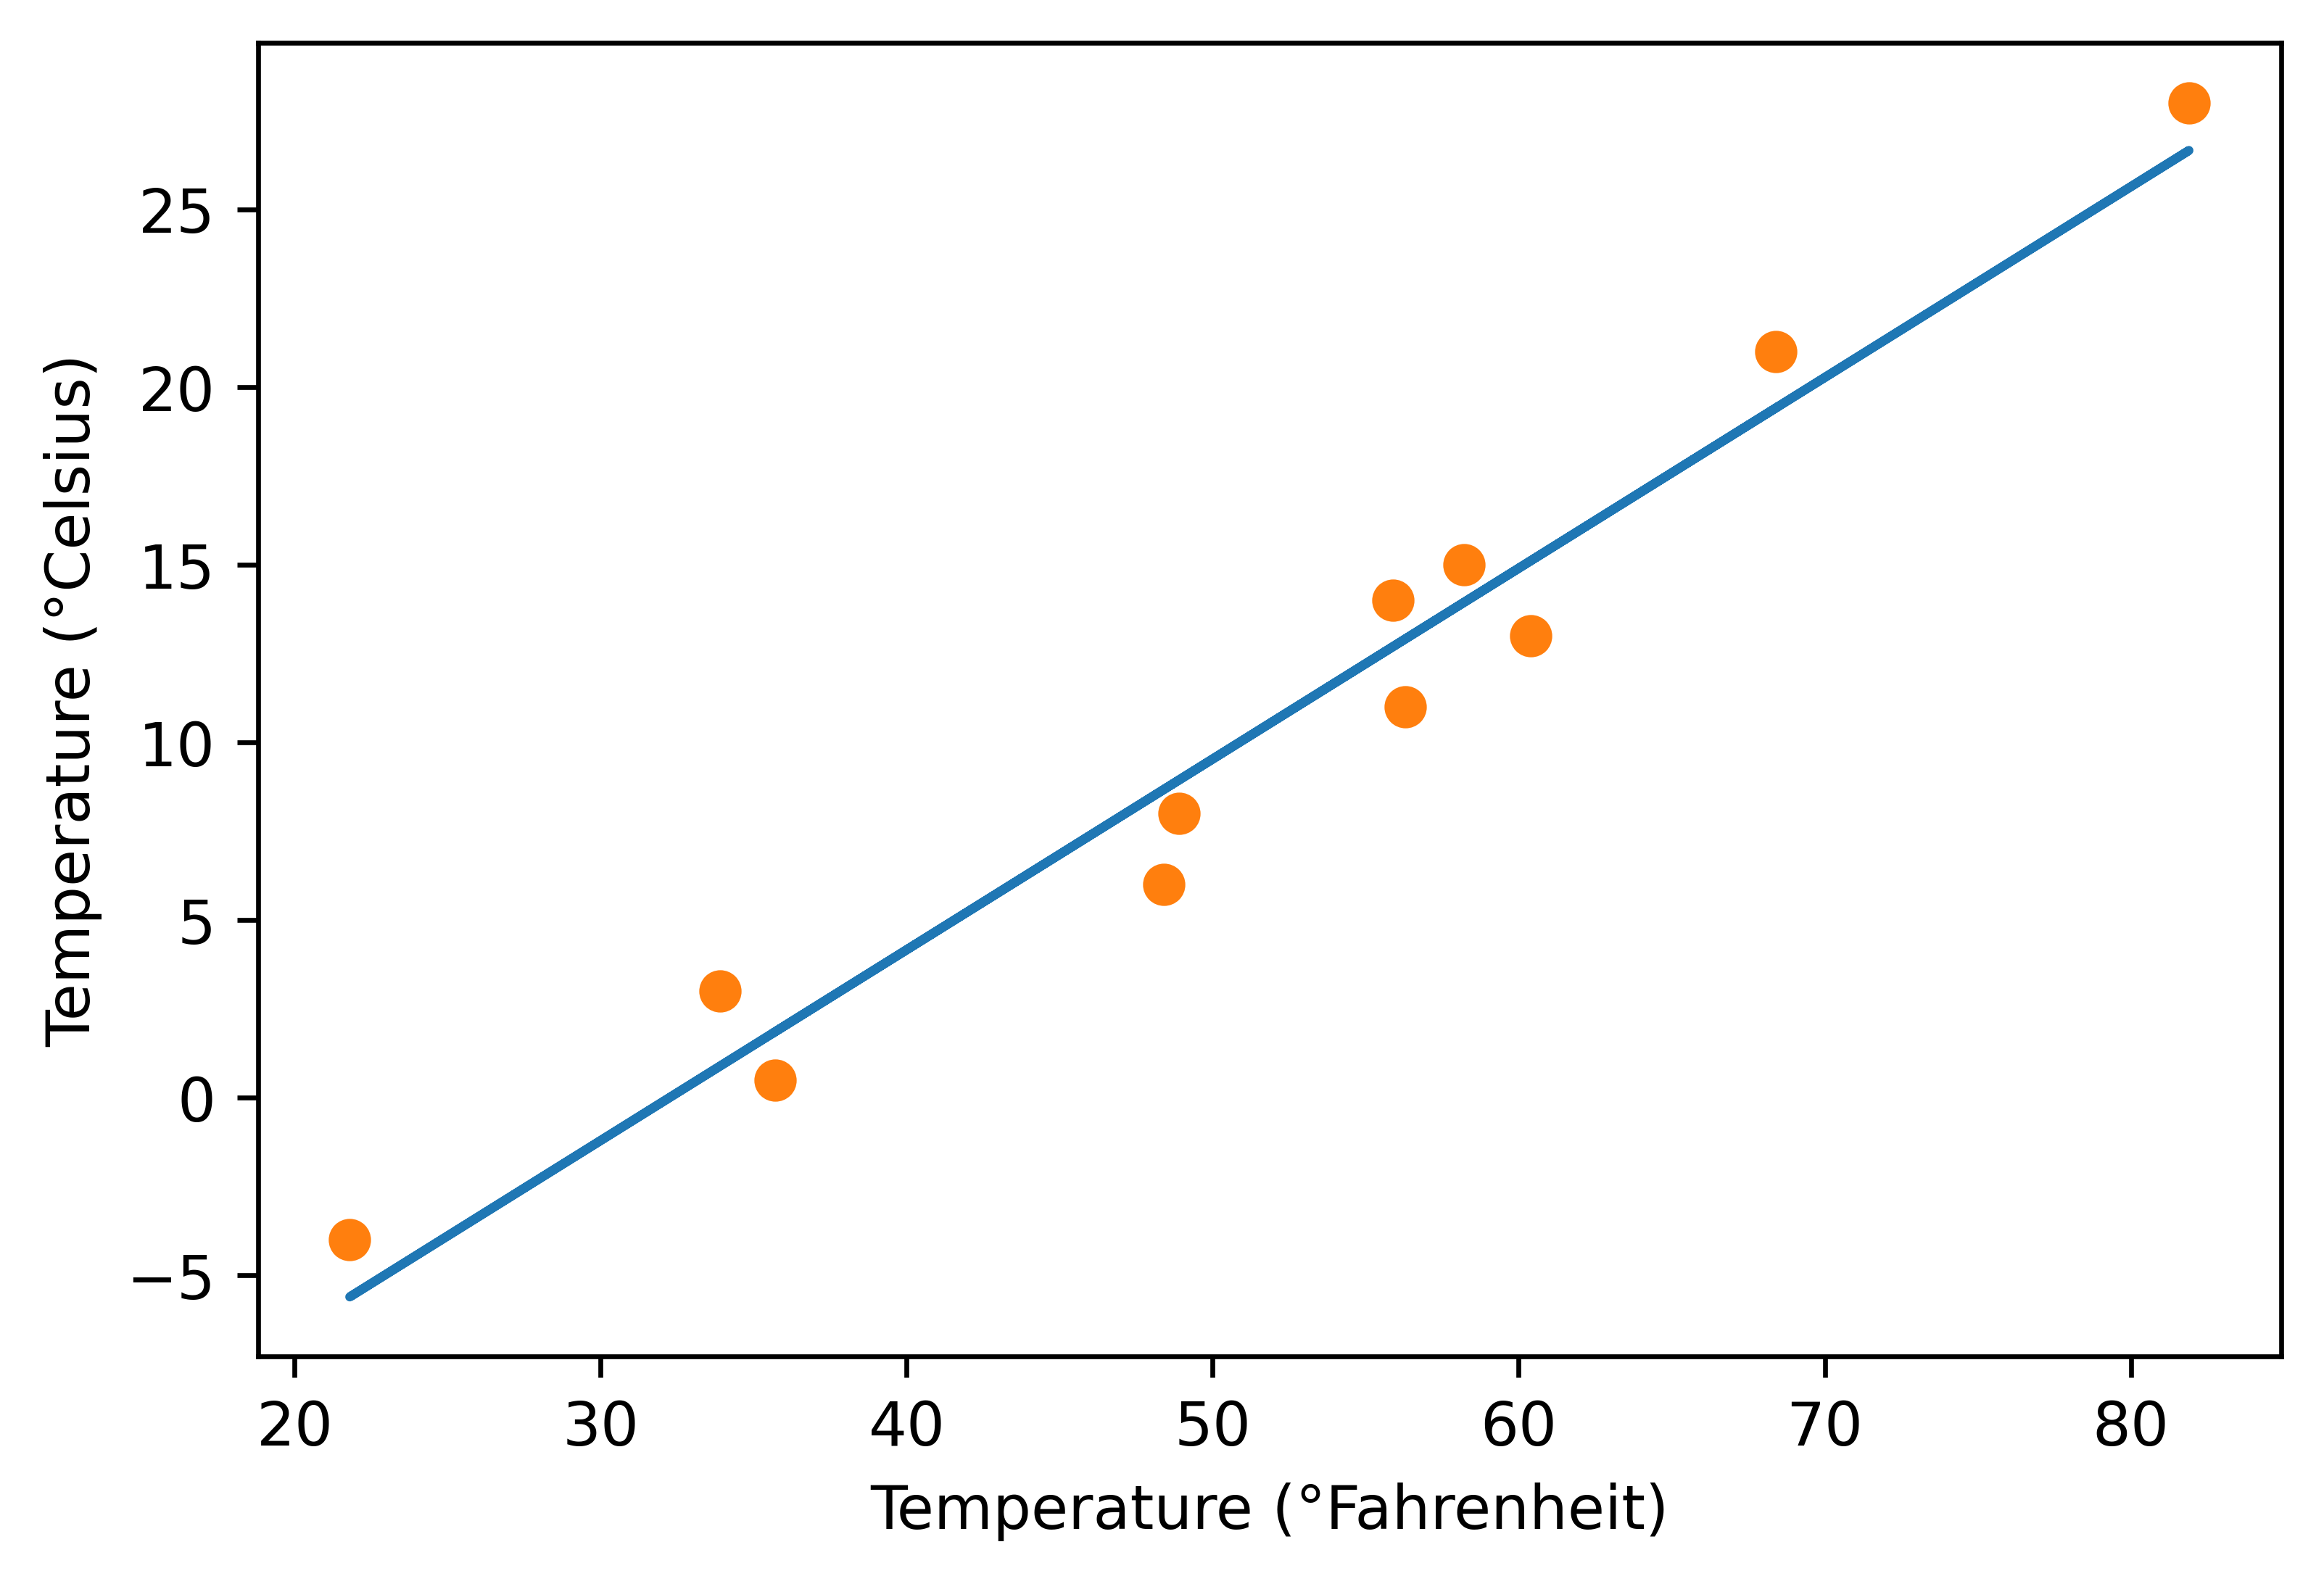

In [60]:
params=torch.tensor([  5.3676, -17.3042])
t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip